In [1]:
import os

# Set the environment variable
os.environ['DATA_DIRECTORY'] = '/Users/liamk/research-project-erc20-governance/data'

# Now you can access it
path = os.environ['DATA_DIRECTORY']
print(f"The data directory is set to: {path}")

The data directory is set to: /Users/liamk/research-project-erc20-governance/data


In [2]:
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()  

# Set the base data directory path from environment variable
data_directory = os.environ.get('DATA_DIRECTORY')

# Verify if the DATA_DIRECTORY environment variable is set
if not data_directory:
    raise EnvironmentError("DATA_DIRECTORY environment variable is not set.")

# Define file paths
snapshot_file_path = os.path.join(data_directory, 'snapshot_selection.csv')
token_file_path = os.path.join(data_directory, 'final_token_selection.csv')

# Check if the files exist
if not os.path.exists(snapshot_file_path):
    print(f"File does not exist: {snapshot_file_path}")
else:
    print(f"File exists: {snapshot_file_path}")

if not os.path.exists(token_file_path):
    print(f"File does not exist: {token_file_path}")
else:
    print(f"File exists: {token_file_path}")

# Read the snapshot selection CSV file
try:
    df_snapshots = pd.read_csv(snapshot_file_path)
    df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
    print("Snapshot selection file loaded successfully. Here are the first few rows:")
    print(df_snapshots.head())
except Exception as e:
    print(f"Error reading snapshot selection file: {e}")

# Read the final token selection CSV file
try:
    df_tokens = pd.read_csv(token_file_path)
    print("Final token selection file loaded successfully. Here are the first few rows:")
    print(df_tokens.head())
except Exception as e:
    print(f"Error reading final token selection file: {e}")

# Convert DataFrame to a dictionary where keys are addresses and values are symbols
try:
    address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
    print("Address to symbol dictionary created successfully.")
    print(list(address_to_symbol.items())[:5])  # Print the first 5 items
except Exception as e:
    print(f"Error creating address to symbol dictionary: {e}")

# Known burner addresses
known_burner_addresses = [
    '0x0000000000000000000000000000000000000000',
    '0x0000000000000000000000000000000000000001',
    '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003',
    '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005',
    '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007',
    '0x000000000000000000000000000000000000dead'
]

print("Known burner addresses list:")
print(known_burner_addresses)

File exists: /Users/liamk/research-project-erc20-governance/data/snapshot_selection.csv
File exists: /Users/liamk/research-project-erc20-governance/data/final_token_selection.csv
Snapshot selection file loaded successfully. Here are the first few rows:
   Nr.  Block Height       Date
0    1       7962629 2019-06-15
1    2       8155117 2019-07-15
2    3       8354625 2019-08-15
3    4       8553607 2019-09-15
4    5       8745378 2019-10-15
Final token selection file loaded successfully. Here are the first few rows:
      coingecko_id     name    VL    MC  \
0          uniswap  Uniswap  True  True   
1             aave     Aave  True  True   
2         lido-dao     Lido  True  True   
3            maker    Maker  True  True   
4  curve-dao-token    Curve  True  True   

                                      address symbol  
0  0x1f9840a85d5af5bf1d1762f925bdaddc4201f984    UNI  
1  0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9   AAVE  
2  0x5a98fcbea516cf06857215779fd812ca3bef1b32    LDO  

/Users/liamk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import sys

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.analysis.clique_analysis import * 
from src.visualisations.wallet_network_projections_visualisations import * 

In [4]:
import networkx as nx
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory directly to the local folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Print the loaded graphs for verification
print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365
Loaded 18 graphs.
Snapshot: 11659570, Number of nodes: 118, Number of edges: 883
Snapshot: 11861210, Number of nodes: 114, Number of edges: 817
Snapshot: 12043054, Number of nodes: 116, Number of edges: 864
Snapshot: 12244515, Number of nodes: 114, Number of edges: 831
Snapshot: 12438842, Number of nodes: 119, Number of edges: 852
Snapshot: 12638919, Number of nodes: 130, Number of edges: 890
Snapshot: 12831436, Number of nodes: 155, Number of edges: 1128
Snapshot: 13029639, Number of nodes: 167, Number of edges: 1148
Snapshot: 13230157, Number of nodes: 172, Number of edges: 1189
Snapshot: 13422506, Number of nodes: 179, Number of edges: 1294
Snapshot: 13620205, Number of nodes: 181, Number of edges: 1341
Snapshot: 13809597, Number of nodes: 174, Number of edges: 1245
Snapshot

# Aligning the token labeling


In [22]:
import os
import networkx as nx
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load a specific snapshot for comparison
snapshot = '11659570'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Get nodes from both graphs
normal_nodes = set(normal_graph.nodes())
enriched_nodes = set(enriched_graph.nodes())

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# Output some examples of unmatched nodes if any
if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

Total nodes in normal graph: 118
Total nodes in enriched graph: 118
Matched nodes: 118
Unmatched nodes: 0


In [23]:
import os
import networkx as nx
import pandas as pd
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load token information
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Load a specific snapshot for comparison
snapshot = '11659570'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Extract token addresses from the enriched graph and map to token names
for node in normal_graph.nodes():
    if 'token_address' in enriched_graph.nodes[node]:
        token_address = enriched_graph.nodes[node]['token_address'].lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name
    else:
        normal_graph.nodes[node]['token_name'] = 'Unknown Token'

# Verify the token names in the normal graph
token_names = nx.get_node_attributes(normal_graph, 'token_name')
print("Token names associated with nodes:")
for node, token_name in token_names.items():
    print(f"Node: {node}, Token: {token_name}")

# Optionally, save the graph with token names for further analysis
output_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')
nx.write_graphml(normal_graph, output_graph_file)

Token names associated with nodes:
Node: 0x338286c0bc081891a4bda39c7667ae150bf5d206, Token: Sushi
Node: 0xe94b5eec1fa96ceecbd33ef5baa8d00e4493f4f3, Token: Sushi
Node: 0x3e40d73eb977dc6a537af587d48316fee66e9c8c, Token: Lido
Node: 0x447f95026107aaed7472a0470931e689f51e0e42, Token: Lido
Node: 0xe93381fb4c4f14bda253907b18fad305d799241a, Token: Curve
Node: 0x26732399f47e00739d2b4b0451acc3f93f7e3a14, Token: Maker
Node: 0xea3178d4925d1ceb4abab947d4cde2314a7b4a50, Token: Maker
Node: 0x090d4613473dee047c3f2706764f49e0821d256e, Token: Uniswap
Node: 0xaede09a1b7ab8c4dd18e98bc6bafcae1e184b700, Token: Uniswap
Node: 0xc2edad668740f1aa35e4d8f227fb8e17dca888cd, Token: Sushi
Node: 0x9f41cecc435101045ea9f41d4ee8c5353f77e5d5, Token: Uniswap
Node: 0x0a3f6849f78076aefadf113f5bed87720274ddc0, Token: Maker
Node: 0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10, Token: Maker
Node: 0x34112c83e77a3234f2ce320b05f758f9b17f93c8, Token: Compound
Node: 0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7, Token: Compound
Node: 0x2f

In [25]:
import os
import networkx as nx
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load a specific snapshot for comparison
snapshot = '14210564'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Normalize node identifiers (addresses) to lowercase
normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# If unmatched, output some examples
if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

# Let's try matching nodes and retrieving token information
token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph.nodes():
        # Debugging: Print the node and its attributes in the enriched graph
        print(f"Matched Node: {normalized_node}, Attributes: {enriched_graph.nodes[normalized_node]}")
        
        token_info[node] = enriched_graph.nodes[normalized_node].get('token_name', 'Unknown Token')
    else:
        print(f"Node {normalized_node} not found in enriched graph.")
        token_info[node] = 'Unknown Token'

# Print a sample of the results
print("\nSample of matched nodes and their tokens:")
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Total nodes in normal graph: 179
Total nodes in enriched graph: 179
Matched nodes: 179
Unmatched nodes: 0
Matched Node: 0x000be27f560fef0253cac4da8411611184356549, Attributes: {'token_address': '0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2'}
Matched Node: 0x0a3f6849f78076aefadf113f5bed87720274ddc0, Attributes: {'token_address': '0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2'}
Matched Node: 0x69076e44a9c70a67d5b79d95795aba299083c275, Attributes: {'token_address': '0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2'}
Matched Node: 0x07f7fe30eaeac132fa0f4223e84568e422da91cf, Attributes: {'token_address': '0x6f40d4a6237c257fff2db00fa0510deeecd303eb'}
Matched Node: 0xc1cd3d0913f4633b43fcddbcd7342bc9b71c676f, Attributes: {'token_address': '0x6f40d4a6237c257fff2db00fa0510deeecd303eb'}
Matched Node: 0x08a90fe0741b7def03fb290cc7b273f1855767d8, Attributes: {'token_address': '0x92d6c1e31e14520e676a687f0a93788b716beff5'}
Matched Node: 0xd7ec2398980102d2e1994263777333491536ccee, Attributes: {'token_address': '0

In [26]:
import os
import networkx as nx
from os.path import join
import pandas as pd

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load the token mapping for reference
df_tokens = pd.read_csv(token_info_path)
df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
token_map = df_tokens.set_index('address')['name'].to_dict()

# Load a specific snapshot for comparison
snapshot = '14210564'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Normalize node identifiers (addresses) to lowercase
normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# Let's try matching nodes and retrieving token information with debugging
token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph.nodes():
        token_address = enriched_graph.nodes[normalized_node].get('token_address', '').lower()
        
        # Debugging: Check if the token address exists in token_map
        if token_address in token_map:
            token_info[node] = token_map[token_address]
        else:
            print(f"Token address not found in token_map: {token_address}")
            token_info[node] = 'Unknown Token'
    else:
        print(f"Node {normalized_node} not found in enriched graph.")
        token_info[node] = 'Unknown Token'

# Print a sample of the results
print("\nSample of matched nodes and their tokens:")
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Total nodes in normal graph: 179
Total nodes in enriched graph: 179
Matched nodes: 179
Unmatched nodes: 0

Sample of matched nodes and their tokens:
Node: 0x000be27f560fef0253cac4da8411611184356549, Token: Maker
Node: 0x0a3f6849f78076aefadf113f5bed87720274ddc0, Token: Maker
Node: 0x69076e44a9c70a67d5b79d95795aba299083c275, Token: Maker
Node: 0x07f7fe30eaeac132fa0f4223e84568e422da91cf, Token: Instadapp
Node: 0xc1cd3d0913f4633b43fcddbcd7342bc9b71c676f, Token: Instadapp
Node: 0x08a90fe0741b7def03fb290cc7b273f1855767d8, Token: Dydx
Node: 0xd7ec2398980102d2e1994263777333491536ccee, Token: Dydx
Node: 0x0ac6ff4dbde9ceedc6d4c08b14ced9ff19a013ab, Token: 1Inch
Node: 0x4942b20750163675ddf004476ffe46626652dfd0, Token: 1Inch
Node: 0x090d4613473dee047c3f2706764f49e0821d256e, Token: Uniswap


In [27]:
import os
import networkx as nx
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load a specific snapshot for comparison
snapshot = '13230157'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Normalize node identifiers (addresses) to lowercase
normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# If unmatched, output some examples
if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

# Match nodes and retrieve token information
token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph:
        token_info[node] = enriched_graph.nodes[normalized_node].get('token_name', 'Unknown Token')
    else:
        token_info[node] = 'Unknown Token'

# Print a sample of the results
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Total nodes in normal graph: 172
Total nodes in enriched graph: 172
Matched nodes: 172
Unmatched nodes: 0
Node: 0x000be27f560fef0253cac4da8411611184356549, Token: Maker
Node: 0xc713e5e149d5d0715dcd1c156a020976e7e56b88, Token: Maker
Node: 0x0a3f6849f78076aefadf113f5bed87720274ddc0, Token: Maker
Node: 0xf37216a8ac034d08b4663108d7532dfcb44583ed, Token: Maker
Node: 0x088ee5007c98a9677165d78dd2109ae4a3d04d0c, Token: Yearn Finance
Node: 0xe14d13d8b3b85af791b2aadd661cdbd5e6097db1, Token: Yearn Finance
Node: 0x02c2e03c5f241794909d953f5b8fa630856f172c, Token: Bitdao
Node: 0xf405127e31e96216f6214983546e7a2de2b9881b, Token: Bitdao
Node: 0x07f7fe30eaeac132fa0f4223e84568e422da91cf, Token: Instadapp
Node: 0x6300080a77ffff563b542978555d121ded05b896, Token: Instadapp


In [30]:
# Find nodes with 'Unknown Token'
unknown_tokens = {node: token for node, token in token_info.items() if token == 'Unknown Token'}

# Print the number of nodes with 'Unknown Token'
print(f"Number of nodes with 'Unknown Token': {len(unknown_tokens)}")

# If there are any, print a sample of them
if unknown_tokens:
    print("Sample of nodes with 'Unknown Token':")
    for node, token in list(unknown_tokens.items())[:10]:
        print(f"Node: {node}, Token: {token}")


Number of nodes with 'Unknown Token': 0


In [31]:
import os
import networkx as nx
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load a specific snapshot for comparison
snapshot = '14589816'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Normalize node identifiers (addresses) to lowercase
normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

# Print out some node attributes in the enriched graph
print("Sample node attributes from the enriched graph:")
for node in list(enriched_graph.nodes())[:10]:  # Print attributes for the first 10 nodes
    print(f"Node: {node}, Attributes: {enriched_graph.nodes[node]}")

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# If unmatched, output some examples
if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

# Match nodes and retrieve token information
token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph.nodes():
        token_info[node] = enriched_graph.nodes[normalized_node].get('token_name', 'Unknown Token')
    else:
        token_info[node] = 'Unknown Token'

# Print a sample of the results
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Sample node attributes from the enriched graph:
Node: 0x69076e44a9c70a67d5b79d95795aba299083c275, Attributes: {'token_name': 'Maker'}
Node: 0xca8d6f69d8f32516a109df68b623452cc9f5e64d, Attributes: {'token_name': 'Maker'}
Node: 0x4048c47b546b68ad226ea20b5f0acac49b086a21, Attributes: {'token_name': 'Aave'}
Node: 0xc697051d1c6296c24ae3bcef39aca743861d9a81, Attributes: {'token_name': 'Aave'}
Node: 0xc713e5e149d5d0715dcd1c156a020976e7e56b88, Attributes: {'token_name': 'Maker'}
Node: 0x9849c2c1b73b41aee843a002c332a2d16aaab611, Attributes: {'token_name': 'Lido'}
Node: 0xa2dfc431297aee387c05beef507e5335e684fbcd, Attributes: {'token_name': 'Lido'}
Node: 0xb1dc62ec38e6e3857a887210c38418e4a17da5b2, Attributes: {'token_name': 'Instadapp'}
Node: 0xe48cd70f7072fd0c21a3b2c323efabe7ed223e02, Attributes: {'token_name': 'Instadapp'}
Node: 0x11577a8a5baf1e25b9a2d89f39670f447d75c3cd, Attributes: {'token_name': 'Maker'}
Total nodes in normal graph: 190
Total nodes in enriched graph: 190
Matched nodes: 190
U

In [32]:
import os
import networkx as nx
import pandas as pd
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load the token information CSV
df_tokens = pd.read_csv(token_info_path)
token_map = df_tokens.set_index('address')['name'].to_dict()

# Load snapshots
snapshots = sorted([f.split('_')[-1].replace('.graphml', '') for f in os.listdir(normal_graph_path) if f.endswith('.graphml')])

# Process each snapshot
for snapshot in snapshots:
    print(f"\nProcessing snapshot {snapshot}...")

    normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
    enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

    # Load graphs
    normal_graph = nx.read_graphml(normal_graph_file)
    enriched_graph = nx.read_graphml(enriched_graph_file)

    # Compare nodes
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())
    unmatched_nodes = set(normal_graph.nodes()) - set(enriched_graph.nodes())

    known_tokens_count = 0
    unknown_tokens_count = 0

    print(f"Total nodes in normal graph: {len(normal_graph.nodes())}")
    print(f"Total nodes in enriched graph: {len(enriched_graph.nodes())}")
    print(f"Matched nodes: {len(matched_nodes)}")
    print(f"Unmatched nodes: {len(unmatched_nodes)}")

    # Check token names for matched nodes
    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')

        if token_name == 'Unknown Token':
            unknown_tokens_count += 1
        else:
            known_tokens_count += 1

        # Print out a few examples
        if known_tokens_count + unknown_tokens_count <= 10:  # Limit output for readability
            print(f"Node: {node}, Token Address: {token_address}, Token Name: {token_name}")

    print(f"Known tokens in snapshot {snapshot}: {known_tokens_count}")
    print(f"Unknown tokens in snapshot {snapshot}: {unknown_tokens_count}")


Processing snapshot 11659570...
Total nodes in normal graph: 118
Total nodes in enriched graph: 118
Matched nodes: 118
Unmatched nodes: 0
Node: 0xd2d43555134dc575bf7279f4ba18809645db0f1d, Token Address: 0xd533a949740bb3306d119cc777fa900ba034cd52, Token Name: Curve
Node: 0x662d905a1795ffdf8cfab0abe670dbff3a9fd247, Token Address: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984, Token Name: Uniswap
Node: 0x25f2226b597e8f9514b3f68f00f494cf4f286491, Token Address: 0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9, Token Name: Aave
Node: 0x81fb0aa0ceeeba4ccafd0e67861de0b3174b0f5b, Token Address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2, Token Name: Maker
Node: 0xc2adda861f89bbb333c90c492cb837741916a225, Token Address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2, Token Name: Maker
Node: 0x9dde0b1d39d0d2c6589cde1bfed3542d2a3c5b11, Token Address: 0xba100000625a3754423978a60c9317c58a424e3d, Token Name: Balancer
Node: 0x675938d86a6a4651b6dbba7529117fb0b557ccf2, Token Address: 0x0bc529c00c6401aef6d220be8c6e

Total nodes in normal graph: 155
Total nodes in enriched graph: 156
Matched nodes: 155
Unmatched nodes: 0
Node: 0xd2d43555134dc575bf7279f4ba18809645db0f1d, Token Address: 0xd533a949740bb3306d119cc777fa900ba034cd52, Token Name: Curve
Node: 0x2f5e5a67d55fd117b83049d05a48f6f678432100, Token Address: 0x6f40d4a6237c257fff2db00fa0510deeecd303eb, Token Name: Instadapp
Node: 0x5f246d7d19aa612d6718d27c1da1ee66859586b0, Token Address: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984, Token Name: Uniswap
Node: 0x25f2226b597e8f9514b3f68f00f494cf4f286491, Token Address: 0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9, Token Name: Aave
Node: 0x81fb0aa0ceeeba4ccafd0e67861de0b3174b0f5b, Token Address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2, Token Name: Maker
Node: 0xe98984ad858075813ada4261af47e68a64e28fcc, Token Address: 0x4e3fbd56cd56c3e72c1403e103b45db9da5b9d2b, Token Name: Convex
Node: 0xf81ccdc1ee8de3fbfa48a0714fc773022e4c14d7, Token Address: 0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9, Token Name: Aave


In [33]:
import os
import pandas as pd
import networkx as nx
from os.path import join

# Paths
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load the token information CSV
df_tokens = pd.read_csv(token_info_path)
token_map = df_tokens.set_index('address')['name'].to_dict()

# Function to check token mapping
def check_token_mapping():
    all_token_addresses = set()
    unmatched_token_addresses = set()

    # Process each enriched graph file
    for filename in os.listdir(enriched_graph_path):
        if filename.endswith('.graphml'):
            graph_file = join(enriched_graph_path, filename)
            graph = nx.read_graphml(graph_file)
            
            # Collect all token addresses used in the graph
            for node in graph.nodes():
                token_address = graph.nodes[node].get('token_address', None)
                if token_address:
                    all_token_addresses.add(token_address)
                    # Check if token address is in the token map
                    if token_address not in token_map:
                        unmatched_token_addresses.add(token_address)
    
    # Report findings
    print(f"Total unique token addresses in enriched graphs: {len(all_token_addresses)}")
    print(f"Total unmatched token addresses: {len(unmatched_token_addresses)}")
    
    if unmatched_token_addresses:
        print("\nUnmatched token addresses:")
        for address in unmatched_token_addresses:
            print(address)
    else:
        print("All token addresses are matched correctly.")

# Run the token mapping check
check_token_mapping()



Total unique token addresses in enriched graphs: 15
Total unmatched token addresses: 0
All token addresses are matched correctly.


In [34]:
import os
import networkx as nx
import pandas as pd
from os.path import join

# Paths
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'  # Path to the uploaded CSV

# Load the token mapping
df_tokens = pd.read_csv(token_info_path)
df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
token_map = df_tokens.set_index('address')['name'].to_dict()

# Function to check for unmatched token addresses
def check_unmatched_token_addresses(enriched_graph_path, token_map):
    unmatched_addresses = set()
    
    # Iterate over all enriched graph files in the directory
    for filename in sorted(os.listdir(enriched_graph_path)):
        if filename.endswith('.graphml'):
            graph_path = join(enriched_graph_path, filename)
            G = nx.read_graphml(graph_path)

            # Extract token addresses from the enriched graph
            for node, data in G.nodes(data=True):
                token_address = data.get('token_address', '').lower()
                
                # Check if the token address is in the token map
                if token_address and token_address not in token_map:
                    unmatched_addresses.add(token_address)

    return unmatched_addresses

# Run the check
unmatched_addresses = check_unmatched_token_addresses(enriched_graph_path, token_map)

# Output the results
if unmatched_addresses:
    print(f"Unmatched token addresses found: {len(unmatched_addresses)}")
    print("Examples of unmatched token addresses:", list(unmatched_addresses)[:10])
else:
    print("All token addresses are matched successfully.")


All token addresses are matched successfully.


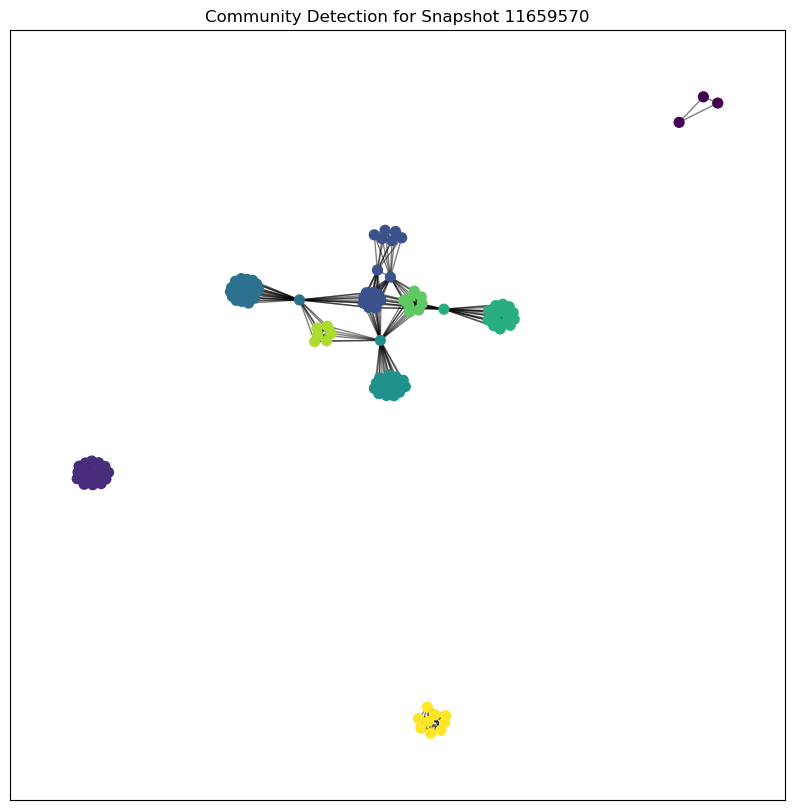

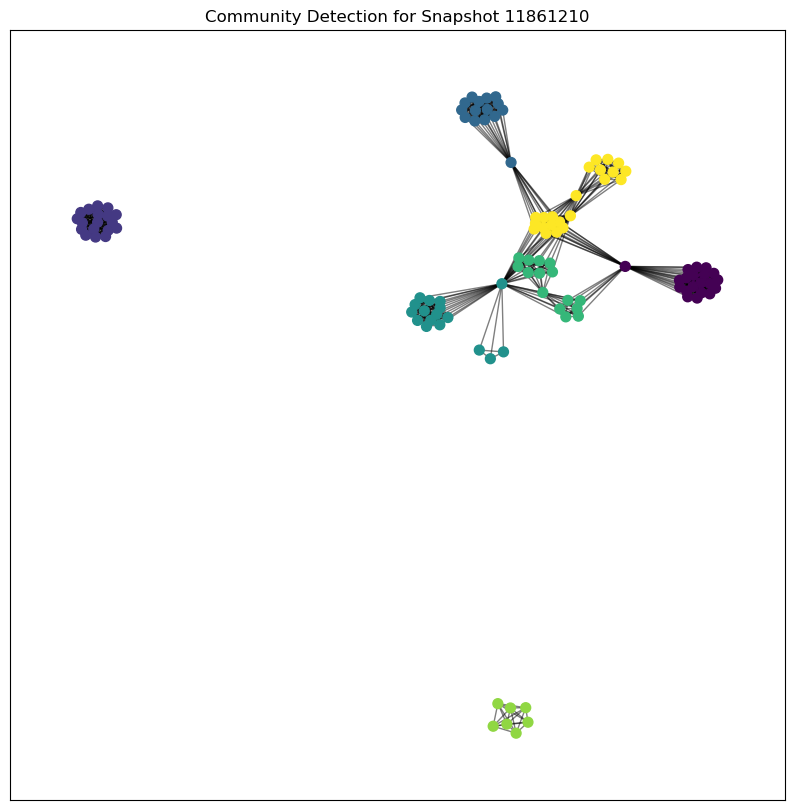

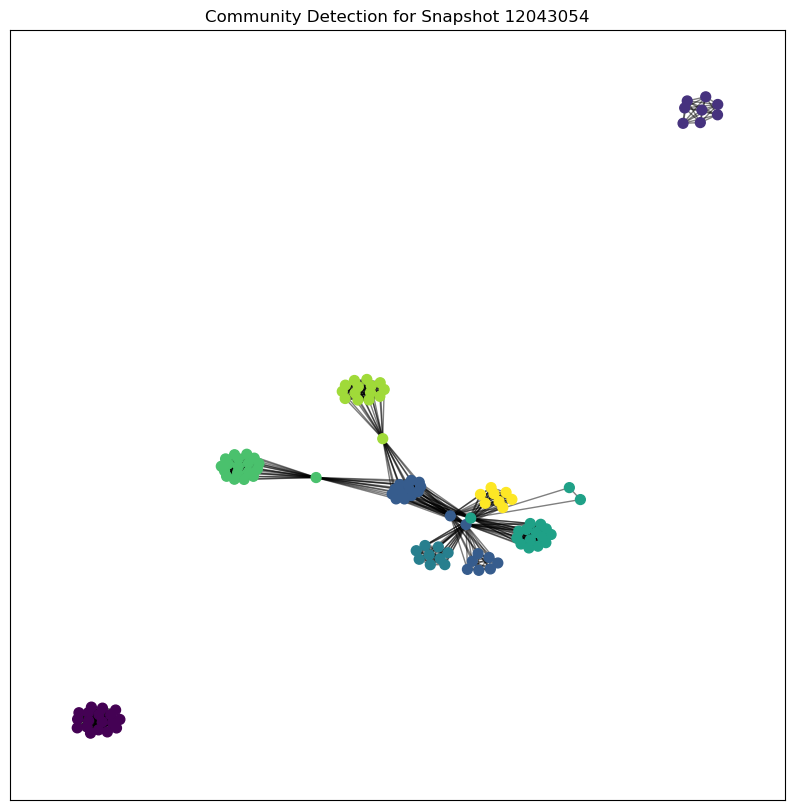

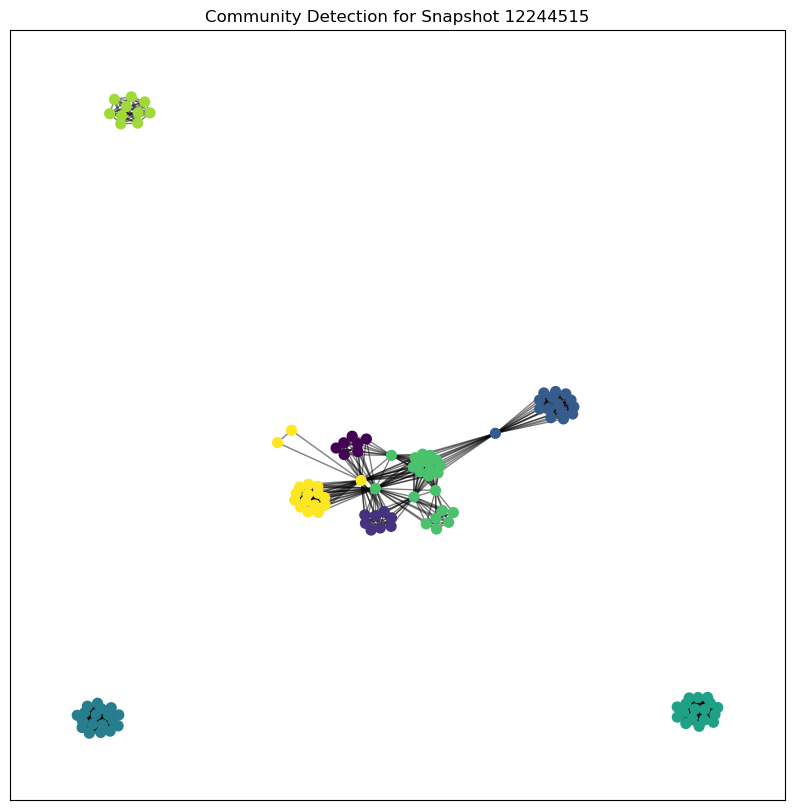

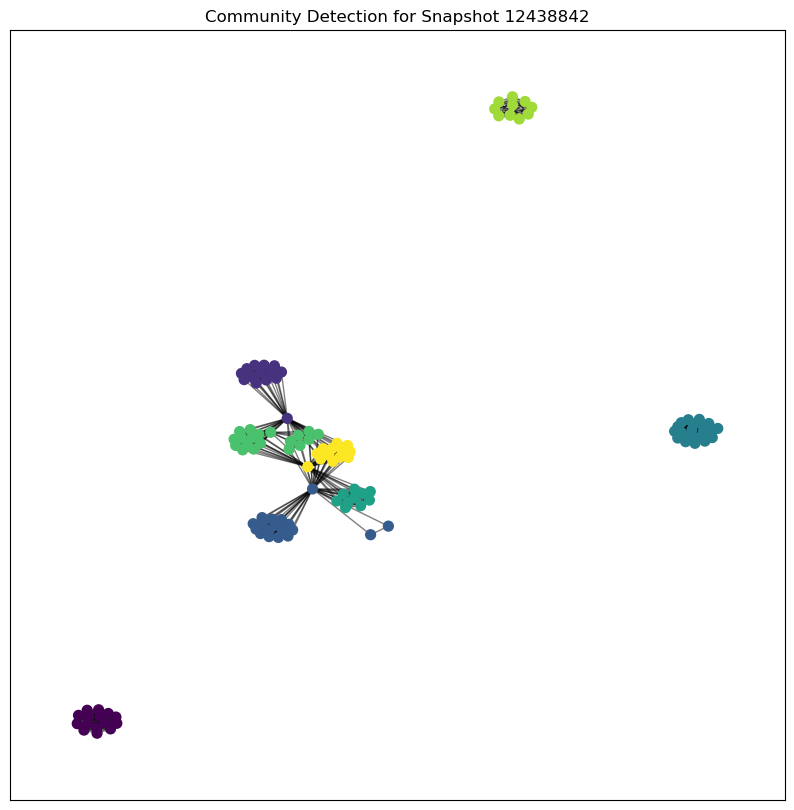

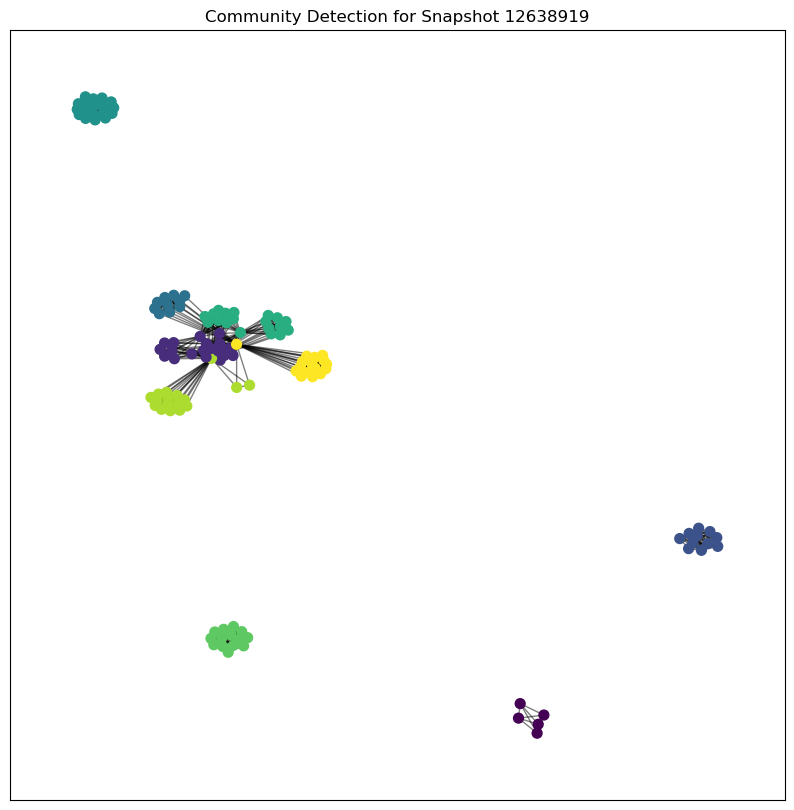

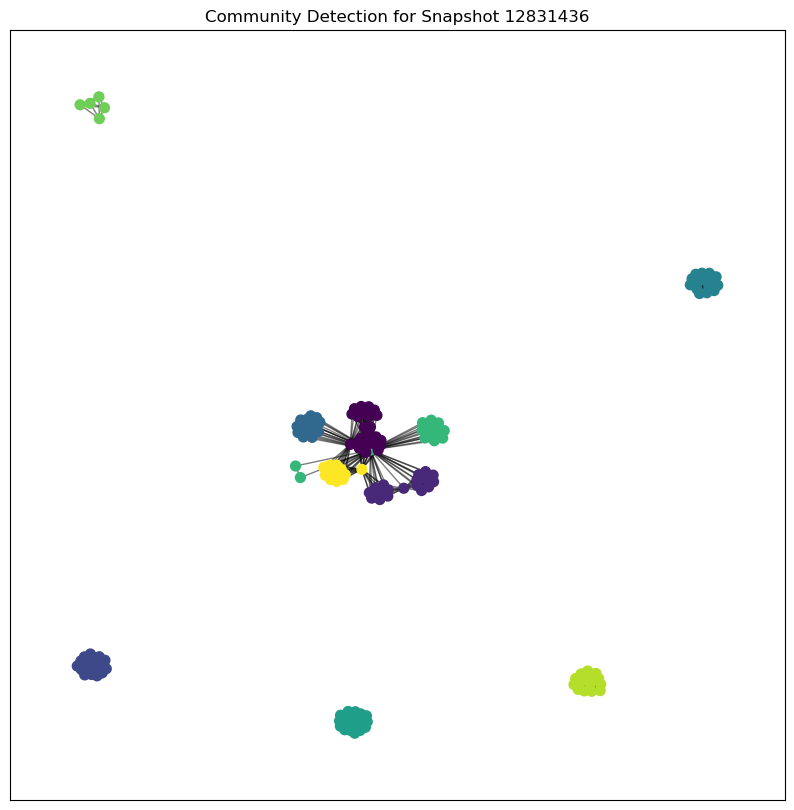

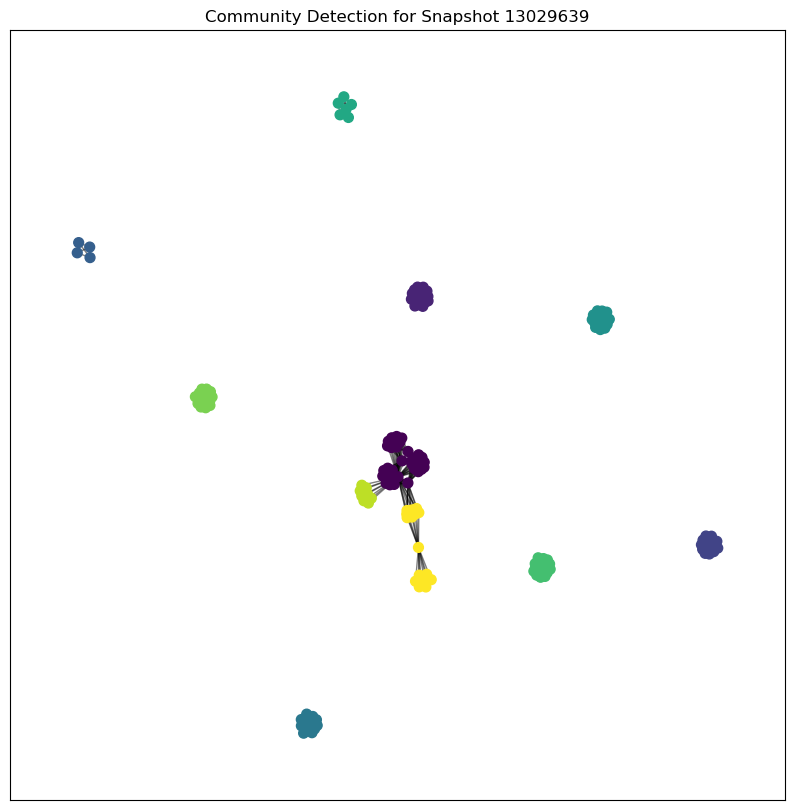

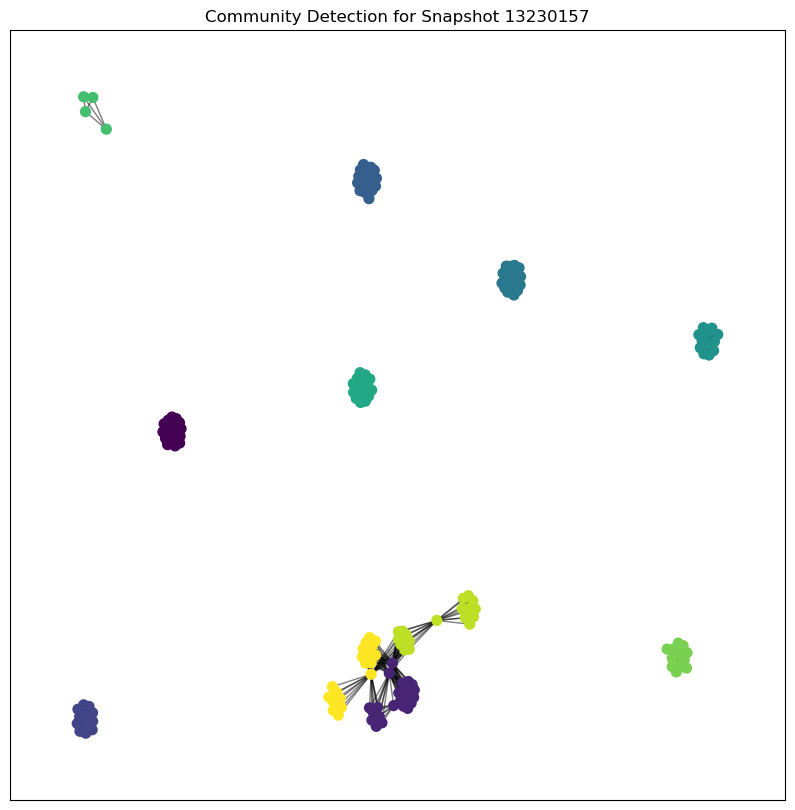

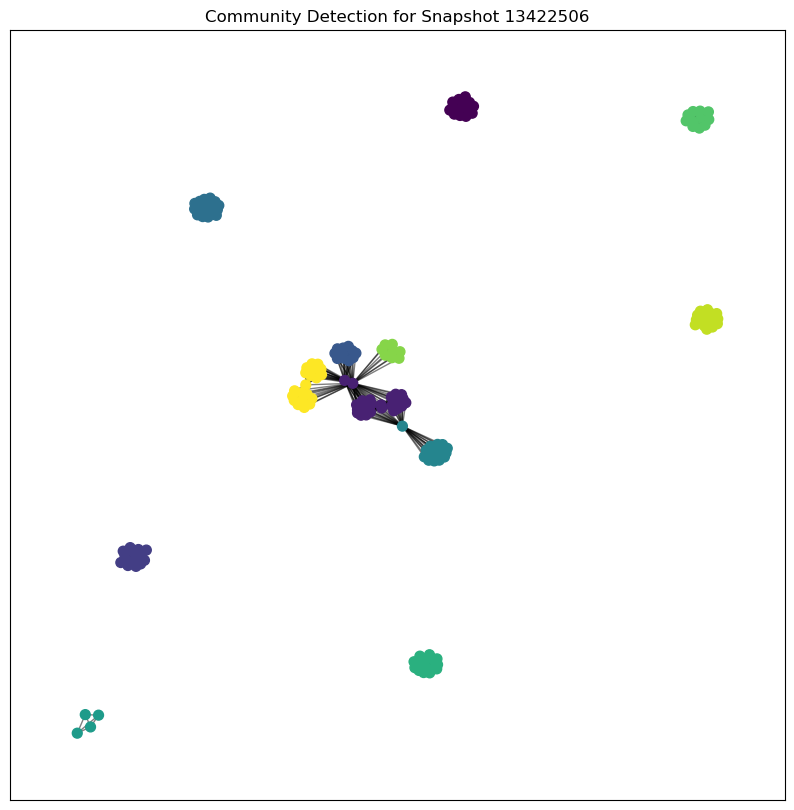

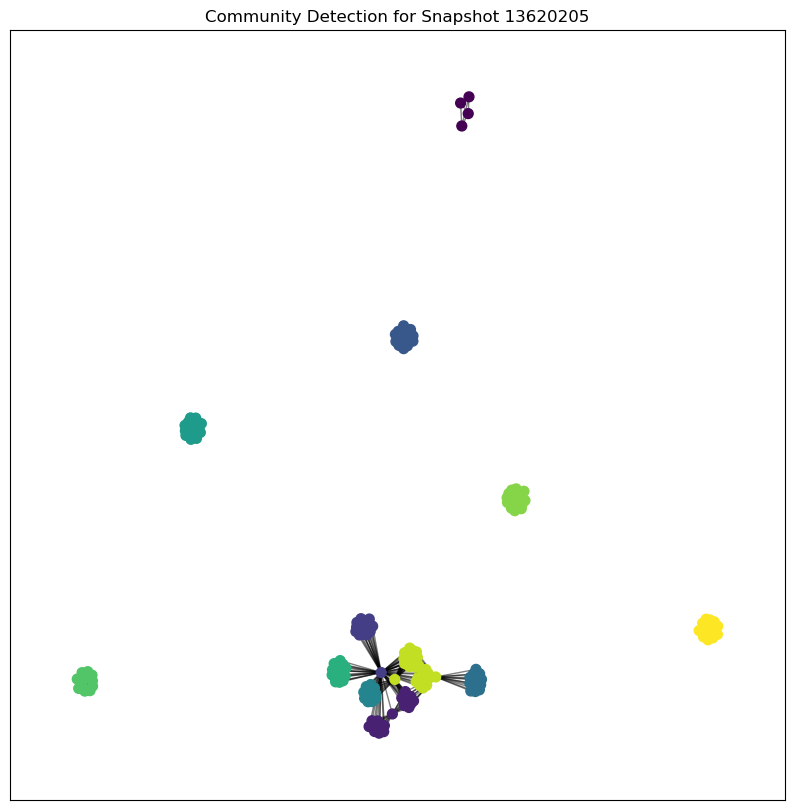

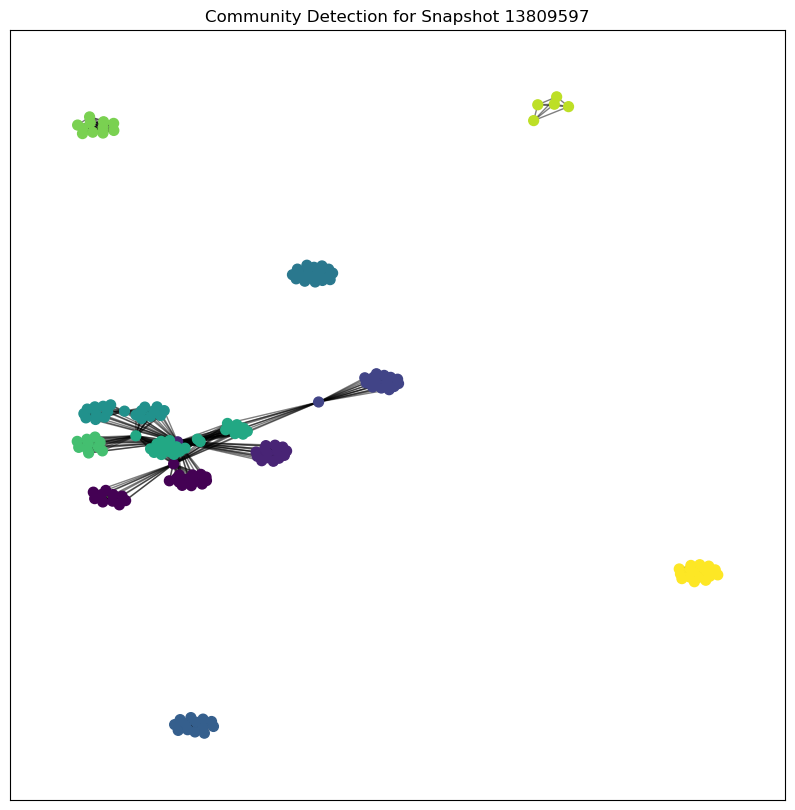

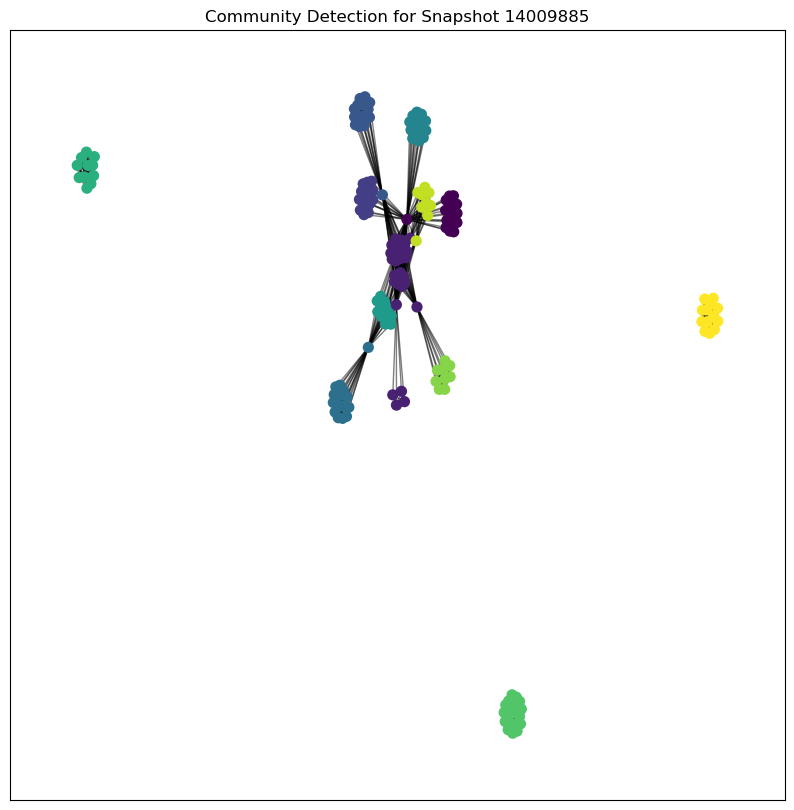

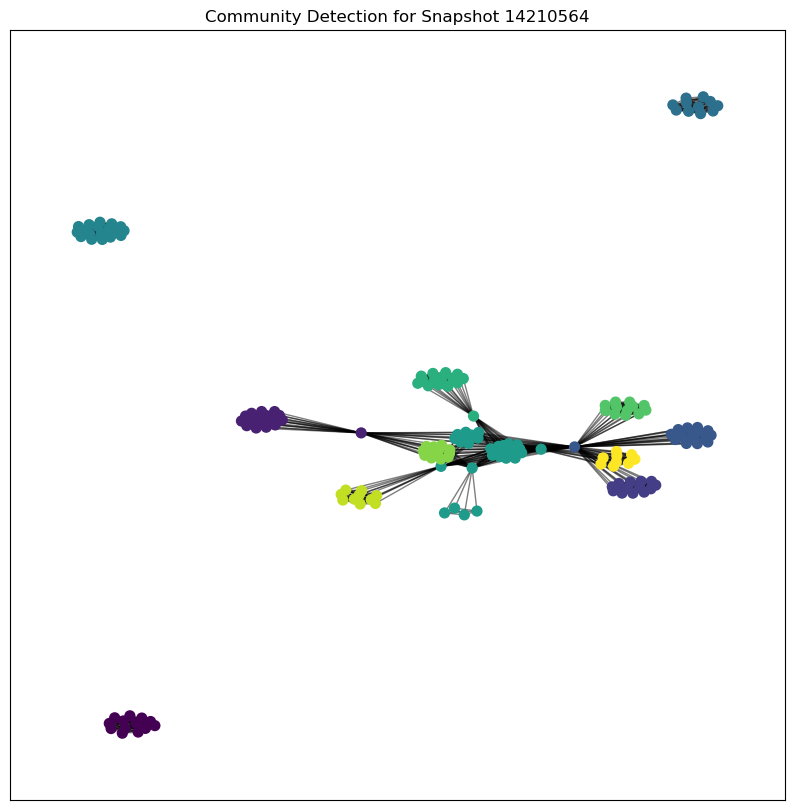

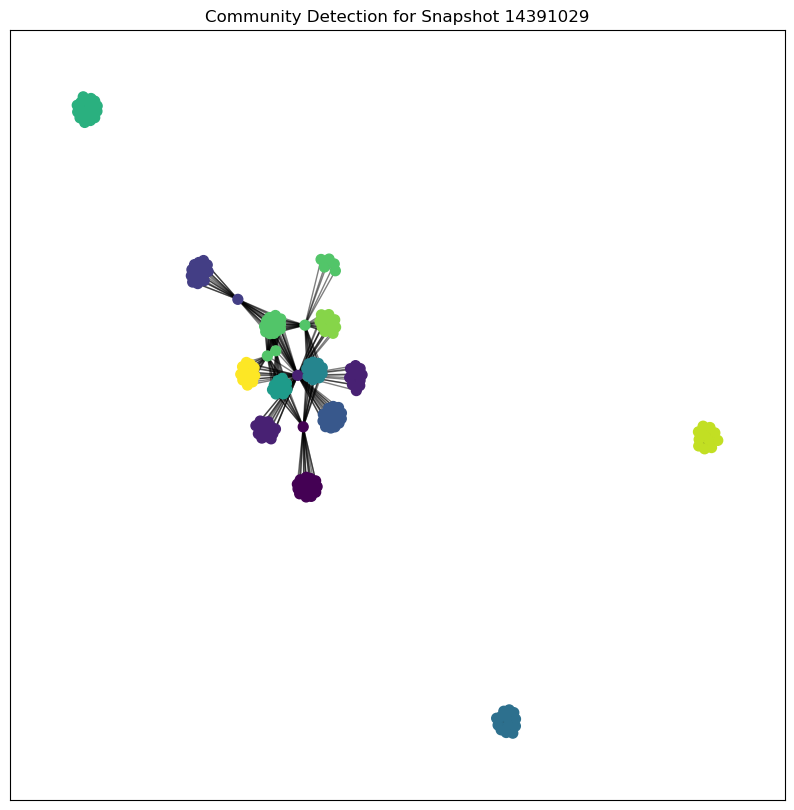

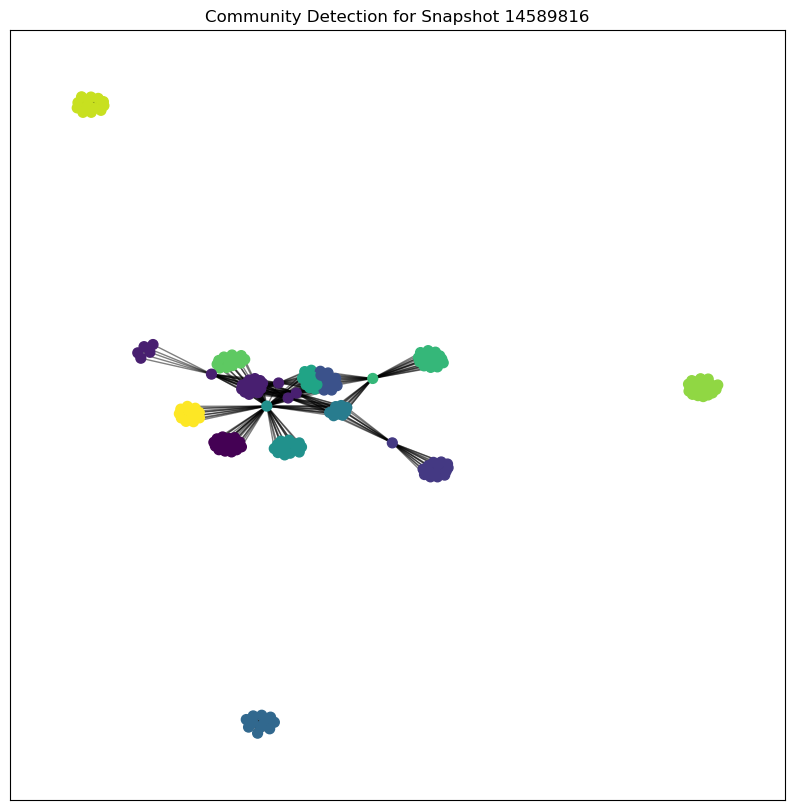

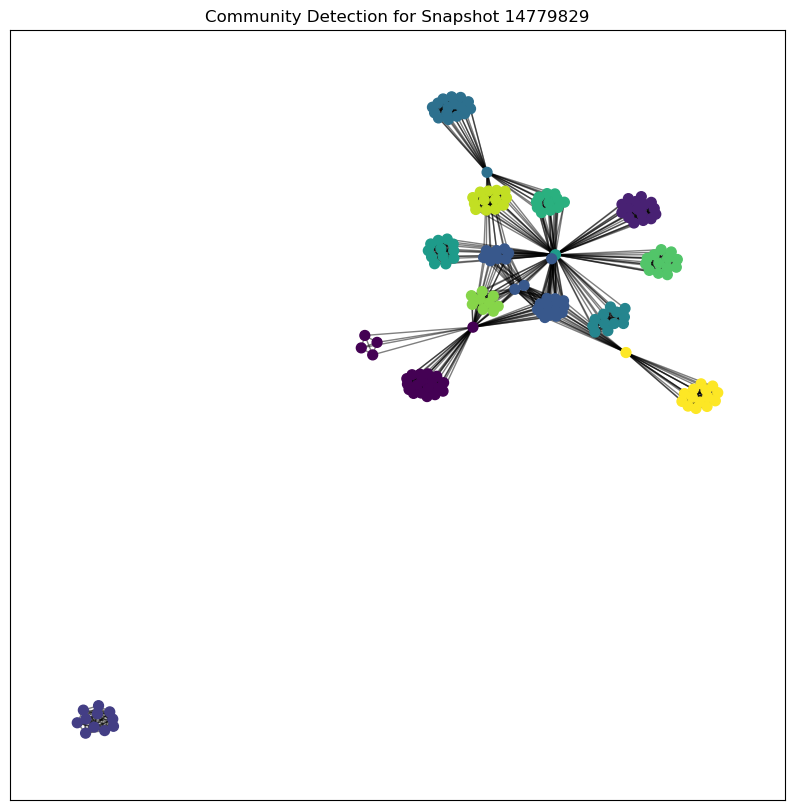

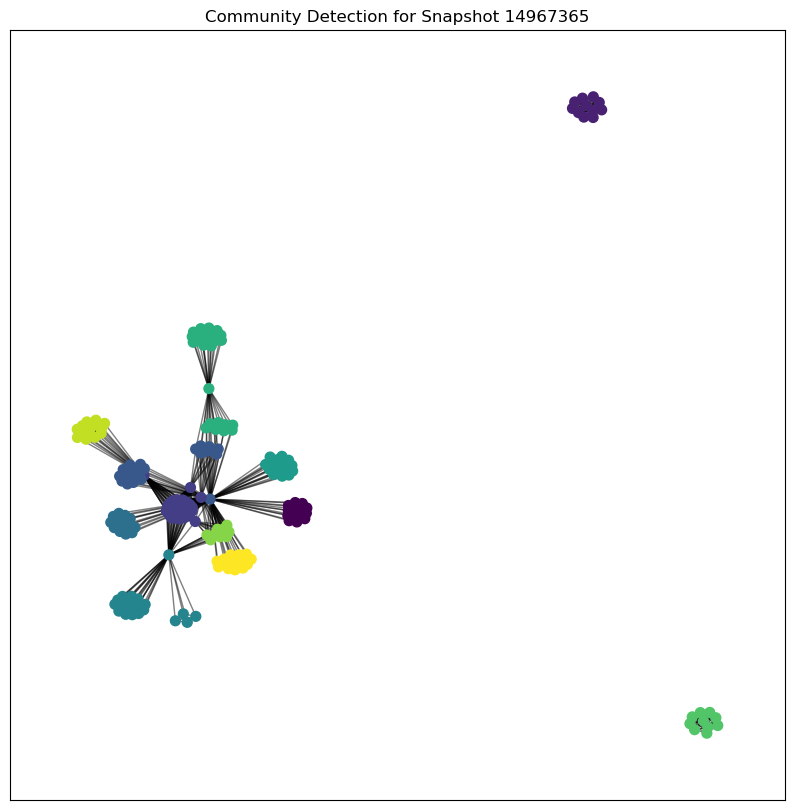

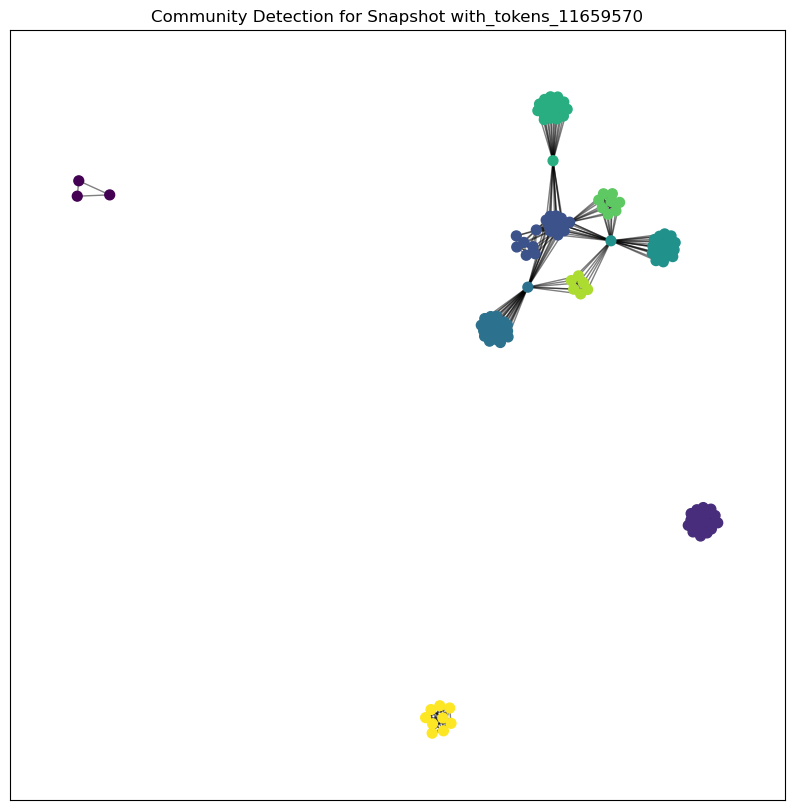

In [35]:
import os
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from os.path import join

# Step 1: Load the Graph Data
def load_graphs(graph_directory):
    graphs = {}
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            graphs[snapshot_time] = G
    return graphs

# Step 2: Apply Louvain Method for Community Detection
def detect_communities(graphs):
    communities = {}
    for snapshot_time, G in graphs.items():
        partition = community_louvain.best_partition(G)
        communities[snapshot_time] = partition
        # Set the community as an attribute for each node
        nx.set_node_attributes(G, partition, 'community')
    return communities

# Step 3: Visualize the Communities
def visualize_communities(graphs, communities):
    for snapshot_time, G in graphs.items():
        partition = communities[snapshot_time]
        pos = nx.spring_layout(G)
        plt.figure(figsize=(10, 10))
        cmap = plt.get_cmap('viridis')
        nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=list(partition.values()))
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        plt.title(f"Community Detection for Snapshot {snapshot_time}")
        plt.show()

# Path setup
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Load the graphs
graphs = load_graphs(graph_directory)

# Detect communities using Louvain method
communities = detect_communities(graphs)

# Visualize the communities
visualize_communities(graphs, communities)

In [38]:
import os
import networkx as nx
import community as community_louvain
import pandas as pd
from os.path import join
from collections import defaultdict

def match_communities_across_snapshots(prev_partition, curr_partition, graph):
    """
    Match communities from the previous snapshot to the current snapshot based on node overlap.
    """
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def generate_temporal_communities(graph_directory, enriched_graph_directory, token_info_path):
    """
    Detect communities using the Louvain algorithm and adapt them across time.
    """
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    temporal_community_stats = []
    prev_partition = None

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            # Load the graphs using the correct naming convention
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)  # Match names exactly

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"Enriched graph file not found: {enriched_graph_file}")
                continue

            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Apply community detection
            curr_partition = community_louvain.best_partition(G)

            # Temporal smoothing: match communities with the previous snapshot
            if prev_partition is not None:
                curr_partition = match_communities_across_snapshots(prev_partition, curr_partition, G)

            # Update the graph with new community labels
            nx.set_node_attributes(G, curr_partition, 'community')

            # Label nodes with token names from the enriched graph
            community_token_stats = defaultdict(lambda: defaultdict(int))
            for node, data in G.nodes(data=True):
                community = data['community']
                if node in enriched_G.nodes():
                    token_address = enriched_G.nodes[node].get('token_address', '').lower()
                    token_name = token_map.get(token_address, 'Unknown Token')
                    community_token_stats[community][token_name] += 1

            # Store results for the current snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_token_stats.items():
                for token_name, count in tokens.items():
                    temporal_community_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Update previous partition for the next snapshot
            prev_partition = curr_partition

    # Convert to DataFrame for better display and analysis
    return pd.DataFrame(temporal_community_stats)

# Paths
normal_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Generate the temporal token distribution trends
temporal_token_distribution_df = generate_temporal_communities(
    normal_graph_directory, enriched_graph_directory, token_info_path
)

# Save the results
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution.csv'
temporal_token_distribution_df.to_csv(output_file, index=False)

# Display the token statistics
print(temporal_token_distribution_df.head())


   Snapshot  Community     Token Name  Count
0  11659570          2          Sushi      7
1  11659570          2          Curve      1
2  11659570          2  Yearn Finance     11
3  11659570          1           Lido     18
4  11659570          3          Maker     21


In [39]:
def compute_community_sizes(partition):
    """Compute the size of each community."""
    community_sizes = defaultdict(int)
    for node, community in partition.items():
        community_sizes[community] += 1
    return community_sizes

def temporal_community_statistics(graph_directory):
    community_size_stats = []
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            # Load the graph
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If previous partition exists, match communities
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)
            
            # Compute community sizes
            community_sizes = compute_community_sizes(partition)
            
            # Save community size statistics
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, size in community_sizes.items():
                community_size_stats.append({
                    'Snapshot': snapshot_time,
                    'Community': community,
                    'Size': size
                })
            
            # Update previous partition
            prev_partition = partition

    return pd.DataFrame(community_size_stats)

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Compute community size statistics
community_size_stats_df = temporal_community_statistics(graph_directory)

# Save the results
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_community_size_stats.csv'
community_size_stats_df.to_csv(output_file, index=False)

# Display the community size statistics
print(community_size_stats_df.head())


   Snapshot  Community  Size
0  11659570          0    19
1  11659570          1    18
2  11659570          3    21
3  11659570          4    17
4  11659570          5    17


In [40]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_token_distribution = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_token_distribution[community][token_name] += 1
    return community_token_distribution

def temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_distribution_stats = []
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)  # This correctly matches the normal graph filename

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Compute token distribution within communities using the enriched graph
            token_distribution = compute_token_distribution(partition, enriched_G, token_map)

            # Extract snapshot time from filename
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')

            # Store the results in a structured format
            for community, tokens in token_distribution.items():
                for token_name, count in tokens.items():
                    token_distribution_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Update the previous partition for the next iteration
            prev_partition = partition

    # Convert the results to a DataFrame for further analysis
    return pd.DataFrame(token_distribution_stats)

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Compute the temporal token distribution statistics with token labeling
temporal_token_distribution_stats_df = temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path)

# Save the results to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution_stats.csv'
temporal_token_distribution_stats_df.to_csv(output_file, index=False)

# Display the first few rows of the token distribution statistics
print(temporal_token_distribution_stats_df.head())



   Snapshot  Community     Token Name  Count
0  11659570          2          Sushi      7
1  11659570          2          Curve      1
2  11659570          2  Yearn Finance     11
3  11659570          1           Lido     18
4  11659570          3          Maker     21


In [41]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_token_distribution = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_token_distribution[community][token_name] += 1
    return community_token_distribution

def temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_distribution_stats = []
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)  # This correctly matches the normal graph filename

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Compute token distribution within communities using the enriched graph
            token_distribution = compute_token_distribution(partition, enriched_G, token_map)

            # Extract snapshot time from filename
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store the results in a structured format
            for community, tokens in token_distribution.items():
                for token_name, count in tokens.items():
                    token_distribution_stats.append({
                        'Snapshot Date': snapshot_date,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Update the previous partition for the next iteration
            prev_partition = partition

    # Convert the results to a DataFrame for further analysis
    return pd.DataFrame(token_distribution_stats)

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Compute the temporal token distribution statistics with token labeling
temporal_token_distribution_stats_df = temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates)

# Save the results to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution_stats.csv'
temporal_token_distribution_stats_df.to_csv(output_file, index=False)

# Display the first few rows of the token distribution statistics
print(temporal_token_distribution_stats_df.head())


  Snapshot Date  Community     Token Name  Count
0       2021-06          2          Sushi      7
1       2021-06          2          Curve      1
2       2021-06          2  Yearn Finance     11
3       2021-06          1           Lido     18
4       2021-06          3          Maker     21


/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/3843193507.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


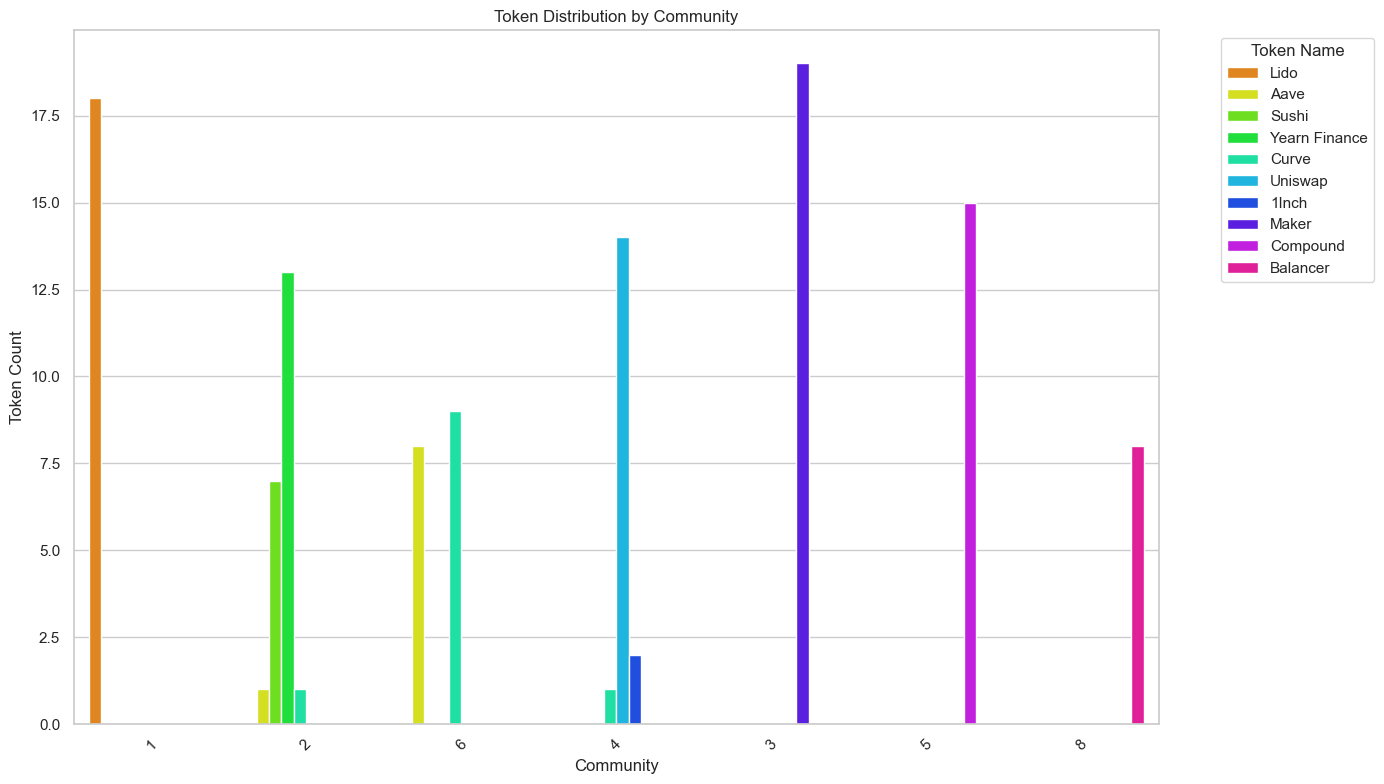

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the previously generated token distribution statistics
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution_stats.csv'
temporal_token_distribution_stats_df = pd.read_csv(output_file)

# Create a stacked bar chart
def plot_token_distribution_by_community(df):
    # Set the plot style
    sns.set(style="whitegrid")

    # Convert 'Community' to string to avoid sorting issues
    df['Community'] = df['Community'].astype(str)

    # Set up a color palette that stays consistent across snapshots
    unique_tokens = df['Token Name'].unique()
    palette = sns.color_palette("hsv", len(unique_tokens))
    color_map = {token: palette[i] for i, token in enumerate(unique_tokens)}

    # Create the plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=df, 
        x='Community', 
        y='Count', 
        hue='Token Name', 
        palette=color_map
    )

    plt.title('Token Distribution by Community')
    plt.xlabel('Community')
    plt.ylabel('Token Count')
    plt.legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Filter for a specific snapshot date, if needed
snapshot_date = '2021-08'  # Example snapshot date
filtered_df = temporal_token_distribution_stats_df[temporal_token_distribution_stats_df['Snapshot Date'] == snapshot_date]

# Plot the distribution for the specific snapshot date
plot_token_distribution_by_community(filtered_df)


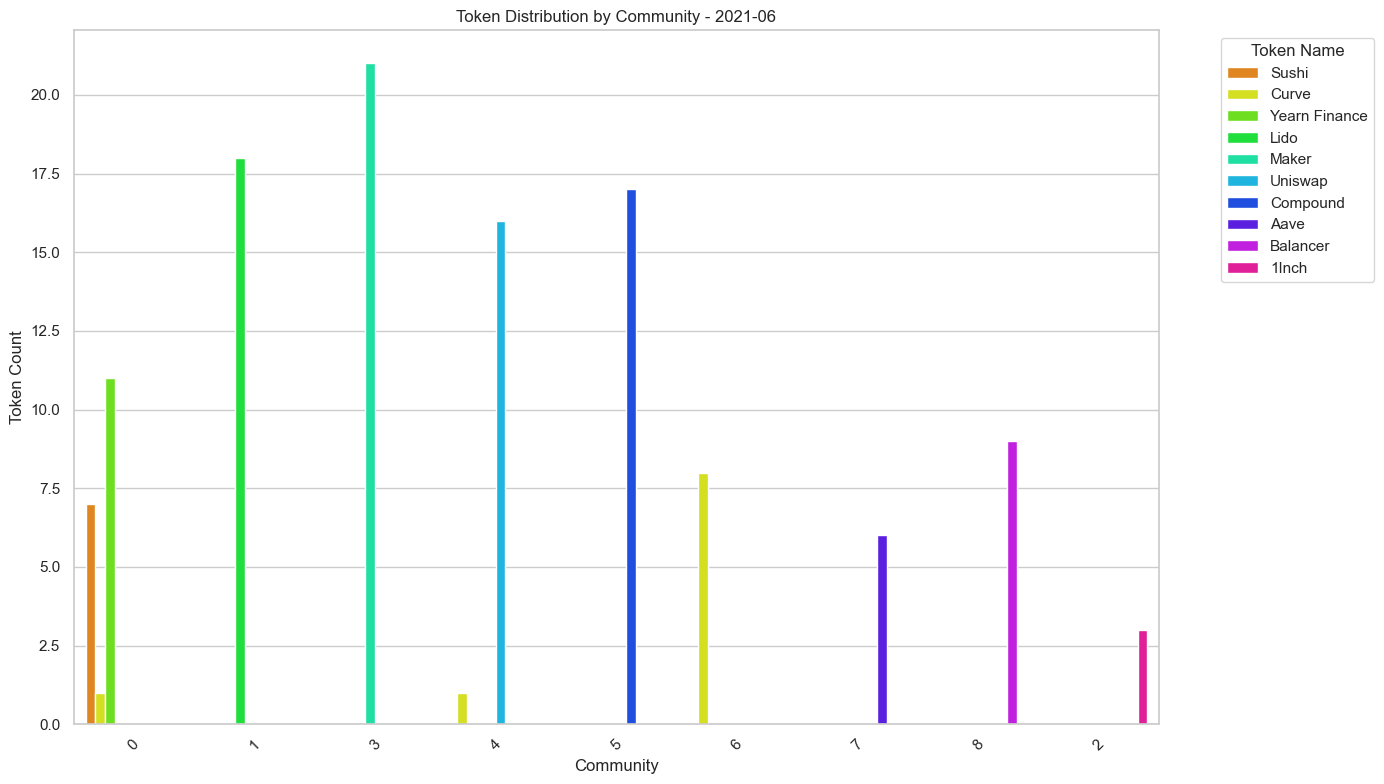

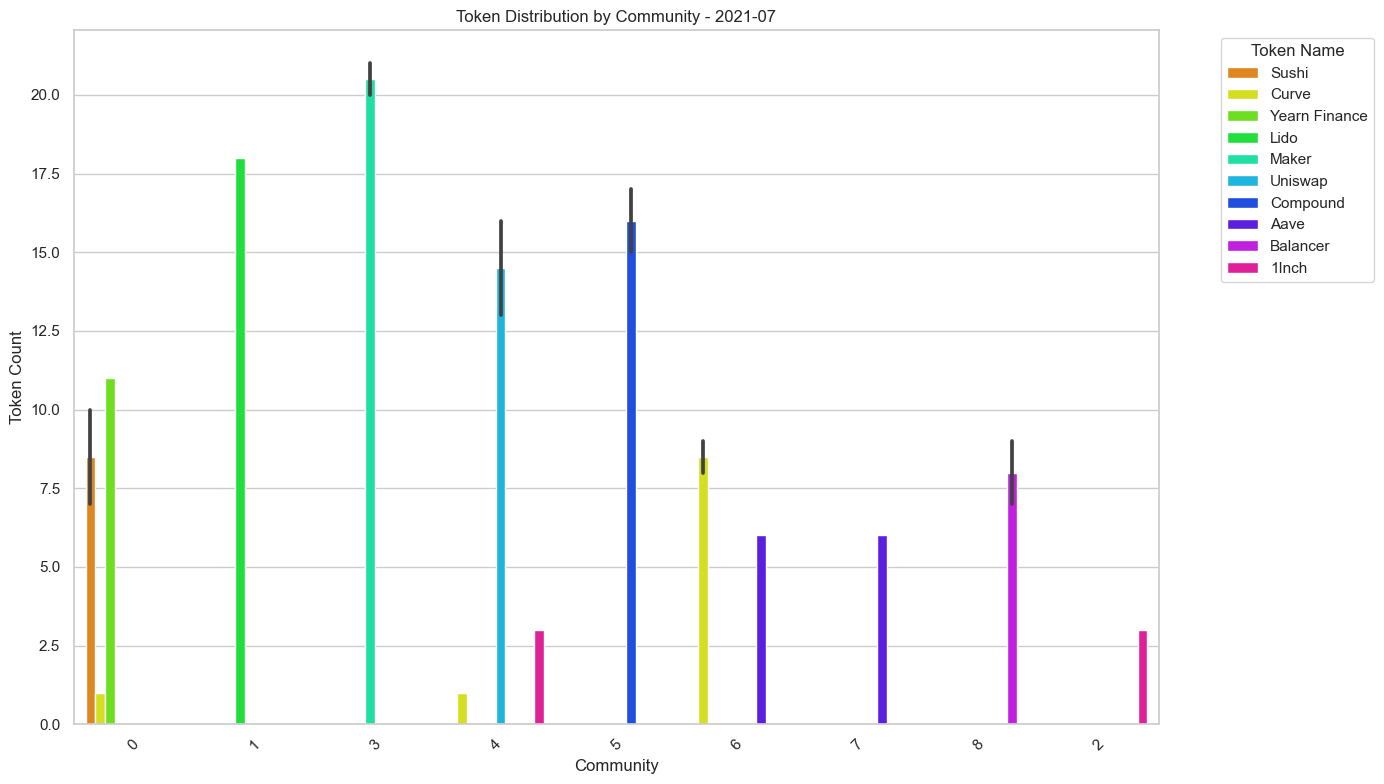

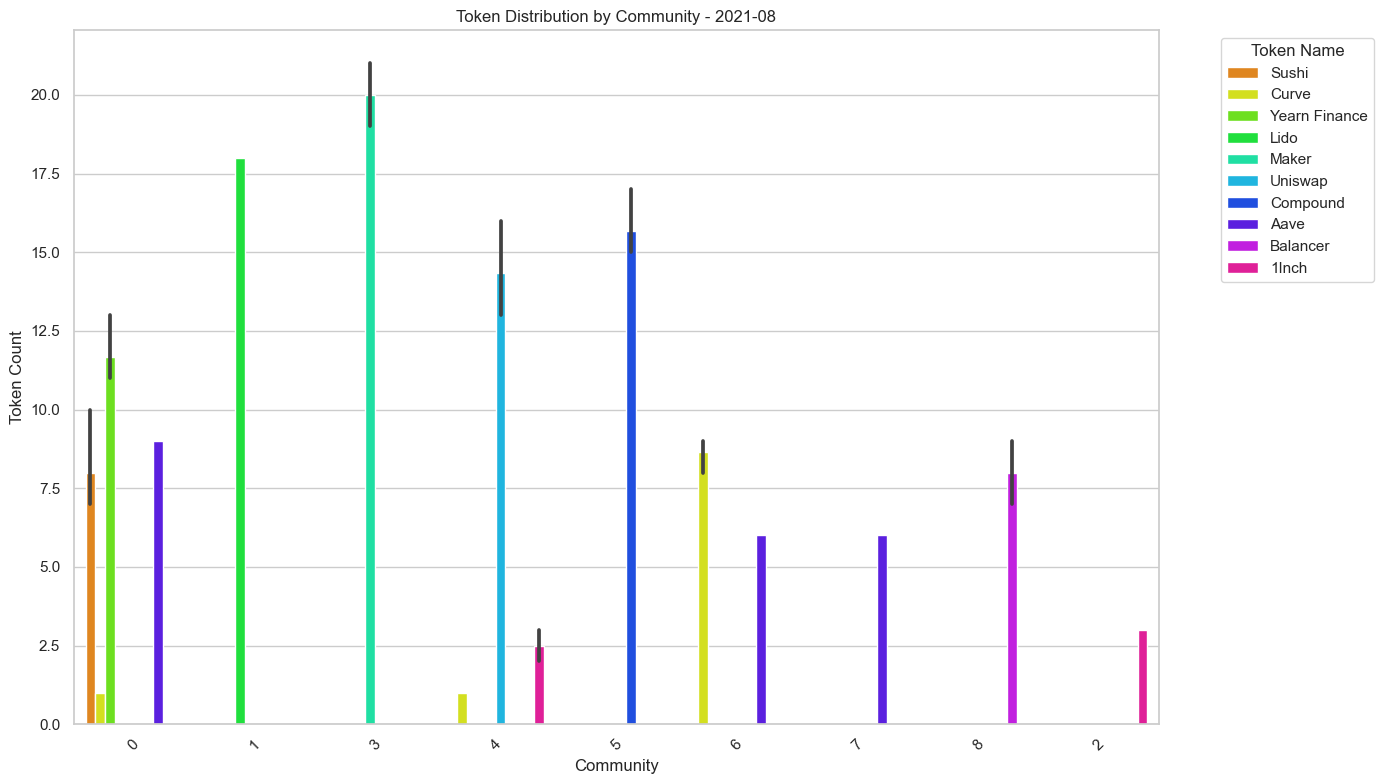

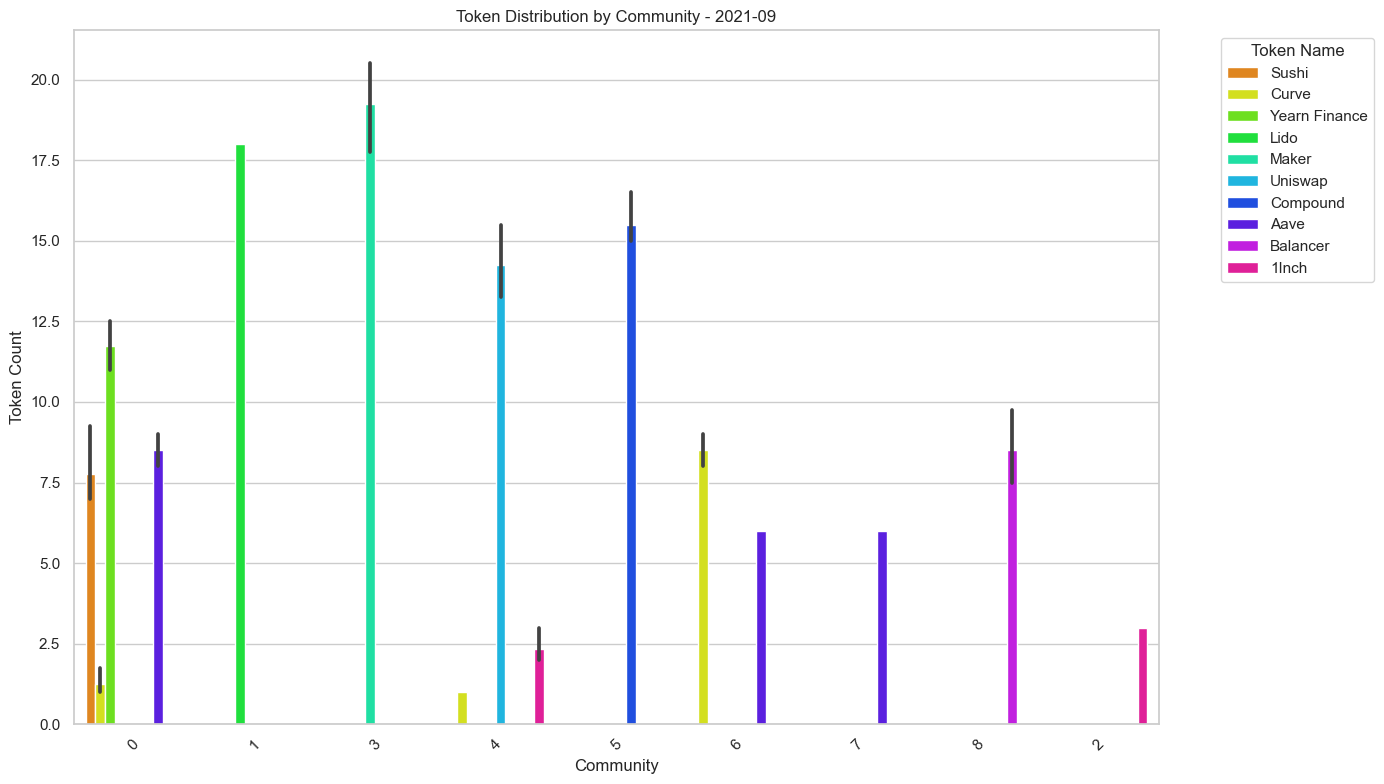

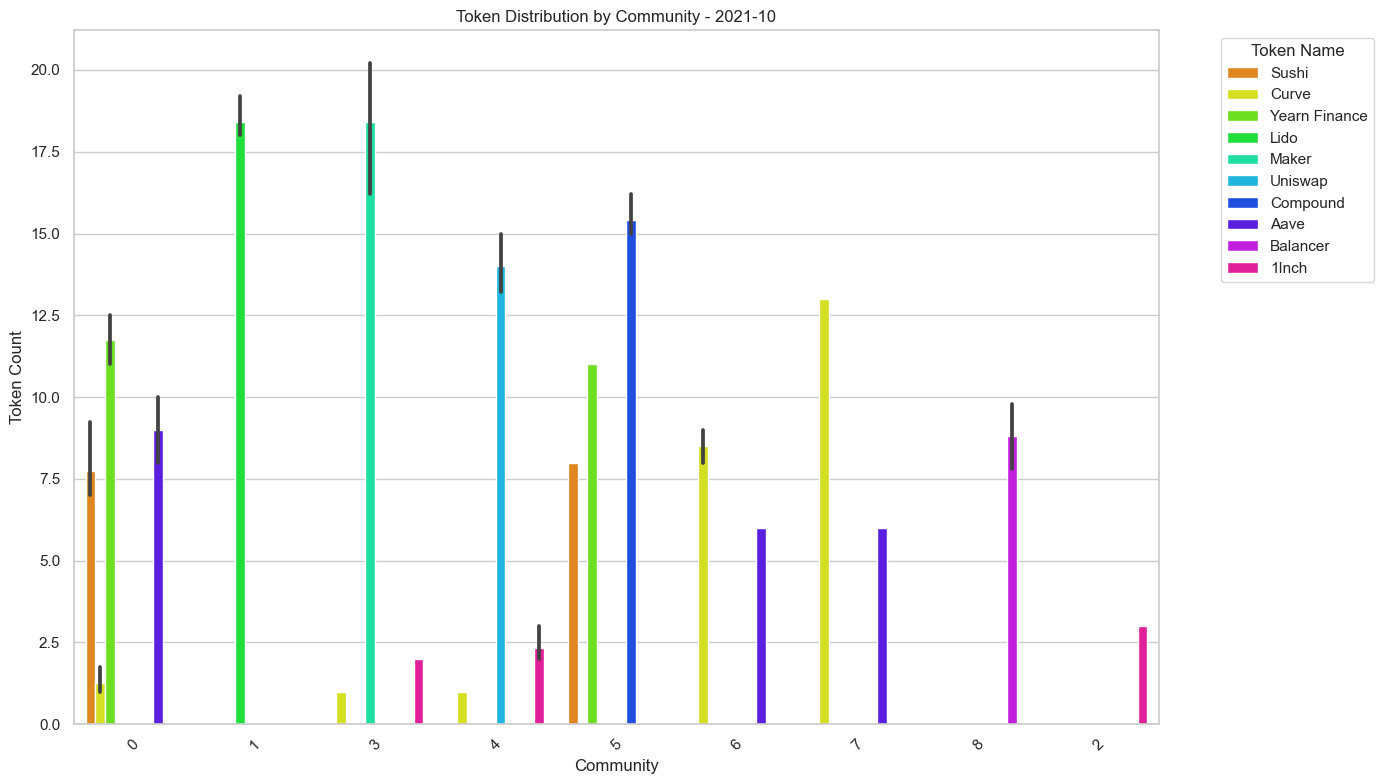

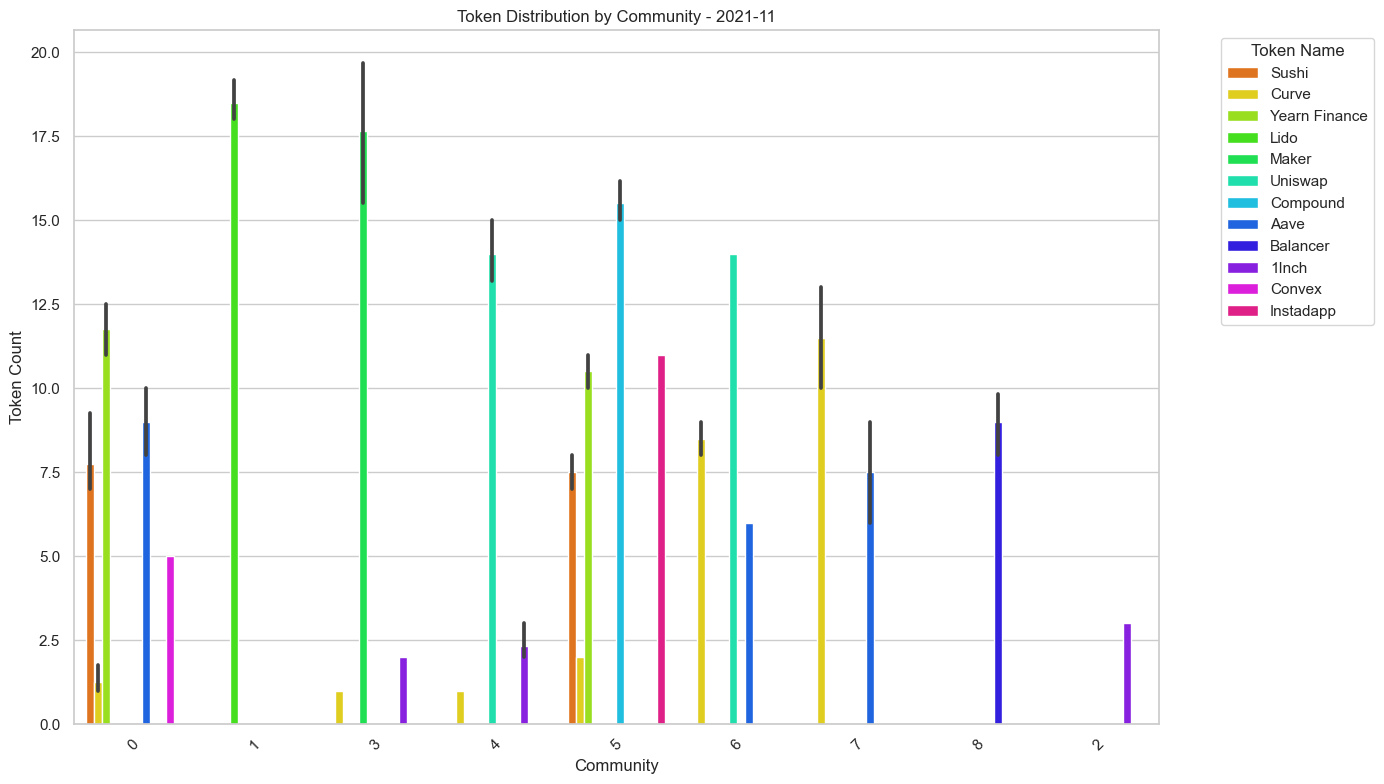

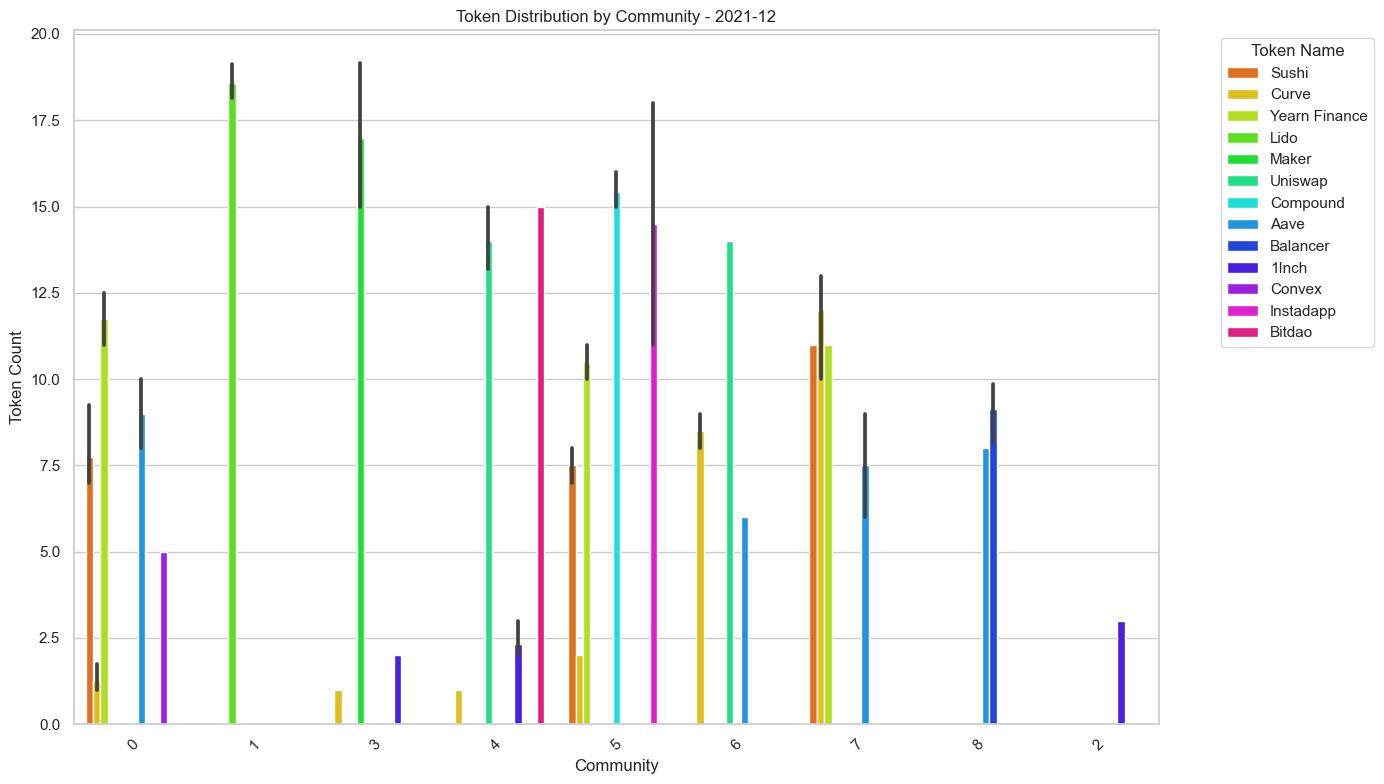

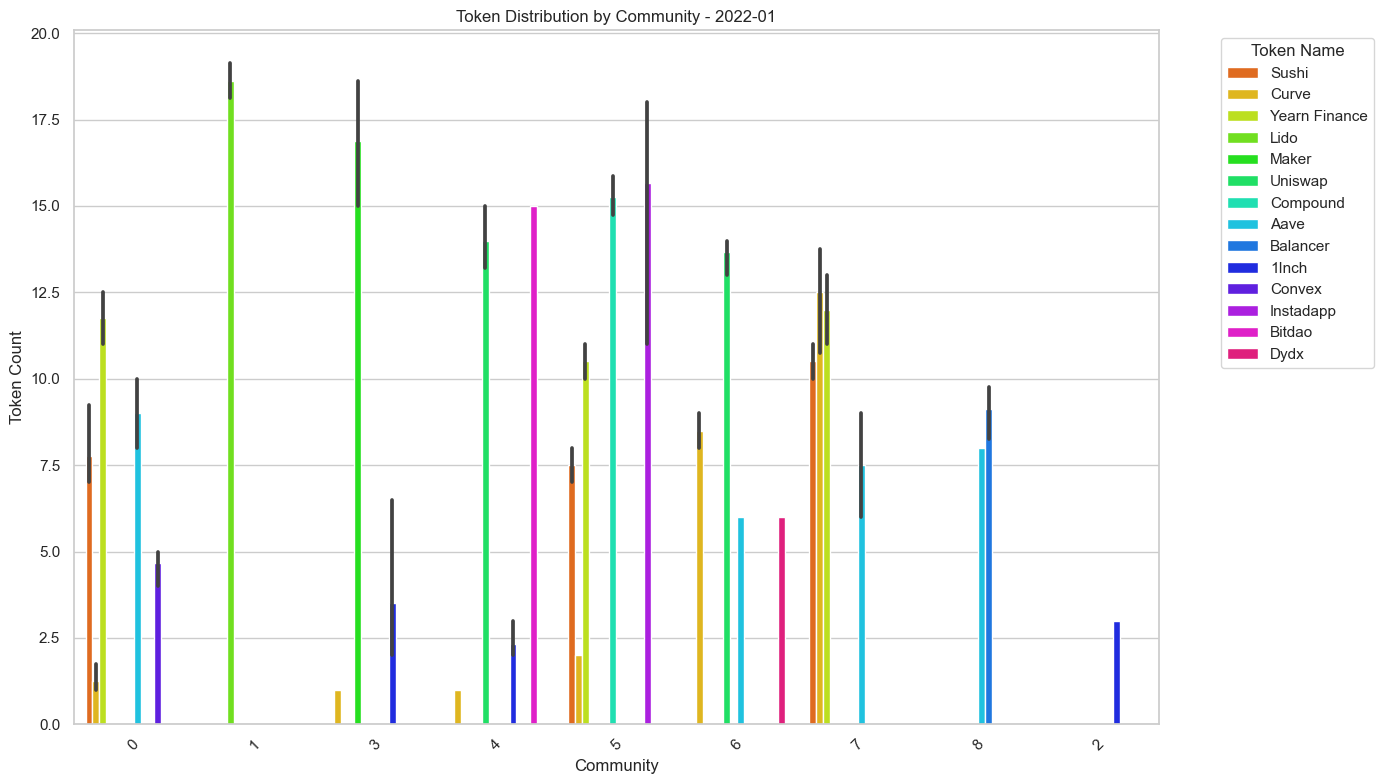

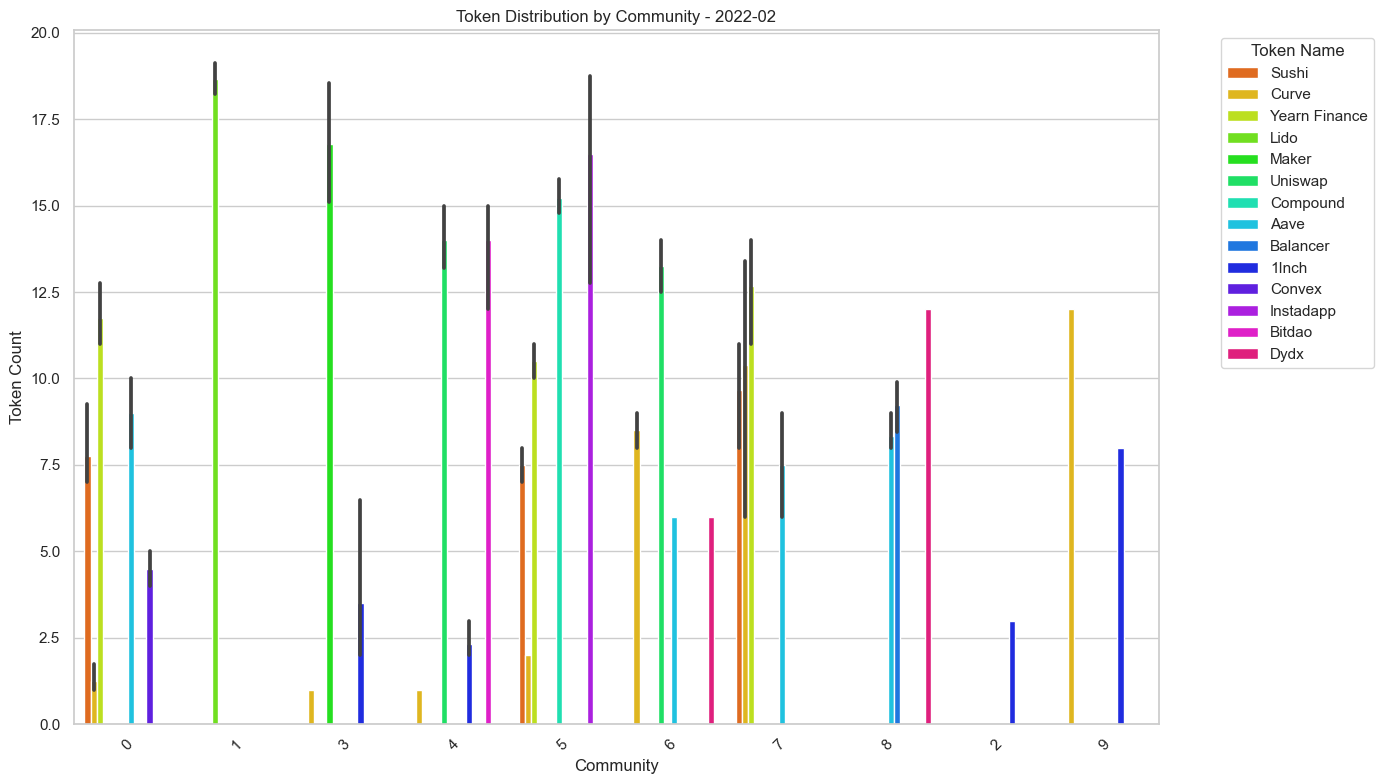

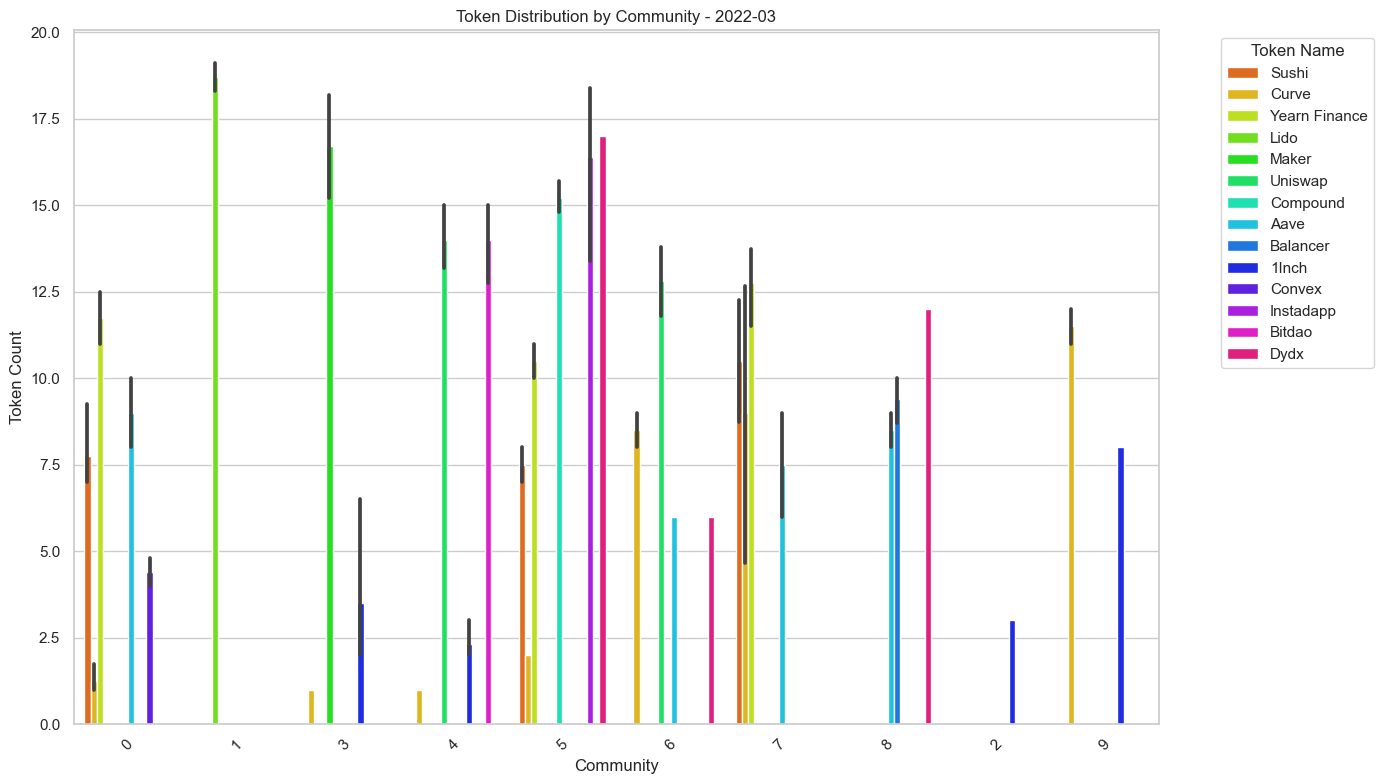

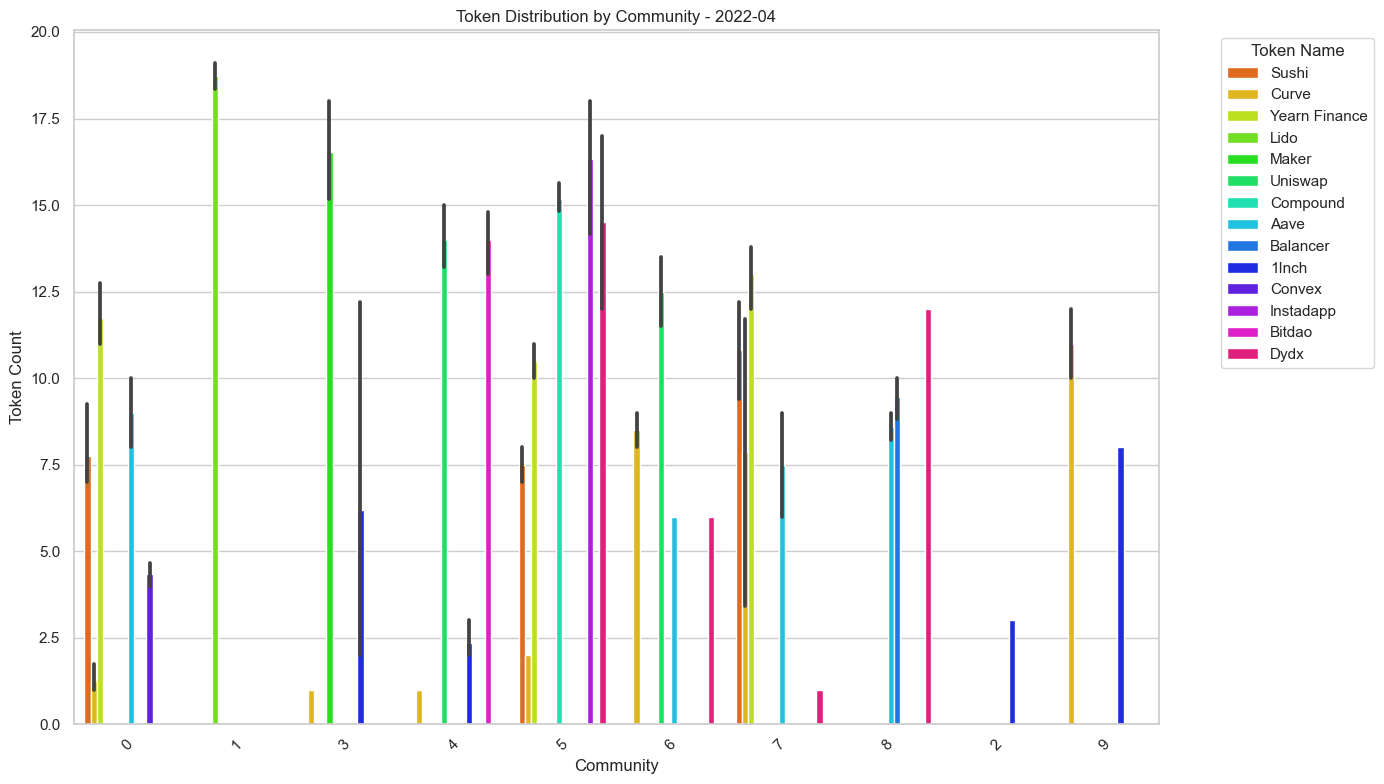

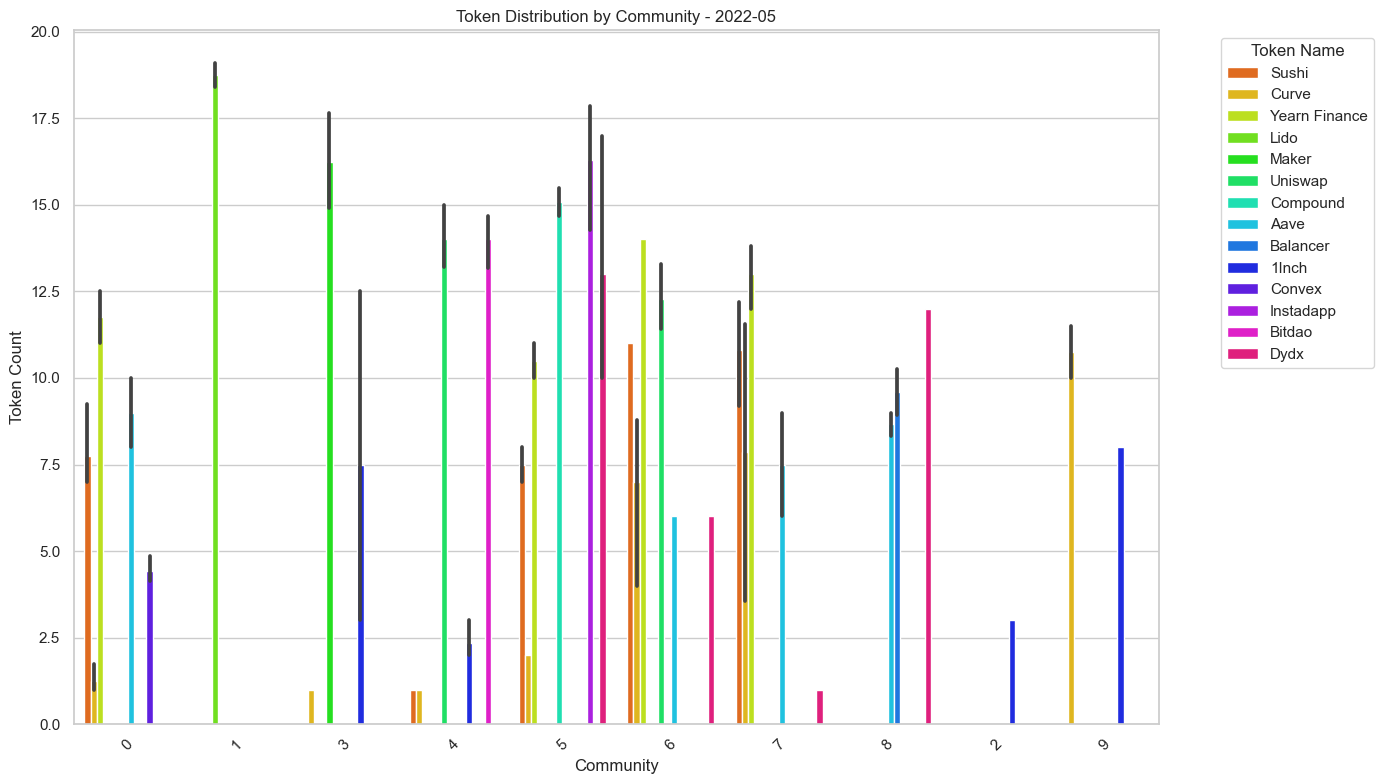

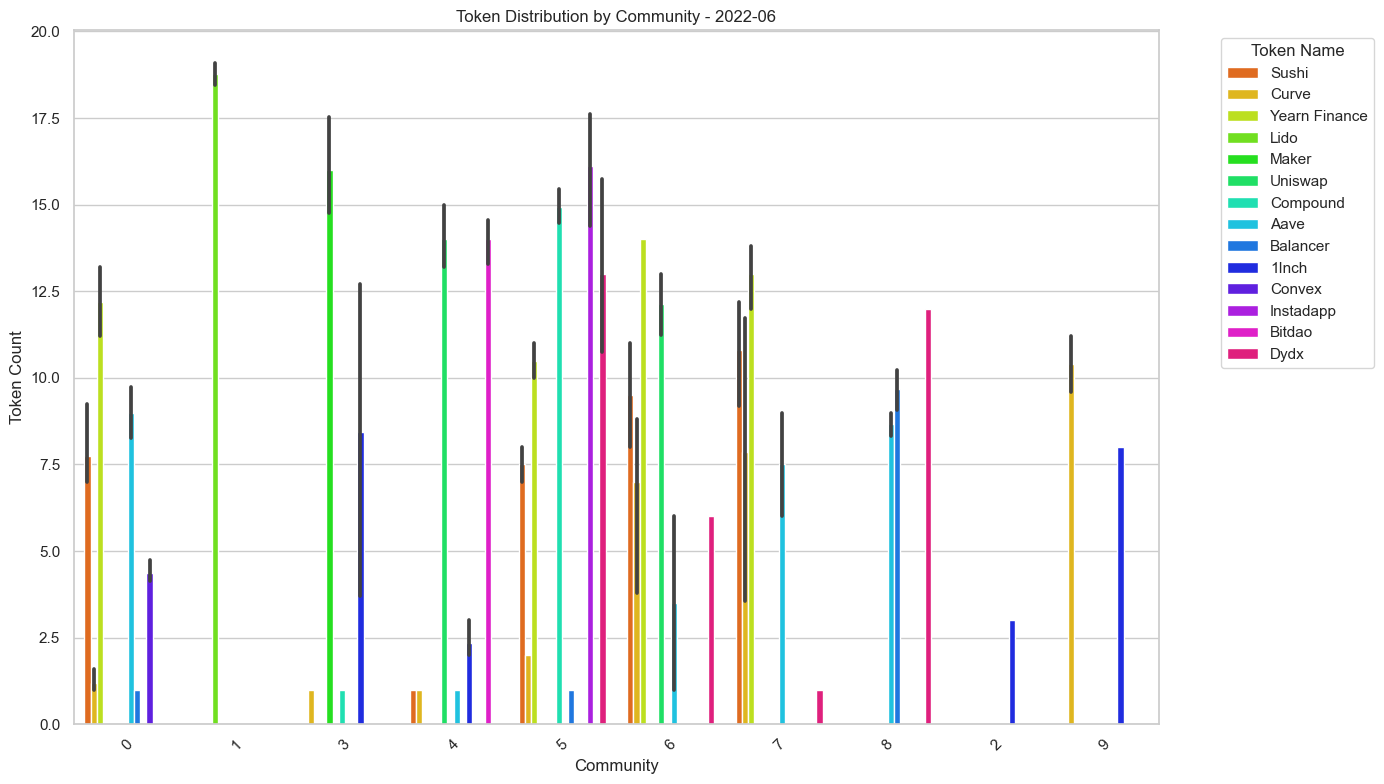

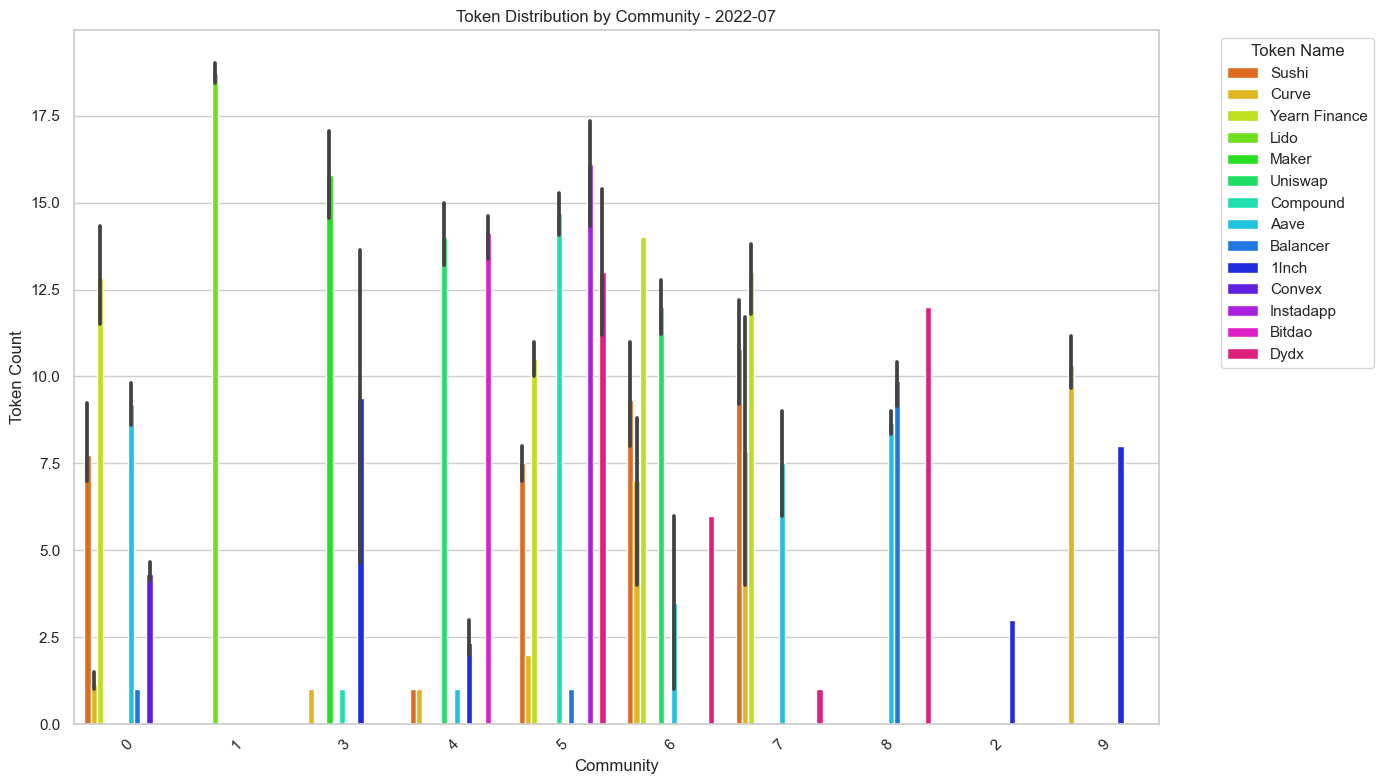

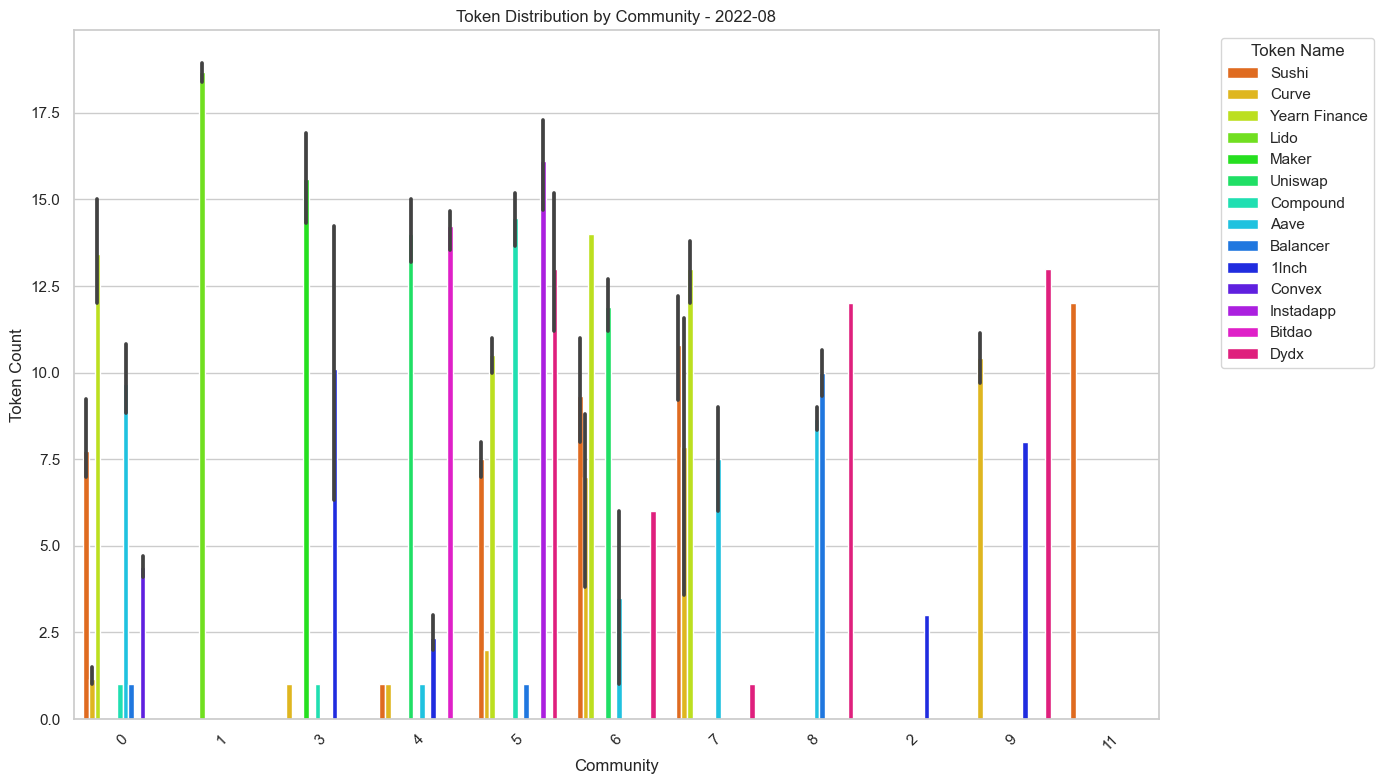

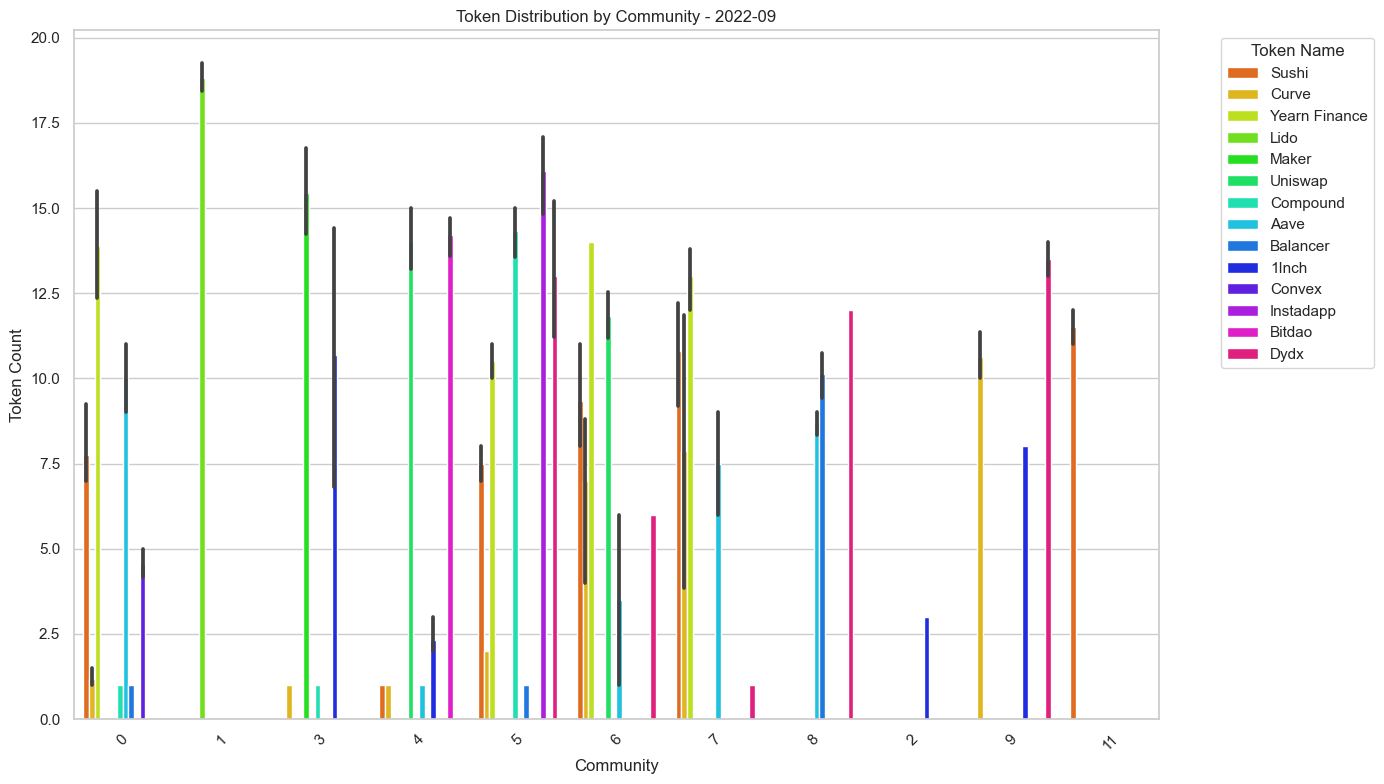

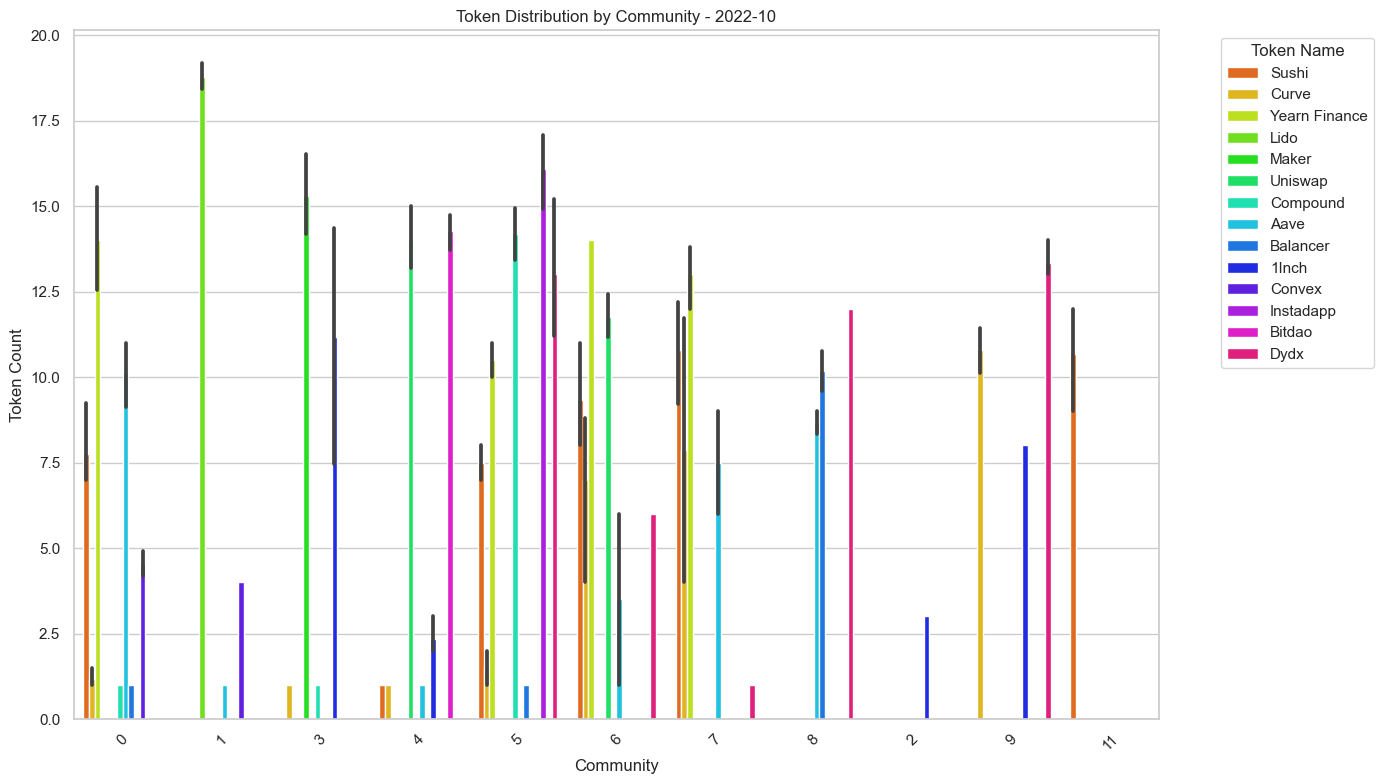

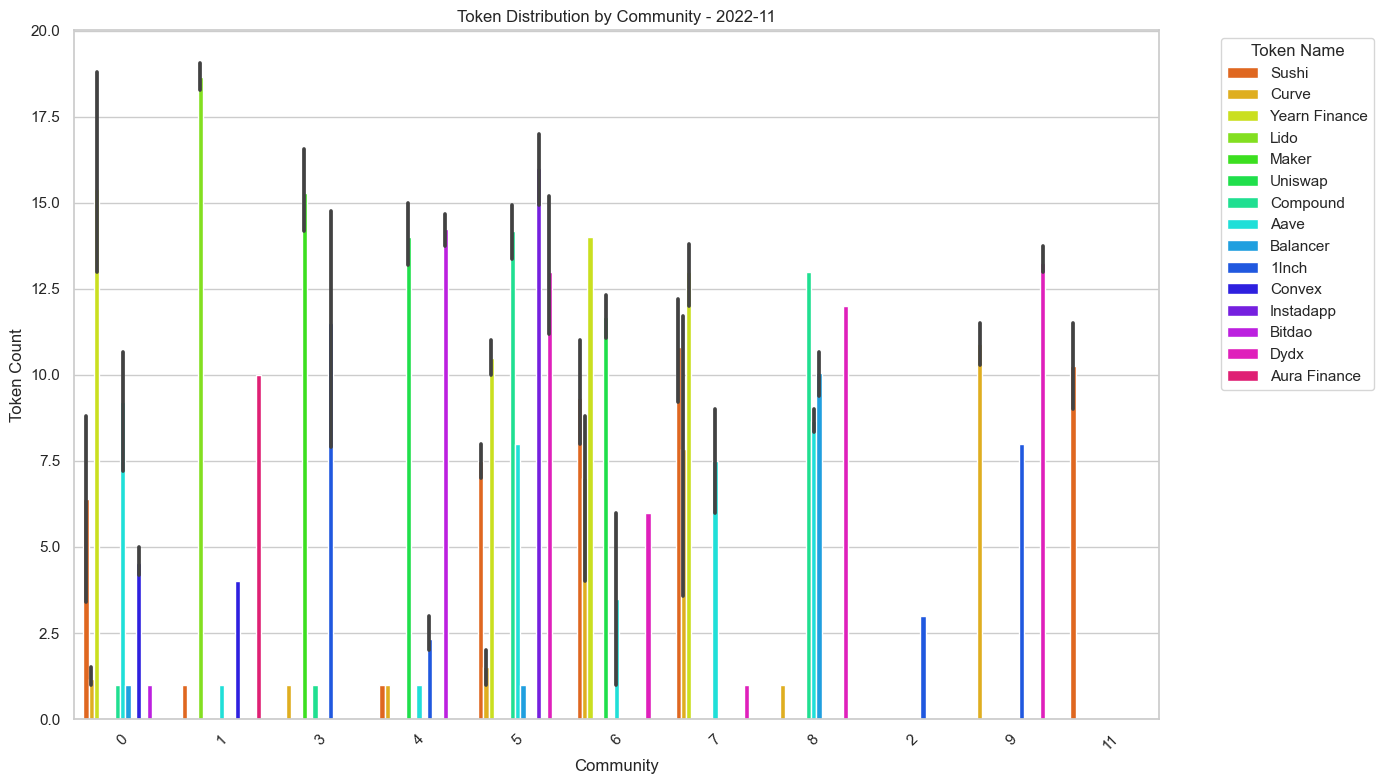

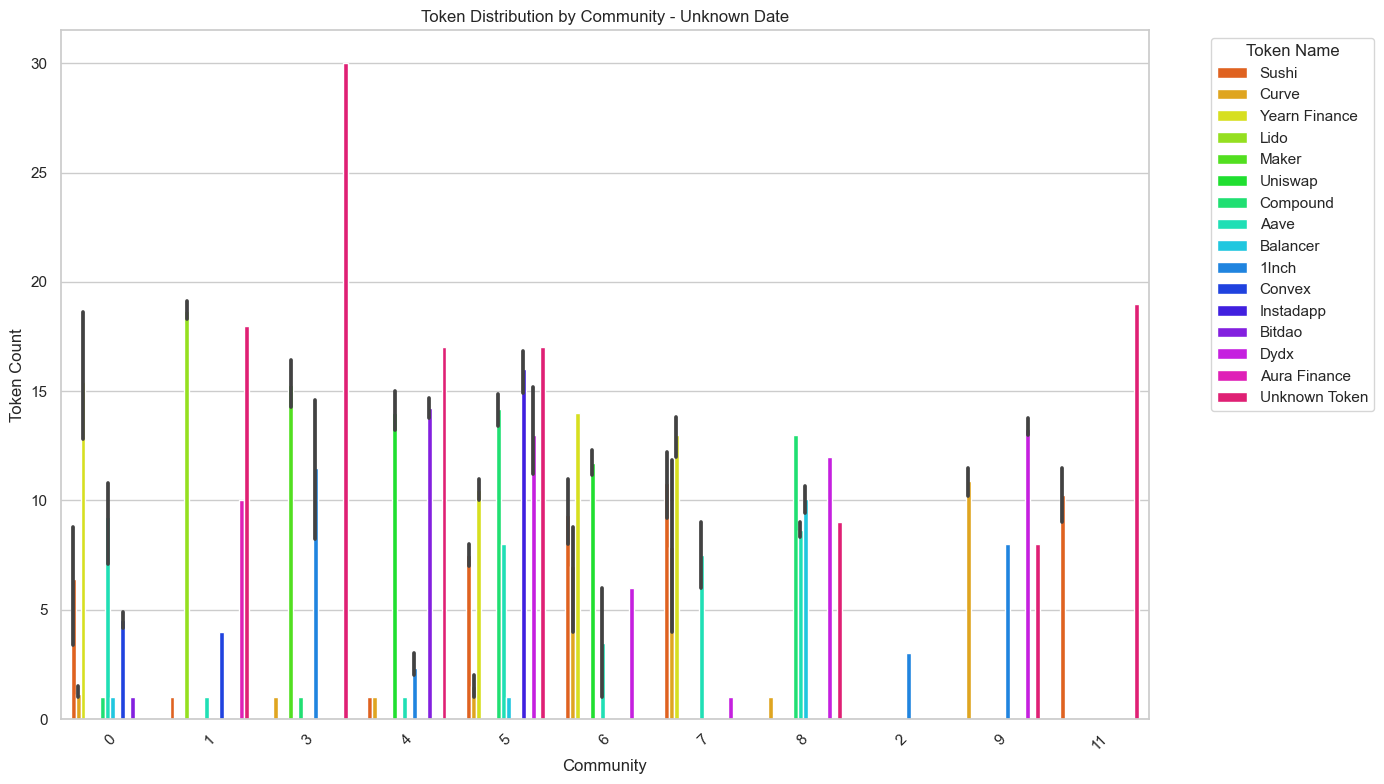

  Snapshot Date  Community     Token Name  Count
0       2021-06          0          Sushi      7
1       2021-06          0          Curve      1
2       2021-06          0  Yearn Finance     11
3       2021-06          1           Lido     18
4       2021-06          3          Maker     21


In [43]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_token_distribution = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_token_distribution[community][token_name] += 1
    return community_token_distribution

def plot_token_distribution_by_community(df, snapshot_date):
    """Plot the token distribution for a specific snapshot date."""
    # Set the plot style
    sns.set(style="whitegrid")

    # Convert 'Community' to string to avoid sorting issues
    df['Community'] = df['Community'].astype(str)

    # Set up a color palette that stays consistent across snapshots
    unique_tokens = df['Token Name'].unique()
    palette = sns.color_palette("hsv", len(unique_tokens))
    color_map = {token: palette[i] for i, token in enumerate(unique_tokens)}

    # Create the plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=df, 
        x='Community', 
        y='Count', 
        hue='Token Name', 
        palette=color_map
    )

    plt.title(f'Token Distribution by Community - {snapshot_date}')
    plt.xlabel('Community')
    plt.ylabel('Token Count')
    plt.legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_distribution_stats = []
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)  # This correctly matches the normal graph filename

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Compute token distribution within communities using the enriched graph
            token_distribution = compute_token_distribution(partition, enriched_G, token_map)

            # Extract snapshot time from filename
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store the results in a structured format
            for community, tokens in token_distribution.items():
                for token_name, count in tokens.items():
                    token_distribution_stats.append({
                        'Snapshot Date': snapshot_date,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Plot the distribution for the current snapshot
            plot_token_distribution_by_community(pd.DataFrame(token_distribution_stats), snapshot_date)

            # Update the previous partition for the next iteration
            prev_partition = partition

    # Convert the results to a DataFrame for further analysis
    return pd.DataFrame(token_distribution_stats)

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Compute the temporal token distribution statistics with token labeling and plot each snapshot
temporal_token_distribution_stats_df = temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates)

# Optionally save the results to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution_stats.csv'
temporal_token_distribution_stats_df.to_csv(output_file, index=False)

# Display the first few rows of the token distribution statistics
print(temporal_token_distribution_stats_df.head())


/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


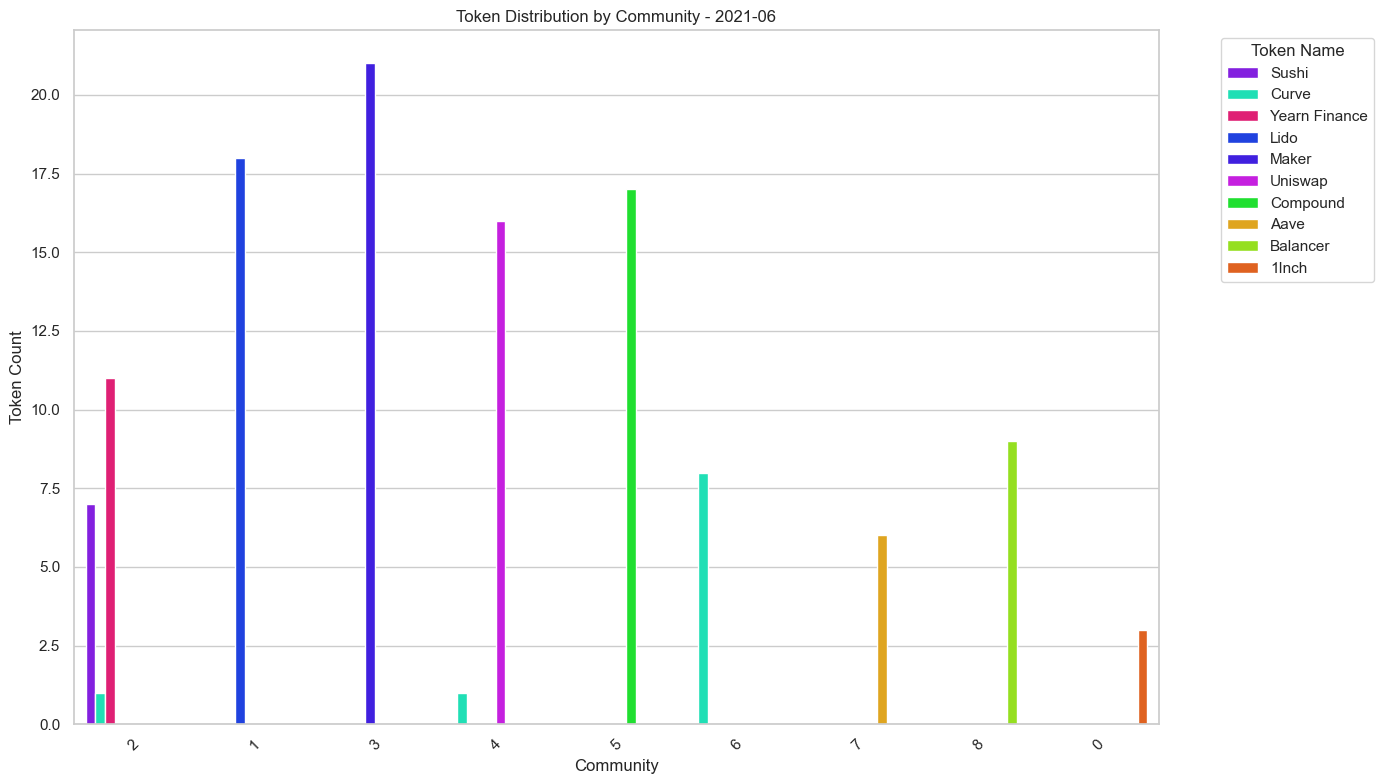

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


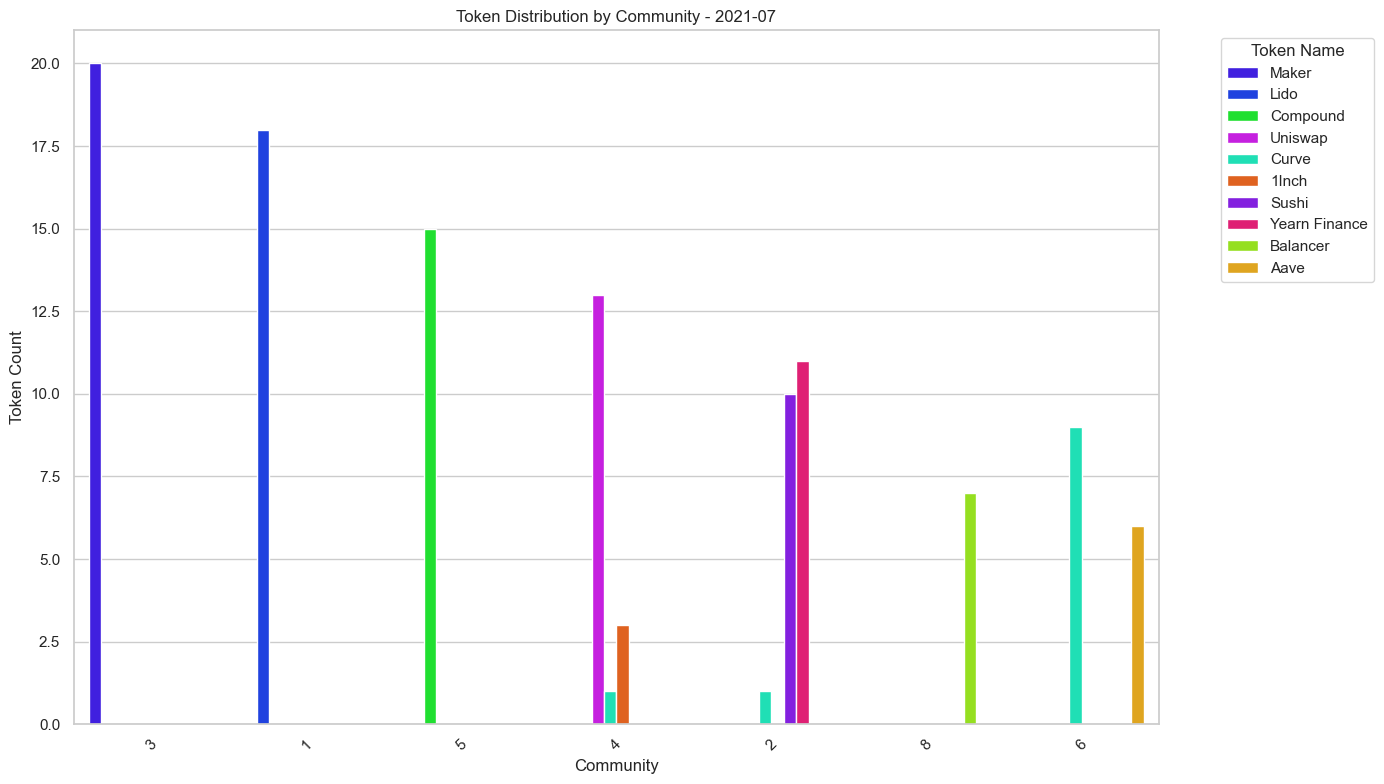

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


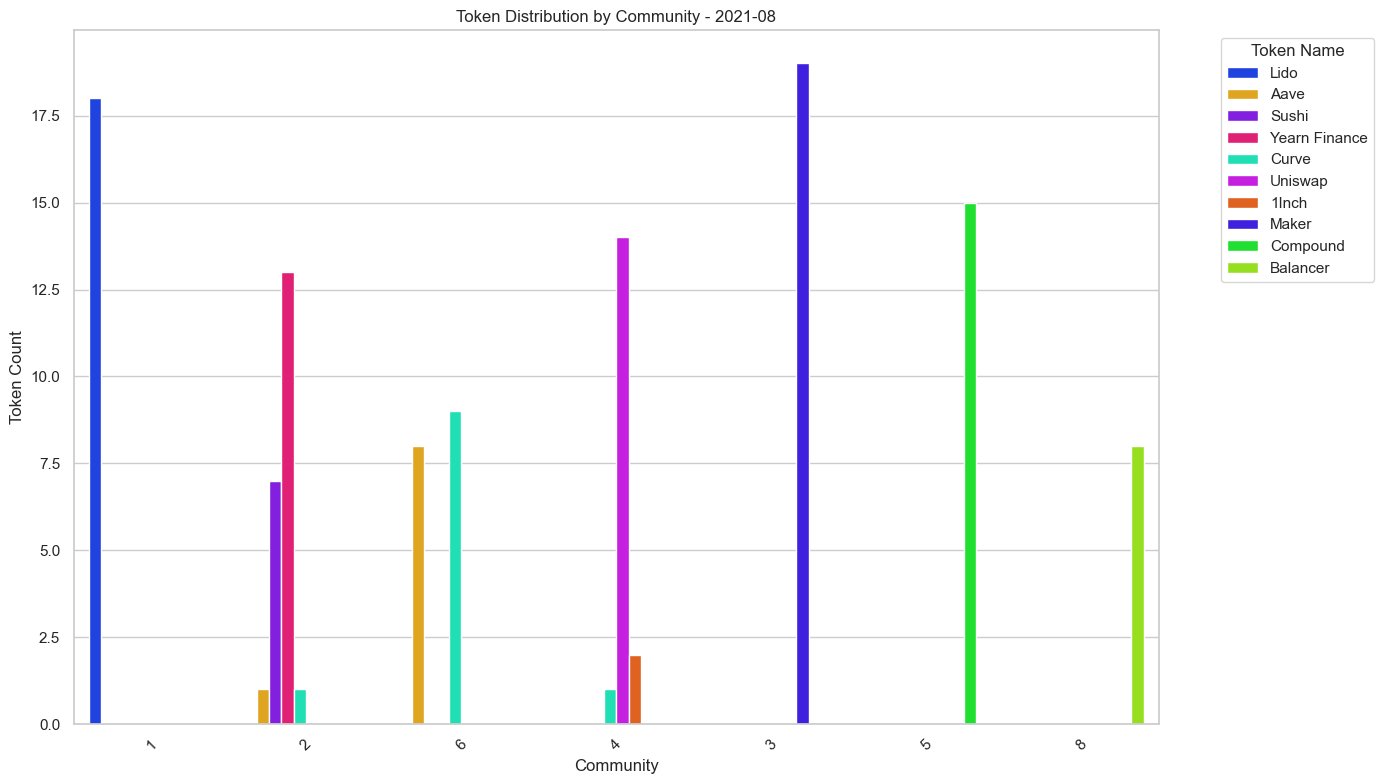

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


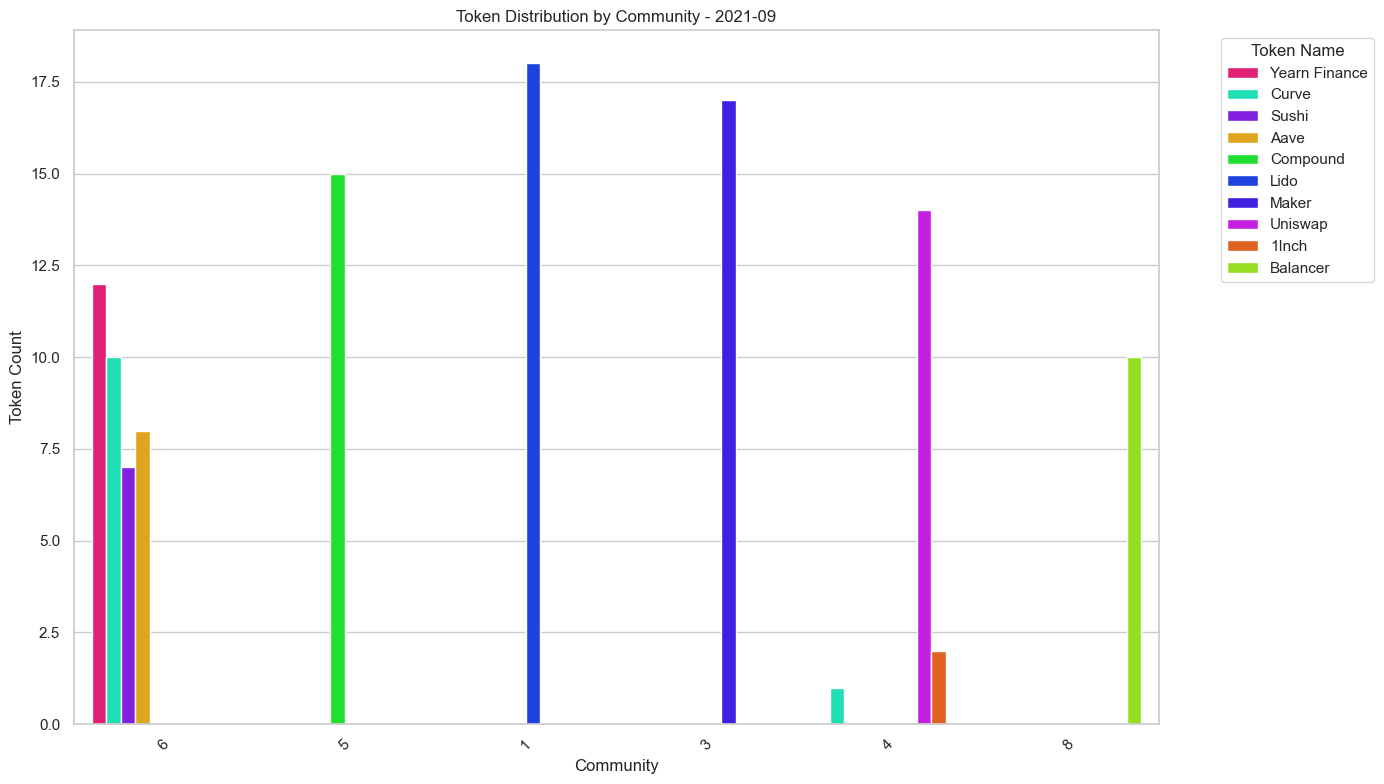

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


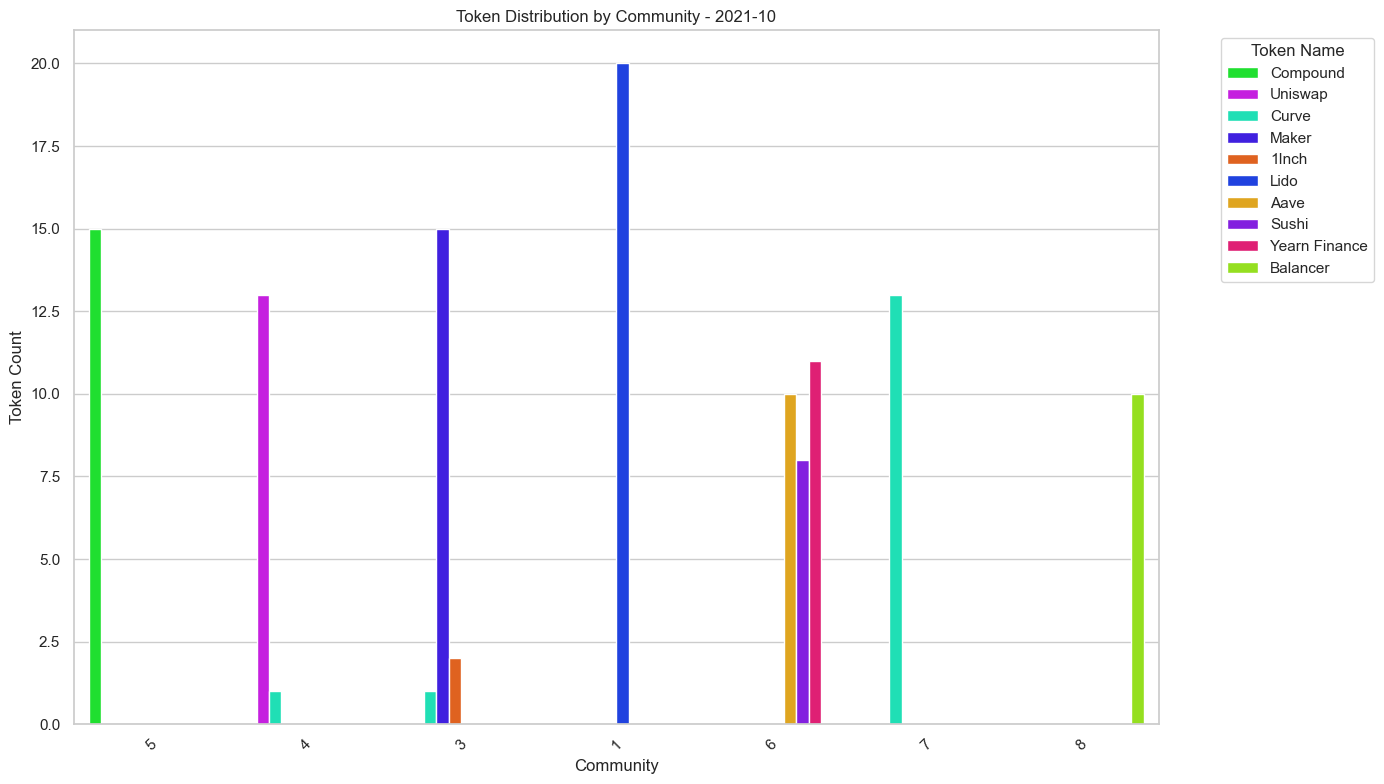

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


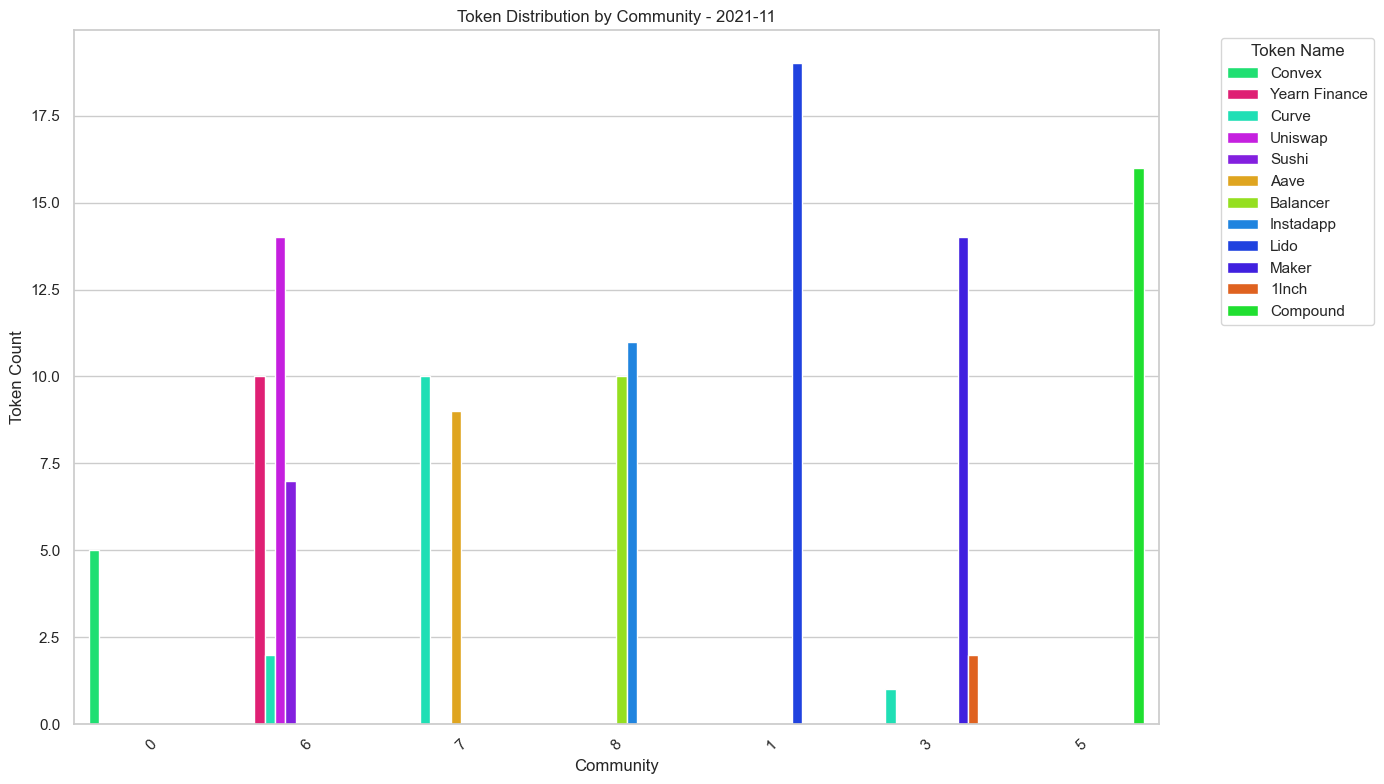

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


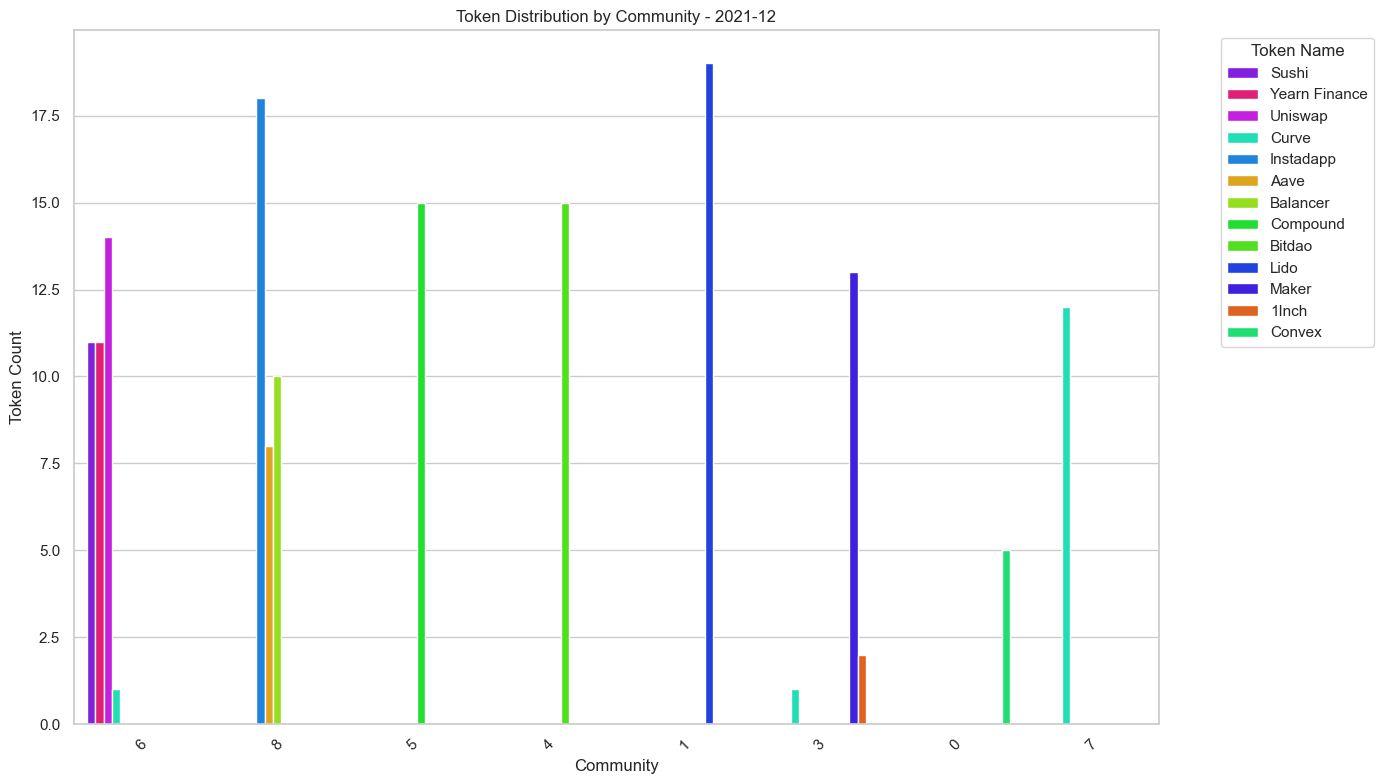

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


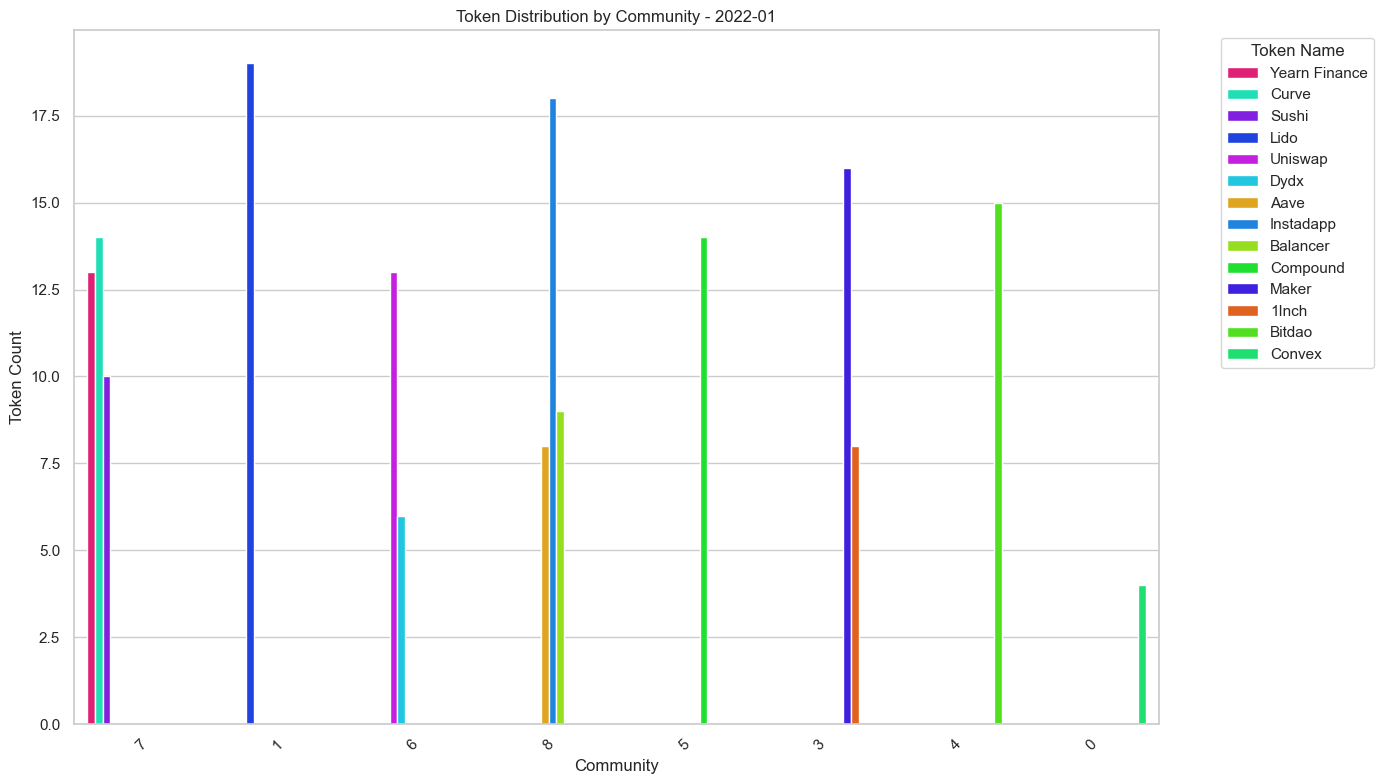

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


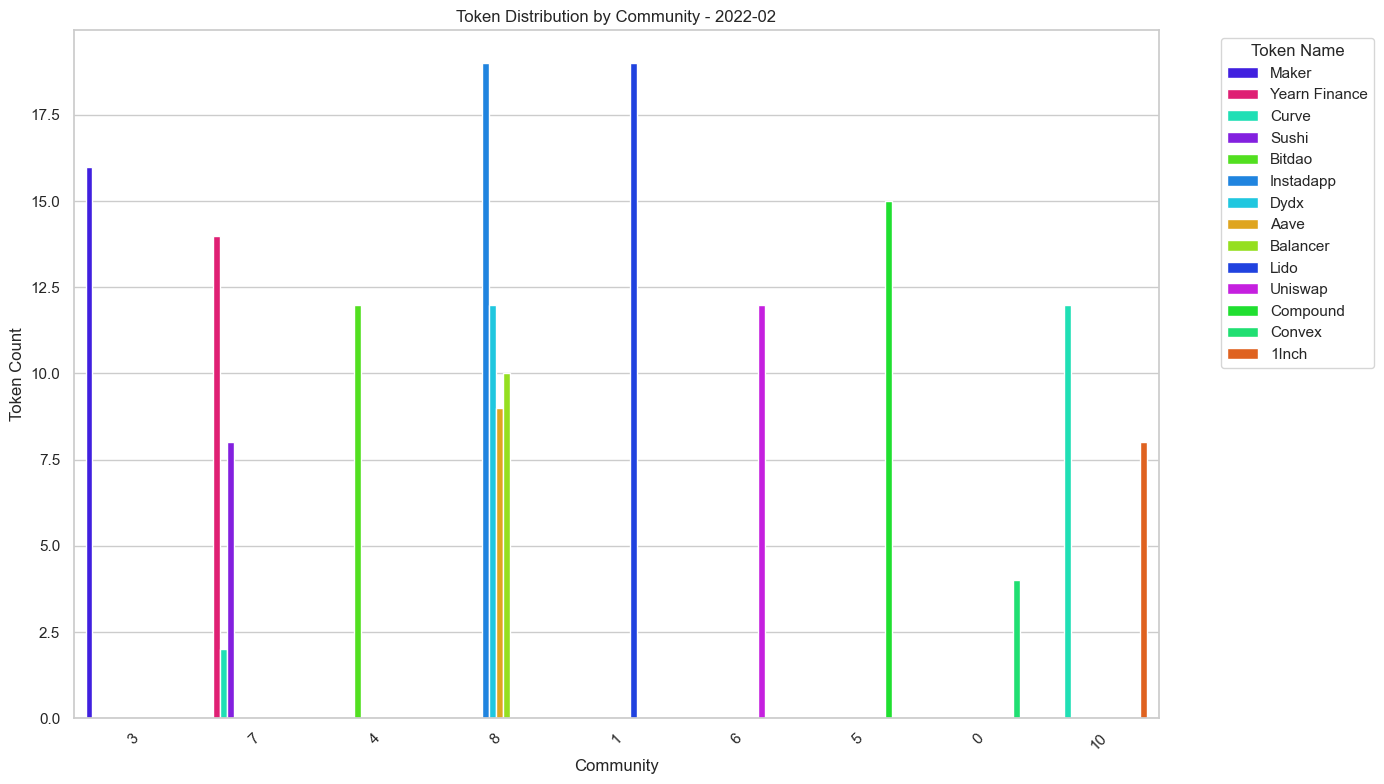

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


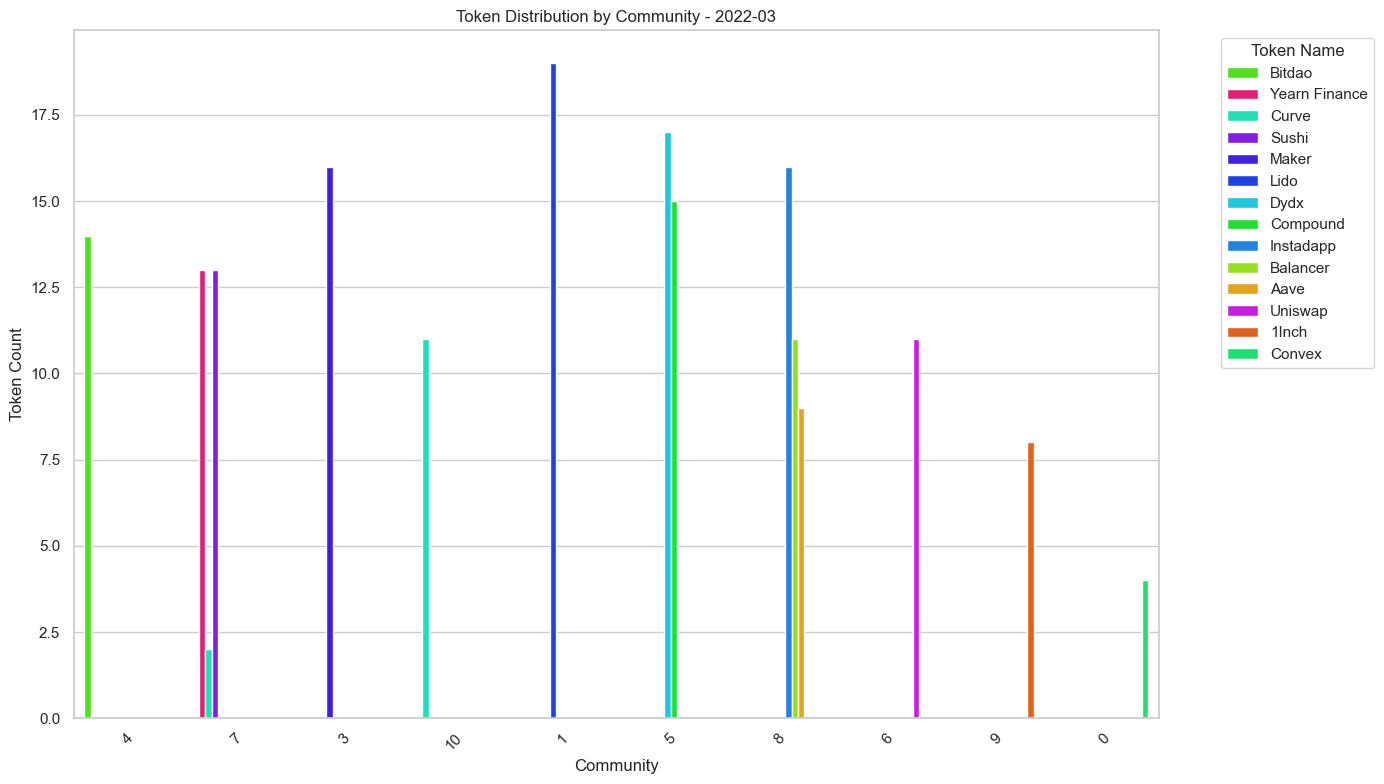

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


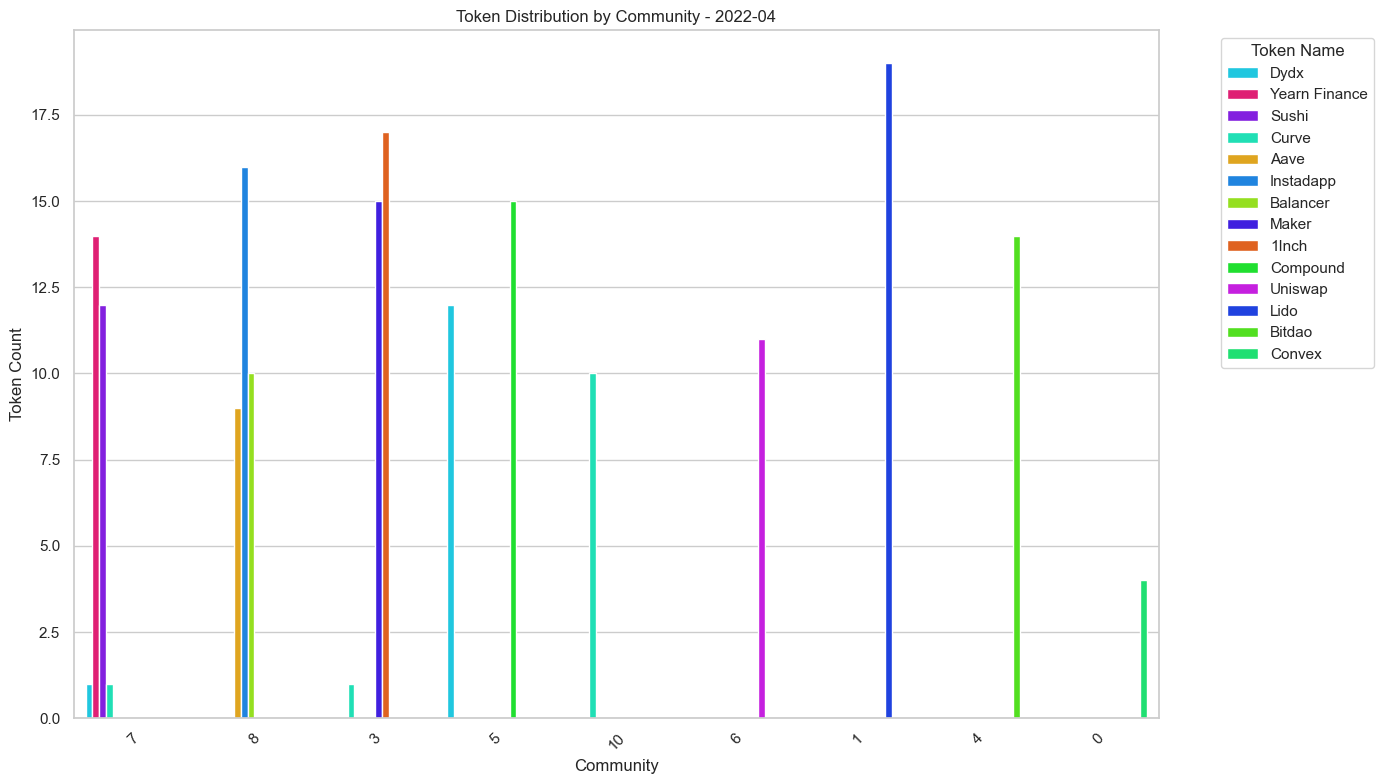

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


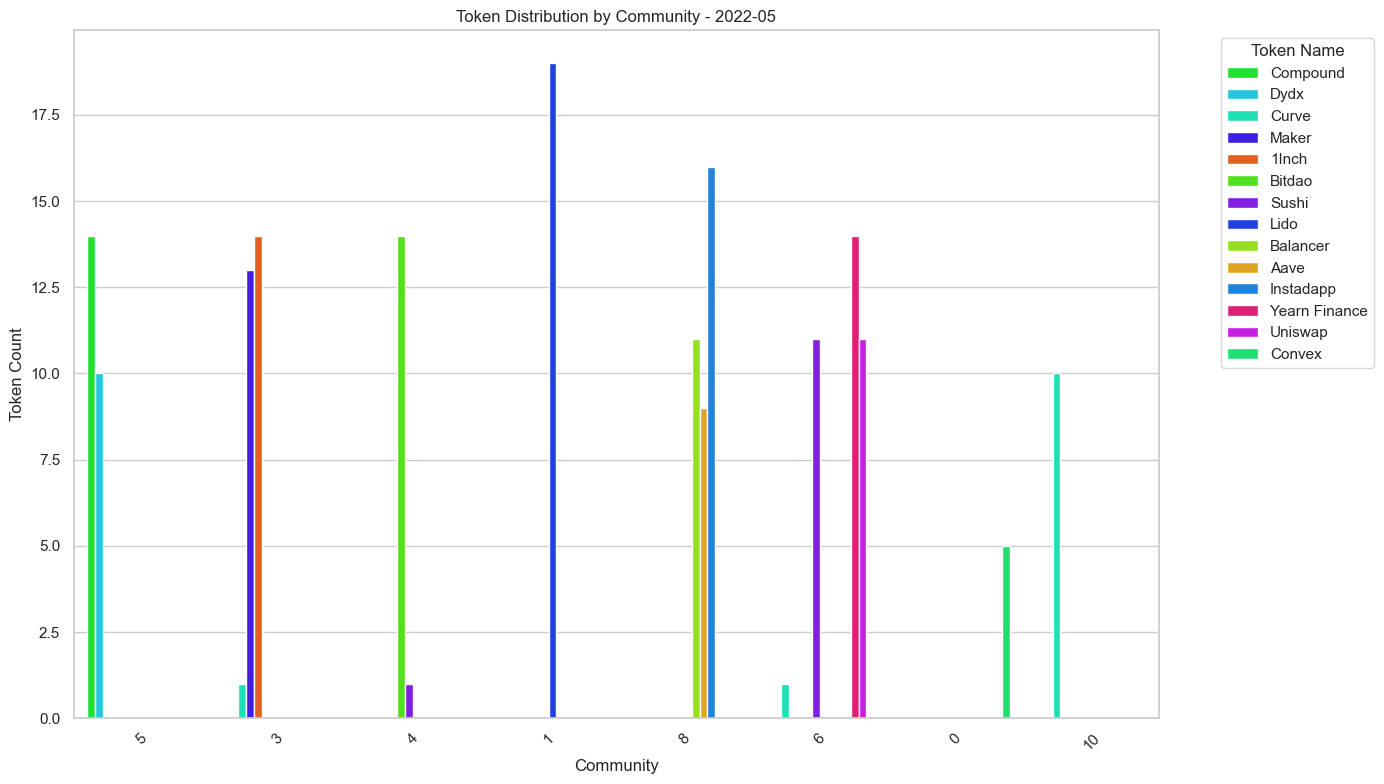

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


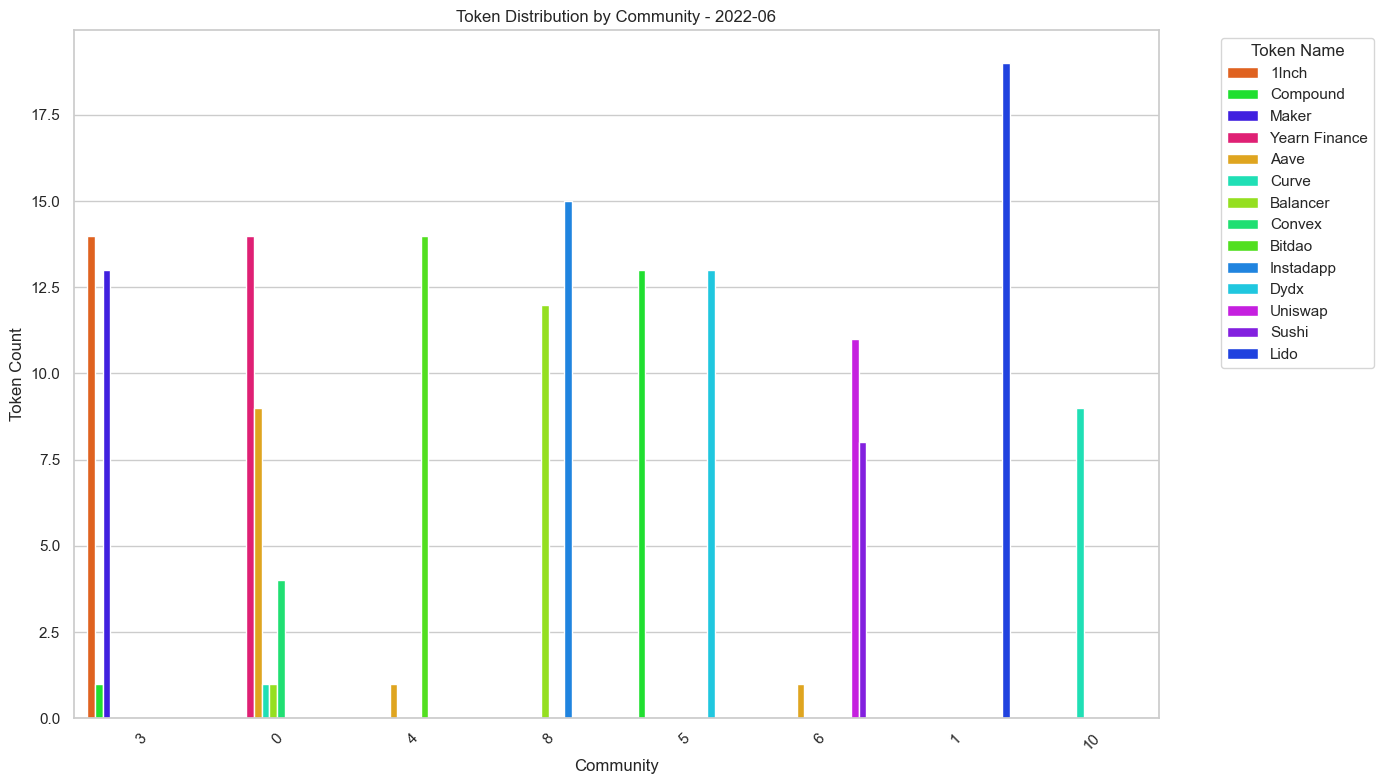

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


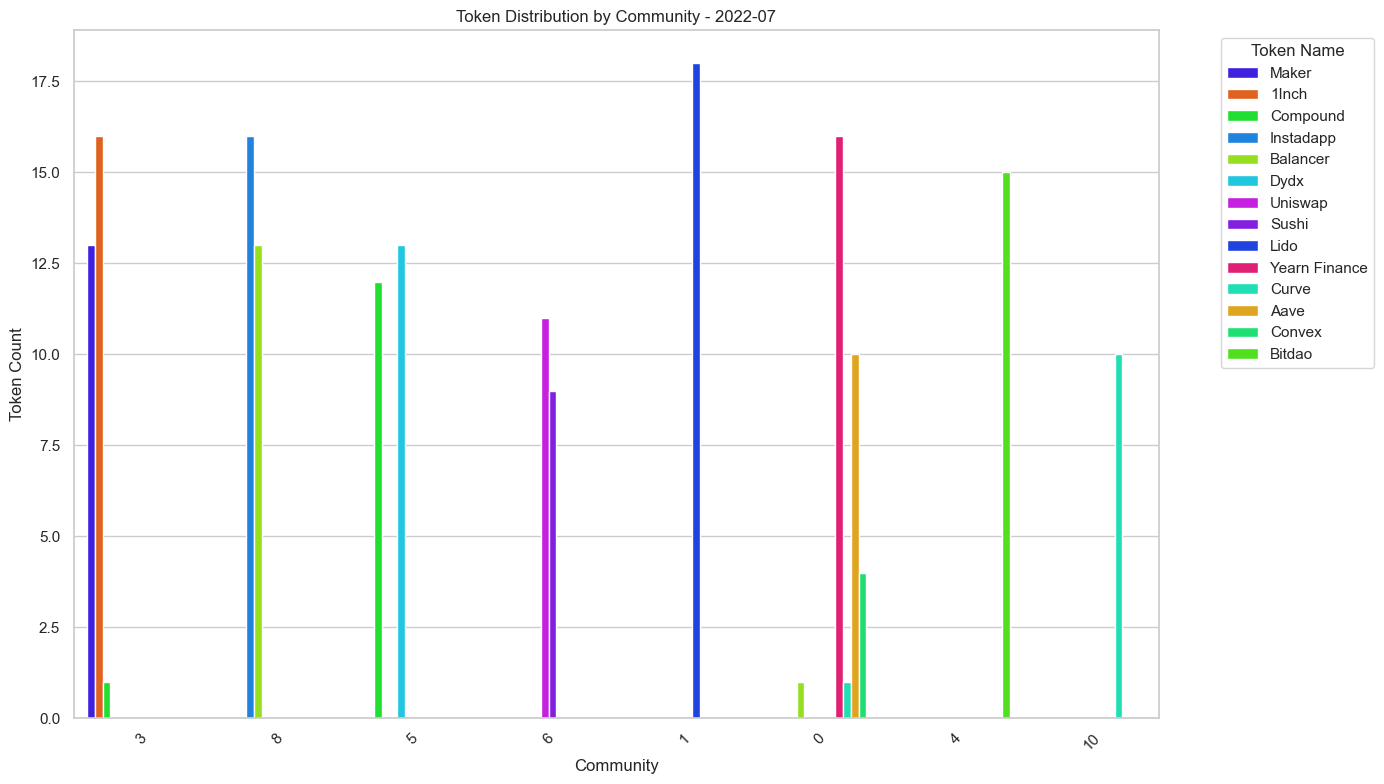

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


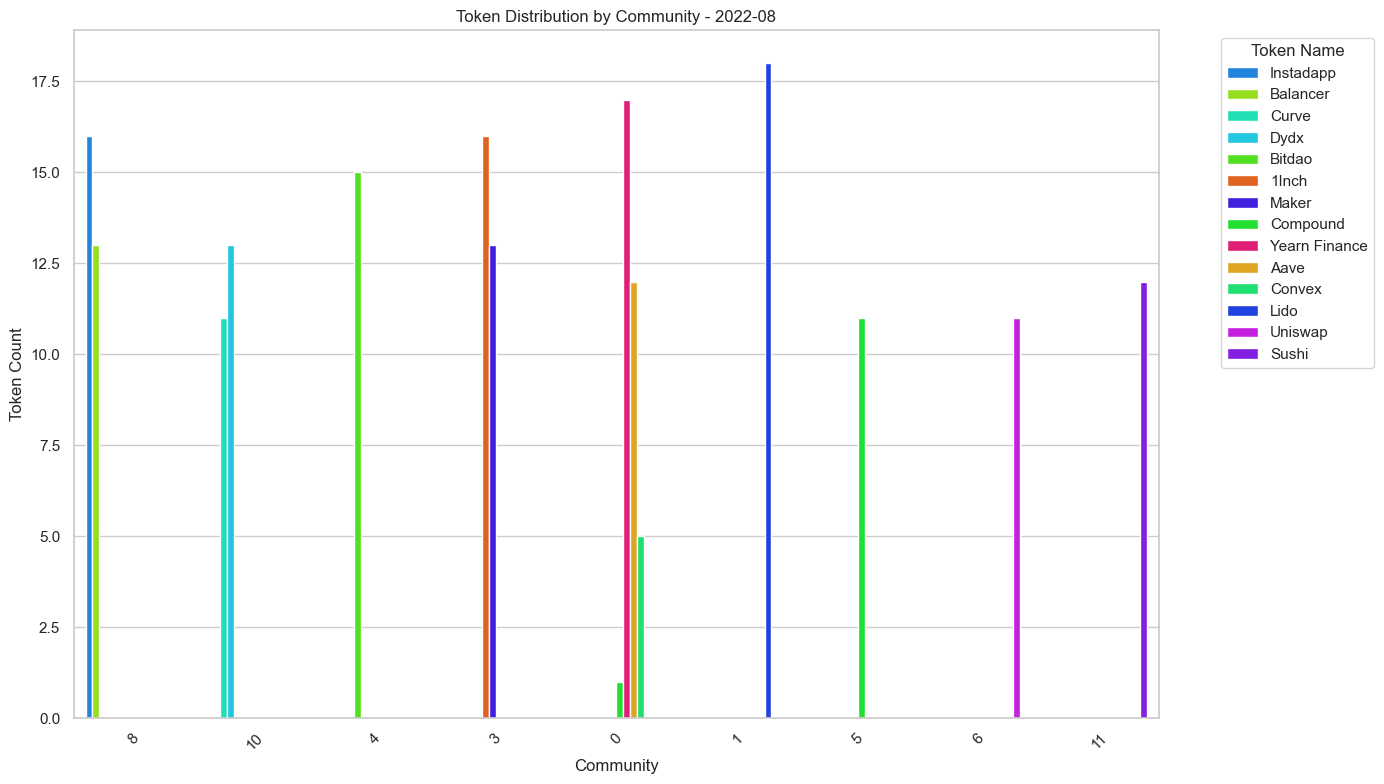

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


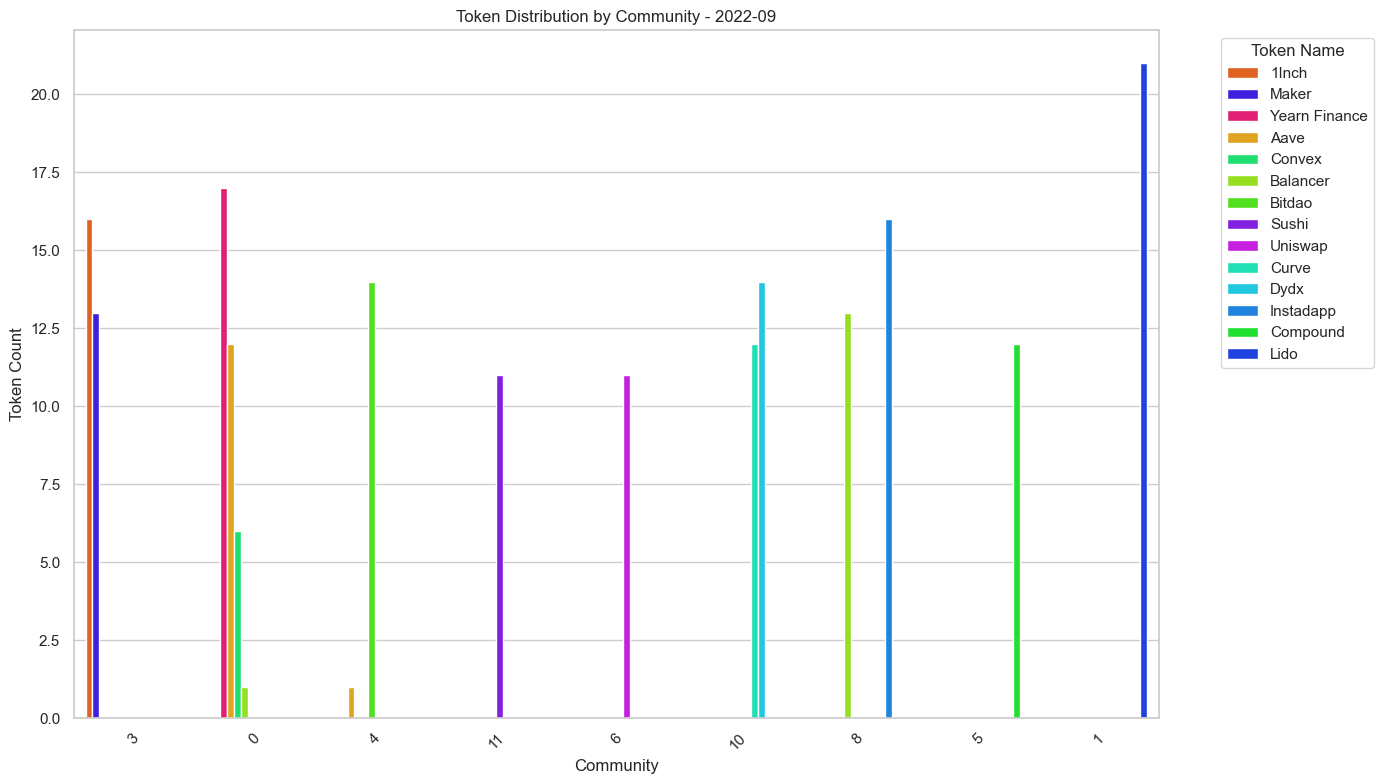

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


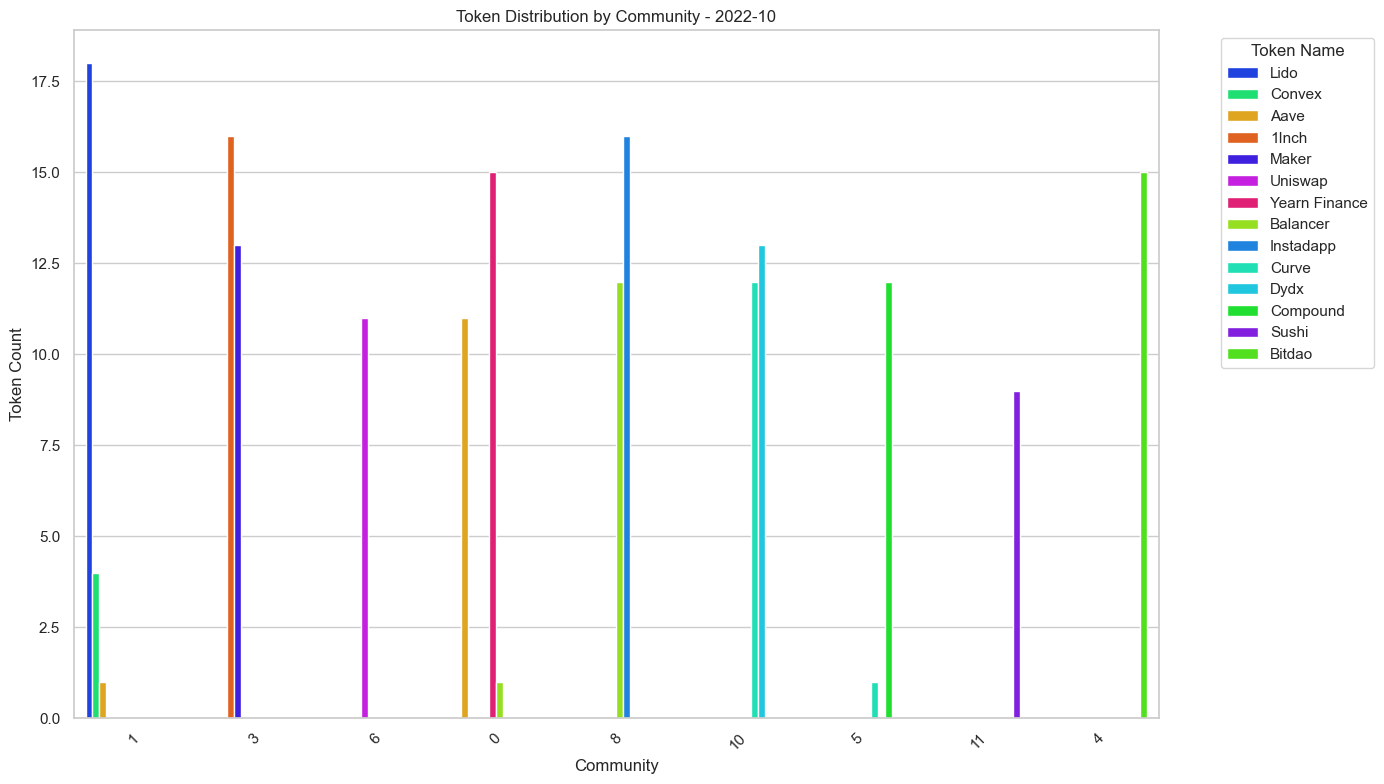

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1444891720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community'] = df['Community'].astype(str)


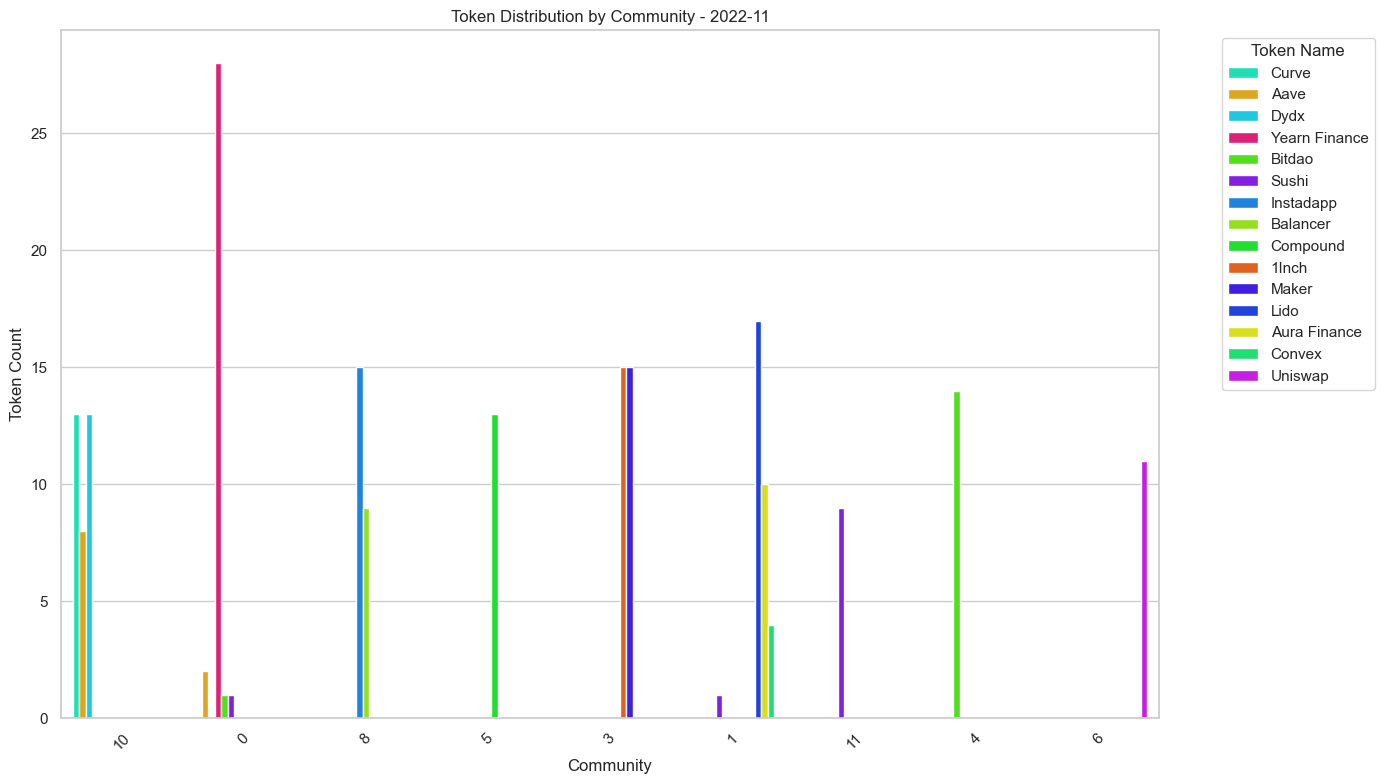

  Snapshot Date  Community     Token Name  Count
0       2021-06          2          Sushi      7
1       2021-06          2          Curve      1
2       2021-06          2  Yearn Finance     11
3       2021-06          1           Lido     18
4       2021-06          3          Maker     21


In [44]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_token_distribution = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_token_distribution[community][token_name] += 1
    return community_token_distribution

def plot_token_distribution_by_community(df, snapshot_date, color_map):
    """Plot the token distribution for a specific snapshot date with consistent colors."""
    # Set the plot style
    sns.set(style="whitegrid")

    # Convert 'Community' to string to avoid sorting issues
    df['Community'] = df['Community'].astype(str)

    # Create the plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=df, 
        x='Community', 
        y='Count', 
        hue='Token Name', 
        palette=color_map
    )

    plt.title(f'Token Distribution by Community - {snapshot_date}')
    plt.xlabel('Community')
    plt.ylabel('Token Count')
    plt.legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_distribution_stats = []
    prev_partition = None

    # To store all unique tokens found across all snapshots
    unique_tokens = set()

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Compute token distribution within communities using the enriched graph
            token_distribution = compute_token_distribution(partition, enriched_G, token_map)

            # Extract snapshot time from filename
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store the results in a structured format
            for community, tokens in token_distribution.items():
                for token_name, count in tokens.items():
                    token_distribution_stats.append({
                        'Snapshot Date': snapshot_date,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })
                    # Add the token to the set of unique tokens
                    unique_tokens.add(token_name)

            # Update the previous partition for the next iteration
            prev_partition = partition

    # Create a consistent color map based on unique tokens
    palette = sns.color_palette("hsv", len(unique_tokens))
    color_map = {token: palette[i] for i, token in enumerate(sorted(unique_tokens))}

    # Convert the results to a DataFrame for further analysis
    df = pd.DataFrame(token_distribution_stats)

    # Plot each snapshot using the consistent color map
    for snapshot_date in snapshot_dates.values():
        filtered_df = df[df['Snapshot Date'] == snapshot_date]
        if not filtered_df.empty:
            plot_token_distribution_by_community(filtered_df, snapshot_date, color_map)

    return df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Compute the temporal token distribution statistics with token labeling and plot each snapshot
temporal_token_distribution_stats_df = temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates)

# Optionally save the results to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution_stats.csv'
temporal_token_distribution_stats_df.to_csv(output_file, index=False)

# Display the first few rows of the token distribution statistics
print(temporal_token_distribution_stats_df.head())


In [45]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_token_distribution = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_token_distribution[community][token_name] += 1
    return community_token_distribution

def temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_distribution_stats = []
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Compute token distribution within communities using the enriched graph
            token_distribution = compute_token_distribution(partition, enriched_G, token_map)

            # Extract snapshot time from filename
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store the results in a structured format
            snapshot_data = []
            for community, tokens in token_distribution.items():
                for token_name, count in tokens.items():
                    snapshot_data.append({
                        'Snapshot Date': snapshot_date,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Convert the snapshot data to a DataFrame
            snapshot_df = pd.DataFrame(snapshot_data)

            # Define the output file name based on the snapshot date
            output_file = join(output_directory, f'token_distribution_{snapshot_date}.csv')

            # Save the snapshot DataFrame to a CSV file
            snapshot_df.to_csv(output_file, index=False)

            # Update the previous partition for the next iteration
            prev_partition = partition

    # Return the full DataFrame with all data combined (if needed)
    return pd.DataFrame(token_distribution_stats)

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/snapshot_files'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Compute the temporal token distribution statistics and save each snapshot to a separate CSV file
temporal_token_distribution_stats_df = temporal_token_distribution(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)

# Display a message indicating completion
print("Snapshot data files have been saved.")


Snapshot data files have been saved.


In [46]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_token_distribution = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_token_distribution[community][token_name] += 1
    return community_token_distribution

def calculate_modularity(G, partition):
    """Calculate the modularity of the partition."""
    # Convert partition dictionary to a list of lists for communities
    communities = defaultdict(list)
    for node, community in partition.items():
        communities[community].append(node)
    
    return nx.community.modularity(G, communities.values())

def temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_distribution_stats = []
    modularity_scores = {}
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Compute modularity score for the current partition
            modularity_score = calculate_modularity(G, partition)
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')
            modularity_scores[snapshot_date] = modularity_score

            print(f"Modularity for {snapshot_date}: {modularity_score}")

            # Compute token distribution within communities using the enriched graph
            token_distribution = compute_token_distribution(partition, enriched_G, token_map)

            # Store the results in a structured format
            snapshot_data = []
            for community, tokens in token_distribution.items():
                for token_name, count in tokens.items():
                    snapshot_data.append({
                        'Snapshot Date': snapshot_date,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Convert the snapshot data to a DataFrame
            snapshot_df = pd.DataFrame(snapshot_data)

            # Define the output file name based on the snapshot date
            output_file = join(output_directory, f'token_distribution_{snapshot_date}.csv')

            # Save the snapshot DataFrame to a CSV file
            snapshot_df.to_csv(output_file, index=False)

            # Update the previous partition for the next iteration
            prev_partition = partition

    # Return the full DataFrame with all data combined and modularity scores (if needed)
    return pd.DataFrame(token_distribution_stats), modularity_scores

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/snapshot_files'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Compute the temporal token distribution statistics and modularity scores
temporal_token_distribution_stats_df, modularity_scores = temporal_token_distribution(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)

# Optionally save the results to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution_stats.csv'
temporal_token_distribution_stats_df.to_csv(output_file, index=False)

# Save modularity scores to a CSV file
modularity_output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/modularity_scores.csv'
modularity_df = pd.DataFrame(list(modularity_scores.items()), columns=['Snapshot Date', 'Modularity'])
modularity_df.to_csv(modularity_output_file, index=False)

# Display a message indicating completion
print("Snapshot data files and modularity scores have been saved.")



Modularity for 2021-06: 0.7615959696750884
Modularity for 2021-07: 0.7504303441704657
Modularity for 2021-08: 0.7235383712705761
Modularity for 2021-09: 0.7361297553728056
Modularity for 2021-10: 0.7429866759240892
Modularity for 2021-11: 0.7412656230273955
Modularity for 2021-12: 0.7535779293043608
Modularity for 2022-01: 0.7580506622637158
Modularity for 2022-02: 0.7875447135608795
Modularity for 2022-03: 0.7336144827273183
Modularity for 2022-04: 0.7336625922200146
Modularity for 2022-05: 0.7092856566829567
Modularity for 2022-06: 0.7412813603847375
Modularity for 2022-07: 0.7546684934560899
Modularity for 2022-08: 0.7527724302555348
Modularity for 2022-09: 0.7678365599064062
Modularity for 2022-10: 0.7297351126833507
Modularity for 2022-11: 0.7063016868523861
Modularity for Unknown Date: 0.7345043985486521
Snapshot data files and modularity scores have been saved.


In [47]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_token_distribution = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_token_distribution[community][token_name] += 1
    return community_token_distribution

def calculate_modularity(G, partition):
    """Calculate the modularity of the partition."""
    # Convert partition dictionary to a list of lists for communities
    communities = defaultdict(list)
    for node, community in partition.items():
        communities[community].append(node)
    
    return nx.community.modularity(G, communities.values())

def temporal_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_distribution_stats = []
    modularity_scores_temporal = {}
    modularity_scores_non_temporal = {}
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Non-temporal modularity (community detection independent for each snapshot)
            modularity_score_non_temporal = calculate_modularity(G, partition)

            # Temporal modularity (matching communities across snapshots)
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)
            modularity_score_temporal = calculate_modularity(G, partition)

            # Extract snapshot time from filename
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store the modularity scores
            modularity_scores_non_temporal[snapshot_date] = modularity_score_non_temporal
            modularity_scores_temporal[snapshot_date] = modularity_score_temporal

            print(f"Snapshot Date: {snapshot_date}")
            print(f"Non-Temporal Modularity: {modularity_score_non_temporal}")
            print(f"Temporal Modularity: {modularity_score_temporal}")

            # Compute token distribution within communities using the enriched graph
            token_distribution = compute_token_distribution(partition, enriched_G, token_map)

            # Store the results in a structured format
            snapshot_data = []
            for community, tokens in token_distribution.items():
                for token_name, count in tokens.items():
                    snapshot_data.append({
                        'Snapshot Date': snapshot_date,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Convert the snapshot data to a DataFrame
            snapshot_df = pd.DataFrame(snapshot_data)

            # Define the output file name based on the snapshot date
            output_file = join(output_directory, f'token_distribution_{snapshot_date}.csv')

            # Save the snapshot DataFrame to a CSV file
            snapshot_df.to_csv(output_file, index=False)

            # Update the previous partition for the next iteration
            prev_partition = partition

    # Return the full DataFrame with all data combined and modularity scores
    return pd.DataFrame(token_distribution_stats), modularity_scores_temporal, modularity_scores_non_temporal

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/snapshot_files'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Compute the temporal token distribution statistics and modularity scores
temporal_token_distribution_stats_df, modularity_scores_temporal, modularity_scores_non_temporal = temporal_token_distribution(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)

# Optionally save the results to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/temporal_token_distribution_stats.csv'
temporal_token_distribution_stats_df.to_csv(output_file, index=False)

# Save modularity scores to a CSV file
modularity_output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/modularity_scores_comparison.csv'
modularity_comparison_df = pd.DataFrame({
    'Snapshot Date': snapshot_dates.values(),
    'Non-Temporal Modularity': [modularity_scores_non_temporal[date] for date in snapshot_dates.values()],
    'Temporal Modularity': [modularity_scores_temporal[date] for date in snapshot_dates.values()]
})
modularity_comparison_df.to_csv(modularity_output_file, index=False)

# Display a message indicating completion
print("Snapshot data files and modularity score comparisons have been saved.")


Snapshot Date: 2021-06
Non-Temporal Modularity: 0.7615959696750884
Temporal Modularity: 0.7615959696750884
Snapshot Date: 2021-07
Non-Temporal Modularity: 0.7504303441704657
Temporal Modularity: 0.7504303441704657
Snapshot Date: 2021-08
Non-Temporal Modularity: 0.7283609021347738
Temporal Modularity: 0.7235383712705761
Snapshot Date: 2021-09
Non-Temporal Modularity: 0.7397789623219382
Temporal Modularity: 0.7361297553728056
Snapshot Date: 2021-10
Non-Temporal Modularity: 0.7600343847120281
Temporal Modularity: 0.7274887588441448
Snapshot Date: 2021-11
Non-Temporal Modularity: 0.754210958212347
Temporal Modularity: 0.6893220552960485
Snapshot Date: 2021-12
Non-Temporal Modularity: 0.796289877898496
Temporal Modularity: 0.6955761782606509
Snapshot Date: 2022-01
Non-Temporal Modularity: 0.8361898894001384
Temporal Modularity: 0.807457902851801
Snapshot Date: 2022-02
Non-Temporal Modularity: 0.8398619671066639
Temporal Modularity: 0.8047970568450211
Snapshot Date: 2022-03
Non-Temporal Modu

In [48]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_community_sizes(partition):
    """Compute the size of each community."""
    community_sizes = defaultdict(int)
    for community in partition.values():
        community_sizes[community] += 1
    return community_sizes

def track_community_growth(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_growth = defaultdict(list)
    prev_partition = None
    prev_community_sizes = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Temporal community matching
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Calculate community sizes
            community_sizes = compute_community_sizes(partition)

            # Track growth compared to the previous snapshot
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            if prev_community_sizes is not None:
                for community, size in community_sizes.items():
                    growth = size - prev_community_sizes.get(community, 0)
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': growth
                    })
            else:
                for community, size in community_sizes.items():
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': size  # Initial growth is just the size since there is no previous data
                    })

            # Update the previous partition and sizes for the next iteration
            prev_partition = partition
            prev_community_sizes = community_sizes

    # Convert community growth data to a DataFrame for further analysis
    growth_data = []
    for community, growth_list in community_growth.items():
        for entry in growth_list:
            growth_data.append({
                'Community': community,
                **entry
            })

    growth_df = pd.DataFrame(growth_data)

    # Save the growth data to a CSV file
    growth_output_file = join(output_directory, 'community_growth_tracking.csv')
    growth_df.to_csv(growth_output_file, index=False)

    return growth_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/community_growth'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community growth and save the data
community_growth_df = track_community_growth(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)

# Display the first few rows of the community growth data
print(community_growth_df.head())


   Community Snapshot Date  Size  Growth
0          0       2021-06    19      19
1          0       2021-07    22       3
2          0       2021-08    22       0
3          0       2021-09    22       0
4          0       2021-11     5       5


In [49]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_community_sizes(partition):
    """Compute the size of each community."""
    community_sizes = defaultdict(int)
    for community in partition.values():
        community_sizes[community] += 1
    return community_sizes

def track_community_growth(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_growth = defaultdict(list)
    prev_partition = None
    prev_community_sizes = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Temporal community matching
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Calculate community sizes
            community_sizes = compute_community_sizes(partition)

            # Track growth compared to the previous snapshot
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            if prev_community_sizes is not None:
                for community, size in community_sizes.items():
                    growth = size - prev_community_sizes.get(community, 0)
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': growth
                    })
            else:
                for community, size in community_sizes.items():
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': size  # Initial growth is just the size since there is no previous data
                    })

            # Update the previous partition and sizes for the next iteration
            prev_partition = partition
            prev_community_sizes = community_sizes

    # Convert community growth data to a DataFrame for further analysis
    growth_data = []
    for community, growth_list in community_growth.items():
        for entry in growth_list:
            growth_data.append({
                'Community': community,
                **entry
            })

    growth_df = pd.DataFrame(growth_data)

    # Sort by community and snapshot date for better readability
    growth_df.sort_values(by=['Community', 'Snapshot Date'], inplace=True)

    # Format the output for better readability
    growth_df['Growth'] = growth_df['Growth'].map('{:+}'.format)  # Add a sign to the growth values
    growth_df['Size'] = growth_df['Size'].map('{:,}'.format)  # Add commas for better readability

    # Save the growth data to a CSV file
    growth_output_file = join(output_directory, 'community_growth_tracking.csv')
    growth_df.to_csv(growth_output_file, index=False)

    # Display the first few rows of the growth DataFrame to the user
    pd.set_option('display.max_columns', None)  # Ensure all columns are shown
    pd.set_option('display.float_format', '{:.0f}'.format)  # Avoid scientific notation in floats
    print(growth_df.head(20))  # Display the first 20 rows to give a good sense of the data

    return growth_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/community_growth'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community growth and save the data
community_growth_df = track_community_growth(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)

# Optionally save the DataFrame to CSV (already done within the function)


    Community Snapshot Date Size Growth
0           0       2021-06   19    +19
1           0       2021-07   22     +3
2           0       2021-08   22     +0
3           0       2021-09   22     +0
4           0       2021-11    5     +5
5           0       2021-12    5     +0
6           0       2022-01    4     -1
7           0       2022-02    4     +0
8           0       2022-03    4     +0
9           0       2022-04    4     +0
10          0       2022-05    5     +1
11          0       2022-06   29    +24
12          0       2022-07   32     +3
13          0       2022-08   35     +3
14          0       2022-09   36     +1
15          0       2022-10   27     -9
16          0       2022-11   32     +5
17          1       2021-06   18    +18
18          1       2021-07   18     +0
19          1       2021-08   18     +0


In [50]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_community_sizes(partition):
    """Compute the size of each community."""
    community_sizes = defaultdict(int)
    for community in partition.values():
        community_sizes[community] += 1
    return community_sizes

def track_community_growth(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_growth = defaultdict(list)
    prev_partition = None
    prev_community_sizes = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Temporal community matching
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Calculate community sizes
            community_sizes = compute_community_sizes(partition)

            # Track growth compared to the previous snapshot
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            if prev_community_sizes is not None:
                for community, size in community_sizes.items():
                    growth = size - prev_community_sizes.get(community, 0)
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': growth
                    })
            else:
                for community, size in community_sizes.items():
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': size  # Initial growth is just the size since there is no previous data
                    })

            # Update the previous partition and sizes for the next iteration
            prev_partition = partition
            prev_community_sizes = community_sizes

    # Convert community growth data to a DataFrame for further analysis
    growth_data = []
    for community, growth_list in community_growth.items():
        for entry in growth_list:
            growth_data.append({
                'Community': community,
                **entry
            })

    growth_df = pd.DataFrame(growth_data)

    # Sort by community and snapshot date for better readability
    growth_df.sort_values(by=['Community', 'Snapshot Date'], inplace=True)

    # Format the output for better readability
    growth_df['Growth'] = growth_df['Growth'].map('{:+}'.format)  # Add a sign to the growth values
    growth_df['Size'] = growth_df['Size'].map('{:,}'.format)  # Add commas for better readability

    # Save the growth data to a CSV file
    growth_output_file = join(output_directory, 'community_growth_tracking.csv')
    growth_df.to_csv(growth_output_file, index=False)

    # Display the first few rows of the growth DataFrame to the user
    pd.set_option('display.max_columns', None)  # Ensure all columns are shown
    pd.set_option('display.float_format', '{:.0f}'.format)  # Avoid scientific notation in floats
    print(growth_df.head(20))  # Display the first 20 rows to give a good sense of the data

    return growth_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community growth and save the data
community_growth_df = track_community_growth(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


    Community Snapshot Date Size Growth
0           0       2021-06   19    +19
1           0       2021-07   22     +3
2           0       2021-08   22     +0
3           0       2021-09   22     +0
4           0       2021-11    5     +5
5           0       2021-12    5     +0
6           0       2022-01    4     -1
7           0       2022-02    4     +0
8           0       2022-03    4     +0
9           0       2022-04    4     +0
10          0       2022-05    5     +1
11          0       2022-06   29    +24
12          0       2022-07   32     +3
13          0       2022-08   35     +3
14          0       2022-09   36     +1
15          0       2022-10   27     -9
16          0       2022-11   32     +5
17          1       2021-06   18    +18
18          1       2021-07   18     +0
19          1       2021-08   18     +0


In [51]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_community_sizes(partition):
    """Compute the size of each community."""
    community_sizes = defaultdict(int)
    for community in partition.values():
        community_sizes[community] += 1
    return community_sizes

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_tokens = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_tokens[community][token_name] += 1
    return community_tokens

def track_community_growth_and_token_changes(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_growth = defaultdict(list)
    token_changes = defaultdict(list)
    prev_partition = None
    prev_community_sizes = None
    prev_community_tokens = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Temporal community matching
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Calculate community sizes and token distribution
            community_sizes = compute_community_sizes(partition)
            community_tokens = compute_token_distribution(partition, enriched_G, token_map)

            # Track growth and token changes compared to the previous snapshot
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            if prev_community_sizes is not None and prev_community_tokens is not None:
                for community, size in community_sizes.items():
                    # Track growth
                    growth = size - prev_community_sizes.get(community, 0)
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': growth
                    })

                    # Track token changes
                    previous_tokens = prev_community_tokens.get(community, {})
                    current_tokens = community_tokens.get(community, {})
                    
                    tokens_joined = set(current_tokens.keys()) - set(previous_tokens.keys())
                    tokens_left = set(previous_tokens.keys()) - set(current_tokens.keys())

                    token_changes[community].append({
                        'Snapshot Date': snapshot_date,
                        'Tokens Joined': ', '.join(tokens_joined) if tokens_joined else 'None',
                        'Tokens Left': ', '.join(tokens_left) if tokens_left else 'None'
                    })

            else:
                for community, size in community_sizes.items():
                    # Initial data when there is no previous snapshot
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': size  # Initial growth is just the size since there is no previous data
                    })
                    token_changes[community].append({
                        'Snapshot Date': snapshot_date,
                        'Tokens Joined': ', '.join(community_tokens[community].keys()),
                        'Tokens Left': 'None'
                    })

            # Update the previous partition, sizes, and tokens for the next iteration
            prev_partition = partition
            prev_community_sizes = community_sizes
            prev_community_tokens = community_tokens

    # Convert community growth data to a DataFrame for further analysis
    growth_data = []
    token_change_data = []
    
    # Ensure all dates are listed, even if no changes
    for snapshot_date in snapshot_dates.values():
        for community in community_growth.keys():
            if not any(entry['Snapshot Date'] == snapshot_date for entry in community_growth[community]):
                community_growth[community].append({
                    'Snapshot Date': snapshot_date,
                    'Size': prev_community_sizes.get(community, 0),
                    'Growth': 0  # No change
                })
                token_changes[community].append({
                    'Snapshot Date': snapshot_date,
                    'Tokens Joined': 'None',
                    'Tokens Left': 'None'
                })

    for community, growth_list in community_growth.items():
        for entry in growth_list:
            growth_data.append({
                'Community': community,
                **entry
            })
    for community, token_list in token_changes.items():
        for entry in token_list:
            token_change_data.append({
                'Community': community,
                **entry
            })

    growth_df = pd.DataFrame(growth_data)
    token_changes_df = pd.DataFrame(token_change_data)

    # Sort by community and snapshot date for better readability
    growth_df.sort_values(by=['Community', 'Snapshot Date'], inplace=True)
    token_changes_df.sort_values(by=['Community', 'Snapshot Date'], inplace=True)

    # Format the output for better readability
    growth_df['Growth'] = growth_df['Growth'].map('{:+}'.format)  # Add a sign to the growth values
    growth_df['Size'] = growth_df['Size'].map('{:,}'.format)  # Add commas for better readability

    # Save the growth data and token changes to CSV files
    growth_output_file = join(output_directory, 'community_growth_tracking.csv')
    token_changes_output_file = join(output_directory, 'community_token_changes.csv')
    growth_df.to_csv(growth_output_file, index=False)
    token_changes_df.to_csv(token_changes_output_file, index=False)

    # Display the first few rows of the growth and token change DataFrames to the user
    pd.set_option('display.max_columns', None)  # Ensure all columns are shown
    pd.set_option('display.float_format', '{:.0f}'.format)  # Avoid scientific notation in floats
    print("Community Growth Data:")
    print(growth_df.head(20))  # Display the first 20 rows of growth data
    print("\nCommunity Token Changes:")
    print(token_changes_df.head(20))  # Display the first 20 rows of token change data

    return growth_df, token_changes_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community growth and token changes, and save the data
community_growth_df, community_token_changes_df = track_community_growth_and_token_changes(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


Community Growth Data:
    Community Snapshot Date Size Growth
0           0       2021-06   19    +19
1           0       2021-07   22     +3
2           0       2021-08   22     +0
3           0       2021-09   22     +0
17          0       2021-10    0     +0
4           0       2021-11    5     +5
5           0       2021-12    5     +0
6           0       2022-01    4     -1
7           0       2022-02    4     +0
8           0       2022-03    4     +0
9           0       2022-04    4     +0
10          0       2022-05    5     +1
11          0       2022-06   29    +24
12          0       2022-07   32     +3
13          0       2022-08   35     +3
14          0       2022-09   36     +1
15          0       2022-10   27     -9
16          0       2022-11   32     +5
18          1       2021-06   18    +18
19          1       2021-07   18     +0

Community Token Changes:
    Community Snapshot Date                         Tokens Joined  \
0           0       2021-06           Sush

In [52]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_community_sizes(partition):
    """Compute the size of each community."""
    community_sizes = defaultdict(int)
    for community in partition.values():
        community_sizes[community] += 1
    return community_sizes

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_tokens = defaultdict(lambda: defaultdict(int))
    token_communities = defaultdict(dict)
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_tokens[community][token_name] += 1
            token_communities[token_name][community] = token_communities[token_name].get(community, 0) + 1
    return community_tokens, token_communities

def track_community_growth_and_token_changes(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_growth = defaultdict(list)
    token_changes = defaultdict(list)
    prev_partition = None
    prev_community_sizes = None
    prev_token_communities = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Temporal community matching
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Calculate community sizes and token distribution
            community_sizes = compute_community_sizes(partition)
            community_tokens, token_communities = compute_token_distribution(partition, enriched_G, token_map)

            # Track growth and token changes compared to the previous snapshot
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            if prev_community_sizes is not None and prev_token_communities is not None:
                for community, size in community_sizes.items():
                    # Track growth
                    growth = size - prev_community_sizes.get(community, 0)
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': growth
                    })

                for token, current_communities in token_communities.items():
                    previous_communities = prev_token_communities.get(token, {})

                    communities_joined = set(current_communities.keys()) - set(previous_communities.keys())
                    communities_left = set(previous_communities.keys()) - set(current_communities.keys())

                    token_changes[token].append({
                        'Snapshot Date': snapshot_date,
                        'Communities Joined': ', '.join(map(str, communities_joined)) if communities_joined else 'None',
                        'Communities Left': ', '.join(map(str, communities_left)) if communities_left else 'None',
                        'Number Joined': len(communities_joined),
                        'Number Left': len(communities_left)
                    })

            else:
                for community, size in community_sizes.items():
                    # Initial data when there is no previous snapshot
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': size  # Initial growth is just the size since there is no previous data
                    })

                for token, current_communities in token_communities.items():
                    token_changes[token].append({
                        'Snapshot Date': snapshot_date,
                        'Communities Joined': ', '.join(map(str, current_communities.keys())),
                        'Communities Left': 'None',
                        'Number Joined': len(current_communities),
                        'Number Left': 0
                    })

            # Update the previous partition, sizes, and token communities for the next iteration
            prev_partition = partition
            prev_community_sizes = community_sizes
            prev_token_communities = token_communities

    # Convert community growth data to a DataFrame for further analysis
    growth_data = []
    token_change_data = []

    # Ensure all dates are listed, even if no changes
    for snapshot_date in snapshot_dates.values():
        for community in community_growth.keys():
            if not any(entry['Snapshot Date'] == snapshot_date for entry in community_growth[community]):
                community_growth[community].append({
                    'Snapshot Date': snapshot_date,
                    'Size': prev_community_sizes.get(community, 0),
                    'Growth': 0  # No change
                })

        for token in token_changes.keys():
            if not any(entry['Snapshot Date'] == snapshot_date for entry in token_changes[token]):
                token_changes[token].append({
                    'Snapshot Date': snapshot_date,
                    'Communities Joined': 'None',
                    'Communities Left': 'None',
                    'Number Joined': 0,
                    'Number Left': 0
                })

    for community, growth_list in community_growth.items():
        for entry in growth_list:
            growth_data.append({
                'Community': community,
                **entry
            })

    for token, change_list in token_changes.items():
        for entry in change_list:
            token_change_data.append({
                'Token Name': token,
                **entry
            })

    growth_df = pd.DataFrame(growth_data)
    token_changes_df = pd.DataFrame(token_change_data)

    # Sort by community/token and snapshot date for better readability
    growth_df.sort_values(by=['Community', 'Snapshot Date'], inplace=True)
    token_changes_df.sort_values(by=['Token Name', 'Snapshot Date'], inplace=True)

    # Format the output for better readability
    growth_df['Growth'] = growth_df['Growth'].map('{:+}'.format)  # Add a sign to the growth values
    growth_df['Size'] = growth_df['Size'].map('{:,}'.format)  # Add commas for better readability

    # Save the growth data and token changes to CSV files
    growth_output_file = join(output_directory, 'community_growth_tracking.csv')
    token_changes_output_file = join(output_directory, 'community_token_changes.csv')
    growth_df.to_csv(growth_output_file, index=False)
    token_changes_df.to_csv(token_changes_output_file, index=False)

    # Display the first few rows of the growth and token change DataFrames to the user
    pd.set_option('display.max_columns', None)  # Ensure all columns are shown
    pd.set_option('display.float_format', '{:.0f}'.format)  # Avoid scientific notation in floats
    print("Community Growth Data:")
    print(growth_df.head(20))  # Display the first 20 rows of growth data
    print("\nCommunity Token Changes:")
    print(token_changes_df.head(20))  # Display the first 20 rows of token change data

    return growth_df, token_changes_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community growth and token changes, and save the data
community_growth_df, community_token_changes_df = track_community_growth_and_token_changes(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


Community Growth Data:
     Community Snapshot Date Size Growth
149          0       2021-06    3     +3
163          0       2021-07    0     +0
164          0       2021-08    0     +0
165          0       2021-09    0     +0
166          0       2021-10    0     +0
150          0       2021-11    5     +5
151          0       2021-12    5     +0
152          0       2022-01    4     -1
153          0       2022-02    4     +0
154          0       2022-03    4     +0
155          0       2022-04    4     +0
156          0       2022-05    5     +1
157          0       2022-06   29    +24
158          0       2022-07   32     +3
159          0       2022-08   35     +3
160          0       2022-09   36     +1
161          0       2022-10   27     -9
162          0       2022-11   32     +5
18           1       2021-06   18    +18
19           1       2021-07   18     +0

Community Token Changes:
    Token Name Snapshot Date Communities Joined Communities Left  \
162      1Inch       2

In [53]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_community_sizes(partition):
    """Compute the size of each community."""
    community_sizes = defaultdict(int)
    for community in partition.values():
        community_sizes[community] += 1
    return community_sizes

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_tokens = defaultdict(lambda: defaultdict(int))
    token_communities = defaultdict(dict)
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_tokens[community][token_name] += 1
            token_communities[token_name][community] = token_communities[token_name].get(community, 0) + 1
    return community_tokens, token_communities

def track_community_growth_and_token_changes(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_growth = defaultdict(list)
    token_changes = defaultdict(list)
    community_change_metrics = defaultdict(lambda: {'Tokens Joined': 0, 'Tokens Left': 0})
    prev_partition = None
    prev_community_sizes = None
    prev_token_communities = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Temporal community matching
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Calculate community sizes and token distribution
            community_sizes = compute_community_sizes(partition)
            community_tokens, token_communities = compute_token_distribution(partition, enriched_G, token_map)

            # Track growth and token changes compared to the previous snapshot
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            if prev_community_sizes is not None and prev_token_communities is not None:
                for community, size in community_sizes.items():
                    # Track growth
                    growth = size - prev_community_sizes.get(community, 0)
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': growth
                    })

                for token, current_communities in token_communities.items():
                    previous_communities = prev_token_communities.get(token, {})

                    communities_joined = set(current_communities.keys()) - set(previous_communities.keys())
                    communities_left = set(previous_communities.keys()) - set(current_communities.keys())

                    # Update change metrics for the communities
                    for community in communities_joined:
                        community_change_metrics[community]['Tokens Joined'] += 1
                    for community in communities_left:
                        community_change_metrics[community]['Tokens Left'] += 1

                    token_changes[token].append({
                        'Snapshot Date': snapshot_date,
                        'Communities Joined': ', '.join(map(str, communities_joined)) if communities_joined else 'None',
                        'Communities Left': ', '.join(map(str, communities_left)) if communities_left else 'None',
                        'Number Joined': len(communities_joined),
                        'Number Left': len(communities_left)
                    })

            else:
                for community, size in community_sizes.items():
                    # Initial data when there is no previous snapshot
                    community_growth[community].append({
                        'Snapshot Date': snapshot_date,
                        'Size': size,
                        'Growth': size  # Initial growth is just the size since there is no previous data
                    })

                for token, current_communities in token_communities.items():
                    token_changes[token].append({
                        'Snapshot Date': snapshot_date,
                        'Communities Joined': ', '.join(map(str, current_communities.keys())),
                        'Communities Left': 'None',
                        'Number Joined': len(current_communities),
                        'Number Left': 0
                    })

            # Update the previous partition, sizes, and token communities for the next iteration
            prev_partition = partition
            prev_community_sizes = community_sizes
            prev_token_communities = token_communities

    # Calculate the total changes (sum of joined and left) for each community
    community_change_summary = []
    for community, changes in community_change_metrics.items():
        total_changes = changes['Tokens Joined'] + changes['Tokens Left']
        community_change_summary.append({
            'Community': community,
            'Tokens Joined': changes['Tokens Joined'],
            'Tokens Left': changes['Tokens Left'],
            'Total Changes': total_changes
        })

    change_summary_df = pd.DataFrame(community_change_summary)
    change_summary_df.sort_values(by='Total Changes', ascending=False, inplace=True)

    # Display communities with the most and least changes
    most_changes = change_summary_df.head(10)
    least_changes = change_summary_df.tail(10)

    print("Top 10 Communities with Most Changes:")
    print(most_changes)
    print("\nTop 10 Communities with Least Changes:")
    print(least_changes)

    # Save the community change summary to a CSV file
    change_summary_output_file = join(output_directory, 'community_change_summary.csv')
    change_summary_df.to_csv(change_summary_output_file, index=False)

    return change_summary_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community growth and token changes, and analyze community dynamics
community_change_summary_df = track_community_growth_and_token_changes(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


Top 10 Communities with Most Changes:
    Community  Tokens Joined  Tokens Left  Total Changes
3           0             10            7             17
6           5              8            5             13
0           6              6            6             12
2           4              6            6             12
1           7              5            6             11
5           3              6            4             10
7           8              3            3              6
8           9              5            1              6
4           2              1            4              5
10          1              4            1              5

Top 10 Communities with Least Changes:
    Community  Tokens Joined  Tokens Left  Total Changes
6           5              8            5             13
0           6              6            6             12
2           4              6            6             12
1           7              5            6             11
5         

In [54]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Compute the token distribution within each community."""
    community_tokens = defaultdict(lambda: defaultdict(int))
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            community_tokens[community][token_name] += 1
    return community_tokens

def track_community_token_distribution(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Temporal community matching
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Calculate token distribution within communities
            community_tokens = compute_token_distribution(partition, enriched_G, token_map)

            # Extract snapshot time from filename
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Prepare data for CSV output
            snapshot_data = []
            for community, tokens in community_tokens.items():
                for token_name, count in tokens.items():
                    snapshot_data.append({
                        'Snapshot Date': snapshot_date,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Convert the snapshot data to a DataFrame
            snapshot_df = pd.DataFrame(snapshot_data)

            # Define the output file name based on the snapshot date
            output_file = join(output_directory, f'token_distribution_{snapshot_date}.csv')

            # Save the snapshot DataFrame to a CSV file
            snapshot_df.to_csv(output_file, index=False)

            # Update the previous partition for the next iteration
            prev_partition = partition

            print(f"Saved CSV for snapshot: {snapshot_date}")

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community token distribution and save each snapshot to a CSV file
track_community_token_distribution(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


Saved CSV for snapshot: 2021-06
Saved CSV for snapshot: 2021-07
Saved CSV for snapshot: 2021-08
Saved CSV for snapshot: 2021-09
Saved CSV for snapshot: 2021-10
Saved CSV for snapshot: 2021-11
Saved CSV for snapshot: 2021-12
Saved CSV for snapshot: 2022-01
Saved CSV for snapshot: 2022-02
Saved CSV for snapshot: 2022-03
Saved CSV for snapshot: 2022-04
Saved CSV for snapshot: 2022-05
Saved CSV for snapshot: 2022-06
Saved CSV for snapshot: 2022-07
Saved CSV for snapshot: 2022-08
Saved CSV for snapshot: 2022-09
Saved CSV for snapshot: 2022-10
Saved CSV for snapshot: 2022-11
Saved CSV for snapshot: Unknown Date


In [55]:
import networkx as nx
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory directly to the local folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Print the loaded graphs for verification
print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

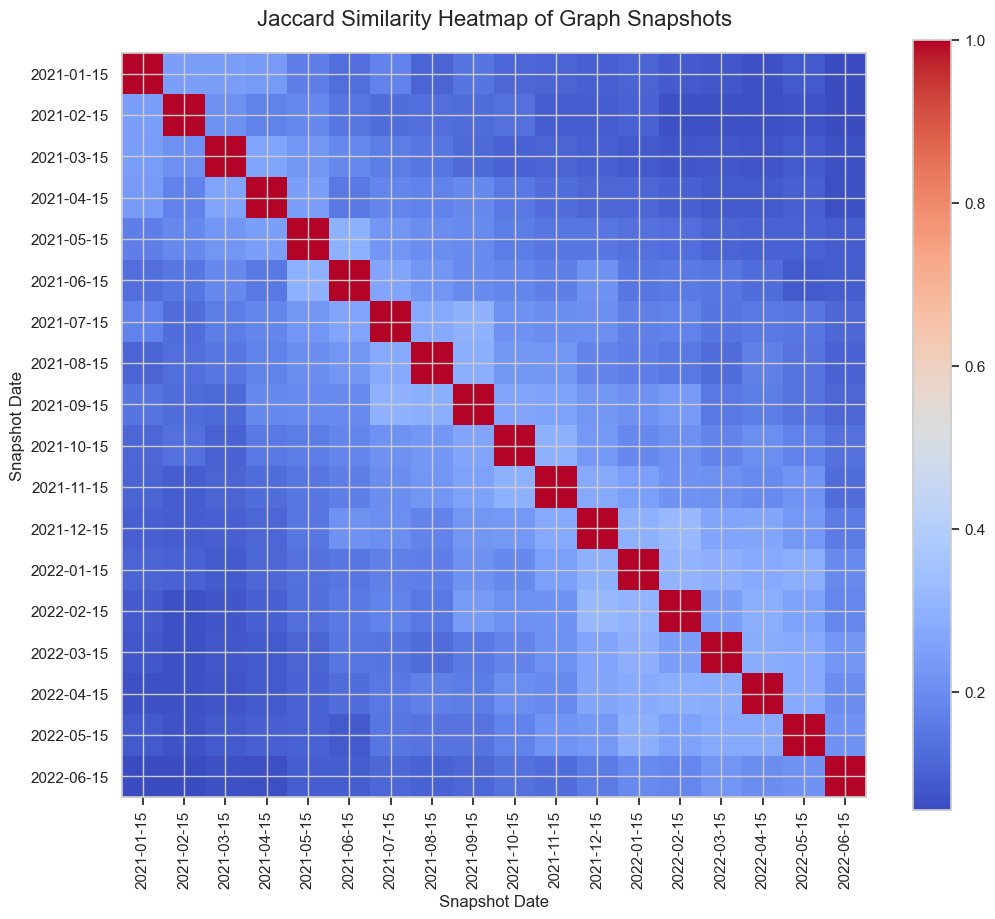

In [56]:
similarity_matrix, snapshot_list = calculate_similarity_matrix(graphs)

plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory='../output/wallet_network_projections/')

# DYNAMIC


In [58]:
# Check the column names to see what is available
print(all_data.columns)


NameError: name 'all_data' is not defined

In [59]:
import matplotlib.pyplot as plt

# Group the data by Snapshot Date and Community to calculate the total size of each community
community_growth = all_data.groupby(['Snapshot Date', 'Community'])['Size'].sum().unstack().fillna(0)

# Plot the community growth over time
plt.figure(figsize=(14, 8))
for community in community_growth.columns:
    plt.plot(community_growth.index, community_growth[community], label=f'Community {community}')

plt.title('Community Growth Over Time')
plt.xlabel('Snapshot Date')
plt.ylabel('Community Size')
plt.xticks(rotation=45)
plt.legend(title='Community', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


NameError: name 'all_data' is not defined

# Investigating Nodes 

In [60]:
import os
import networkx as nx
import pandas as pd
from os.path import join

def calculate_betweenness_and_community(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    top_betweenness_nodes = []

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 10 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:10]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Collect data for the top 10 nodes
            for node, centrality in top_nodes:
                community = partition[node]
                token_address = enriched_G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                
                top_betweenness_nodes.append({
                    'Snapshot Date': snapshot_date,
                    'Node': node,
                    'Betweenness Centrality': centrality,
                    'Community': community,
                    'Token Name': token_name
                })

    # Convert the results to a DataFrame
    top_betweenness_df = pd.DataFrame(top_betweenness_nodes)

    # Save the DataFrame to a CSV file
    output_file = join(output_directory, 'top_betweenness_nodes.csv')
    top_betweenness_df.to_csv(output_file, index=False)

    print("Top betweenness nodes saved to CSV.")
    return top_betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Calculate betweenness centrality, identify top nodes, and save the results
top_betweenness_df = calculate_betweenness_and_community(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


Top betweenness nodes saved to CSV.


In [61]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

def generate_network_graphs_with_high_betweenness(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 10 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:10]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Draw the graph without node labels
            plt.figure(figsize=(12, 12))
            pos = nx.spring_layout(G, seed=42)  # Positioning the nodes with a fixed layout for consistency

            # Draw edges
            nx.draw_networkx_edges(G, pos, alpha=0.5)

            # Draw all nodes in light blue
            nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue')

            # Highlight top 10 nodes with high betweenness centrality in red
            nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in top_nodes],
                                   node_size=300, node_color='red', label='High Betweenness Nodes')

            # Add title and save the plot without node labels
            plt.title(f'Network Graph - {snapshot_date}')
            output_image_path = join(output_directory, f'network_graph_{snapshot_date}.png')
            plt.savefig(output_image_path)
            plt.close()

            print(f"Saved network graph for snapshot: {snapshot_date}")

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/Graphs'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Generate network graphs with highlighted high betweenness nodes
generate_network_graphs_with_high_betweenness(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


Saved network graph for snapshot: 2021-06
Saved network graph for snapshot: 2021-07
Saved network graph for snapshot: 2021-08
Saved network graph for snapshot: 2021-09
Saved network graph for snapshot: 2021-10
Saved network graph for snapshot: 2021-11
Saved network graph for snapshot: 2021-12
Saved network graph for snapshot: 2022-01
Saved network graph for snapshot: 2022-02
Saved network graph for snapshot: 2022-03
Saved network graph for snapshot: 2022-04
Saved network graph for snapshot: 2022-05
Saved network graph for snapshot: 2022-06
Saved network graph for snapshot: 2022-07
Saved network graph for snapshot: 2022-08
Saved network graph for snapshot: 2022-09
Saved network graph for snapshot: 2022-10
Saved network graph for snapshot: 2022-11
Saved network graph for snapshot: Unknown Date


In [62]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

def generate_network_graphs_with_high_betweenness(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 10 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:10]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Draw the graph without node labels
            plt.figure(figsize=(12, 12))
            pos = nx.spring_layout(G, seed=42)  # Positioning the nodes with a fixed layout for consistency

            # Draw edges
            nx.draw_networkx_edges(G, pos, alpha=0.5)

            # Draw all nodes in light blue
            nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue')

            # Highlight top 10 nodes with high betweenness centrality in red with smaller node size
            nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in top_nodes],
                                   node_size=150, node_color='red', label='High Betweenness Nodes')

            # Add title and save the plot without node labels
            plt.title(f'Network Graph - {snapshot_date}')
            output_image_path = join(output_directory, f'network_graph_{snapshot_date}.png')
            plt.savefig(output_image_path)
            plt.close()

            print(f"Saved network graph for snapshot: {snapshot_date}")

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/Graphs'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Generate network graphs with highlighted high betweenness nodes
generate_network_graphs_with_high_betweenness(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


Saved network graph for snapshot: 2021-06
Saved network graph for snapshot: 2021-07
Saved network graph for snapshot: 2021-08
Saved network graph for snapshot: 2021-09
Saved network graph for snapshot: 2021-10
Saved network graph for snapshot: 2021-11
Saved network graph for snapshot: 2021-12
Saved network graph for snapshot: 2022-01
Saved network graph for snapshot: 2022-02
Saved network graph for snapshot: 2022-03
Saved network graph for snapshot: 2022-04
Saved network graph for snapshot: 2022-05
Saved network graph for snapshot: 2022-06
Saved network graph for snapshot: 2022-07
Saved network graph for snapshot: 2022-08
Saved network graph for snapshot: 2022-09
Saved network graph for snapshot: 2022-10
Saved network graph for snapshot: 2022-11
Saved network graph for snapshot: Unknown Date


In [63]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from matplotlib import cm

def generate_network_graphs_with_high_betweenness(graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 10 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:10]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Assign a color to each community
            unique_communities = set(partition.values())
            color_map = cm.get_cmap('tab10', len(unique_communities))
            community_colors = {community: color_map(i) for i, community in enumerate(unique_communities)}

            # Draw the graph without node labels
            plt.figure(figsize=(12, 12))
            pos = nx.spring_layout(G, seed=42)  # Positioning the nodes with a fixed layout for consistency

            # Draw edges
            nx.draw_networkx_edges(G, pos, alpha=0.5)

            # Draw all nodes in light blue
            nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue')

            # Highlight top 10 nodes with high betweenness centrality, colored by community
            for node, _ in top_nodes:
                community = partition[node]
                nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=150, 
                                       node_color=[community_colors[community]])

            # Create a legend for the communities
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=community_colors[community], markersize=10) 
                       for community in unique_communities]
            labels = [f'Community {community}' for community in unique_communities]
            plt.legend(handles, labels, title='Communities', bbox_to_anchor=(1.05, 1), loc='upper left')

            # Add title and save the plot without node labels
            plt.title(f'Network Graph - {snapshot_date}')
            output_image_path = join(output_directory, f'network_graph_{snapshot_date}.png')
            plt.savefig(output_image_path, bbox_inches='tight')
            plt.close()

            print(f"Saved network graph for snapshot: {snapshot_date}")

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/Graphs'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Generate network graphs with highlighted high betweenness nodes colored by community
generate_network_graphs_with_high_betweenness(
    graph_directory, enriched_graph_directory, token_info_path, snapshot_dates, output_directory
)


/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/3673739500.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(unique_communities))


Saved network graph for snapshot: 2021-06
Saved network graph for snapshot: 2021-07
Saved network graph for snapshot: 2021-08
Saved network graph for snapshot: 2021-09
Saved network graph for snapshot: 2021-10
Saved network graph for snapshot: 2021-11
Saved network graph for snapshot: 2021-12
Saved network graph for snapshot: 2022-01
Saved network graph for snapshot: 2022-02
Saved network graph for snapshot: 2022-03
Saved network graph for snapshot: 2022-04
Saved network graph for snapshot: 2022-05
Saved network graph for snapshot: 2022-06
Saved network graph for snapshot: 2022-07
Saved network graph for snapshot: 2022-08
Saved network graph for snapshot: 2022-09
Saved network graph for snapshot: 2022-10
Saved network graph for snapshot: 2022-11
Saved network graph for snapshot: Unknown Date


# Graph of highest betweeness nodes over time

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1932996398.py:79: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


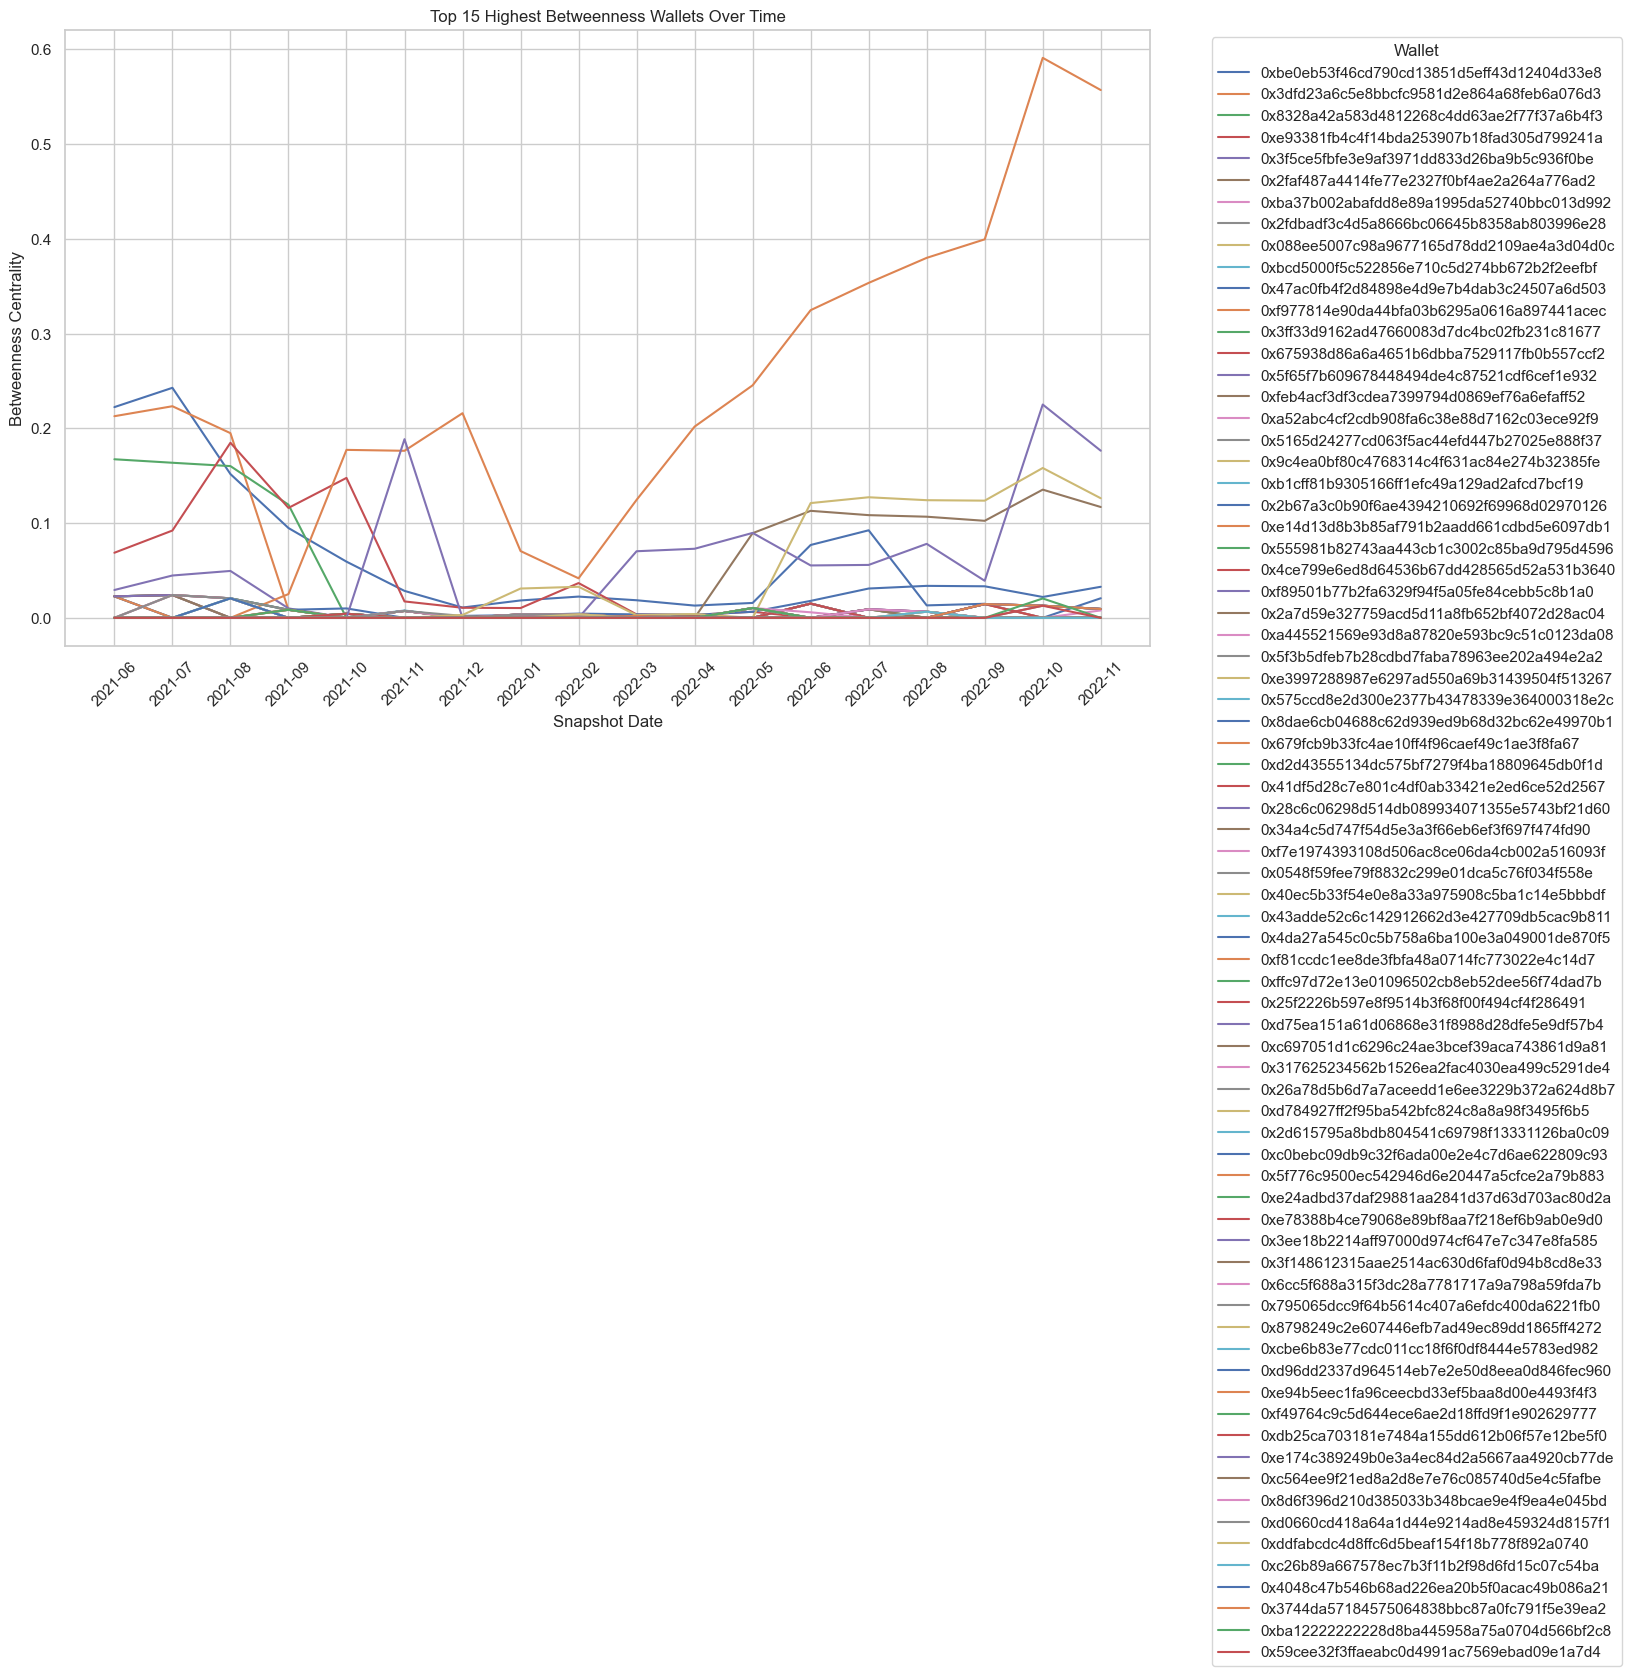

In [65]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates):
    # Dictionary to store betweenness centrality over time for top wallets
    betweenness_over_time = {}

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Load the normal graph
            G = nx.read_graphml(normal_graph_file)

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 15 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:15]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store betweenness for top nodes
            for node, centrality in top_nodes:
                if node not in betweenness_over_time:
                    betweenness_over_time[node] = {}
                betweenness_over_time[node][snapshot_date] = centrality

    # Convert the data to a DataFrame for plotting
    betweenness_df = pd.DataFrame(betweenness_over_time).fillna(0).sort_index()

    return betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track betweenness over time for the top 15 wallets
betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates)

# Plot the betweenness centrality over time for the top 15 wallets
plt.figure(figsize=(14, 8))
for wallet in betweenness_df.columns:
    plt.plot(betweenness_df.index, betweenness_df[wallet], label=wallet)

plt.title('Top 15 Highest Betweenness Wallets Over Time')
plt.xlabel('Snapshot Date')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=45)
plt.legend(title='Wallet', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Doing the same but for the largest connected component

/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_9700/1874116001.py:84: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


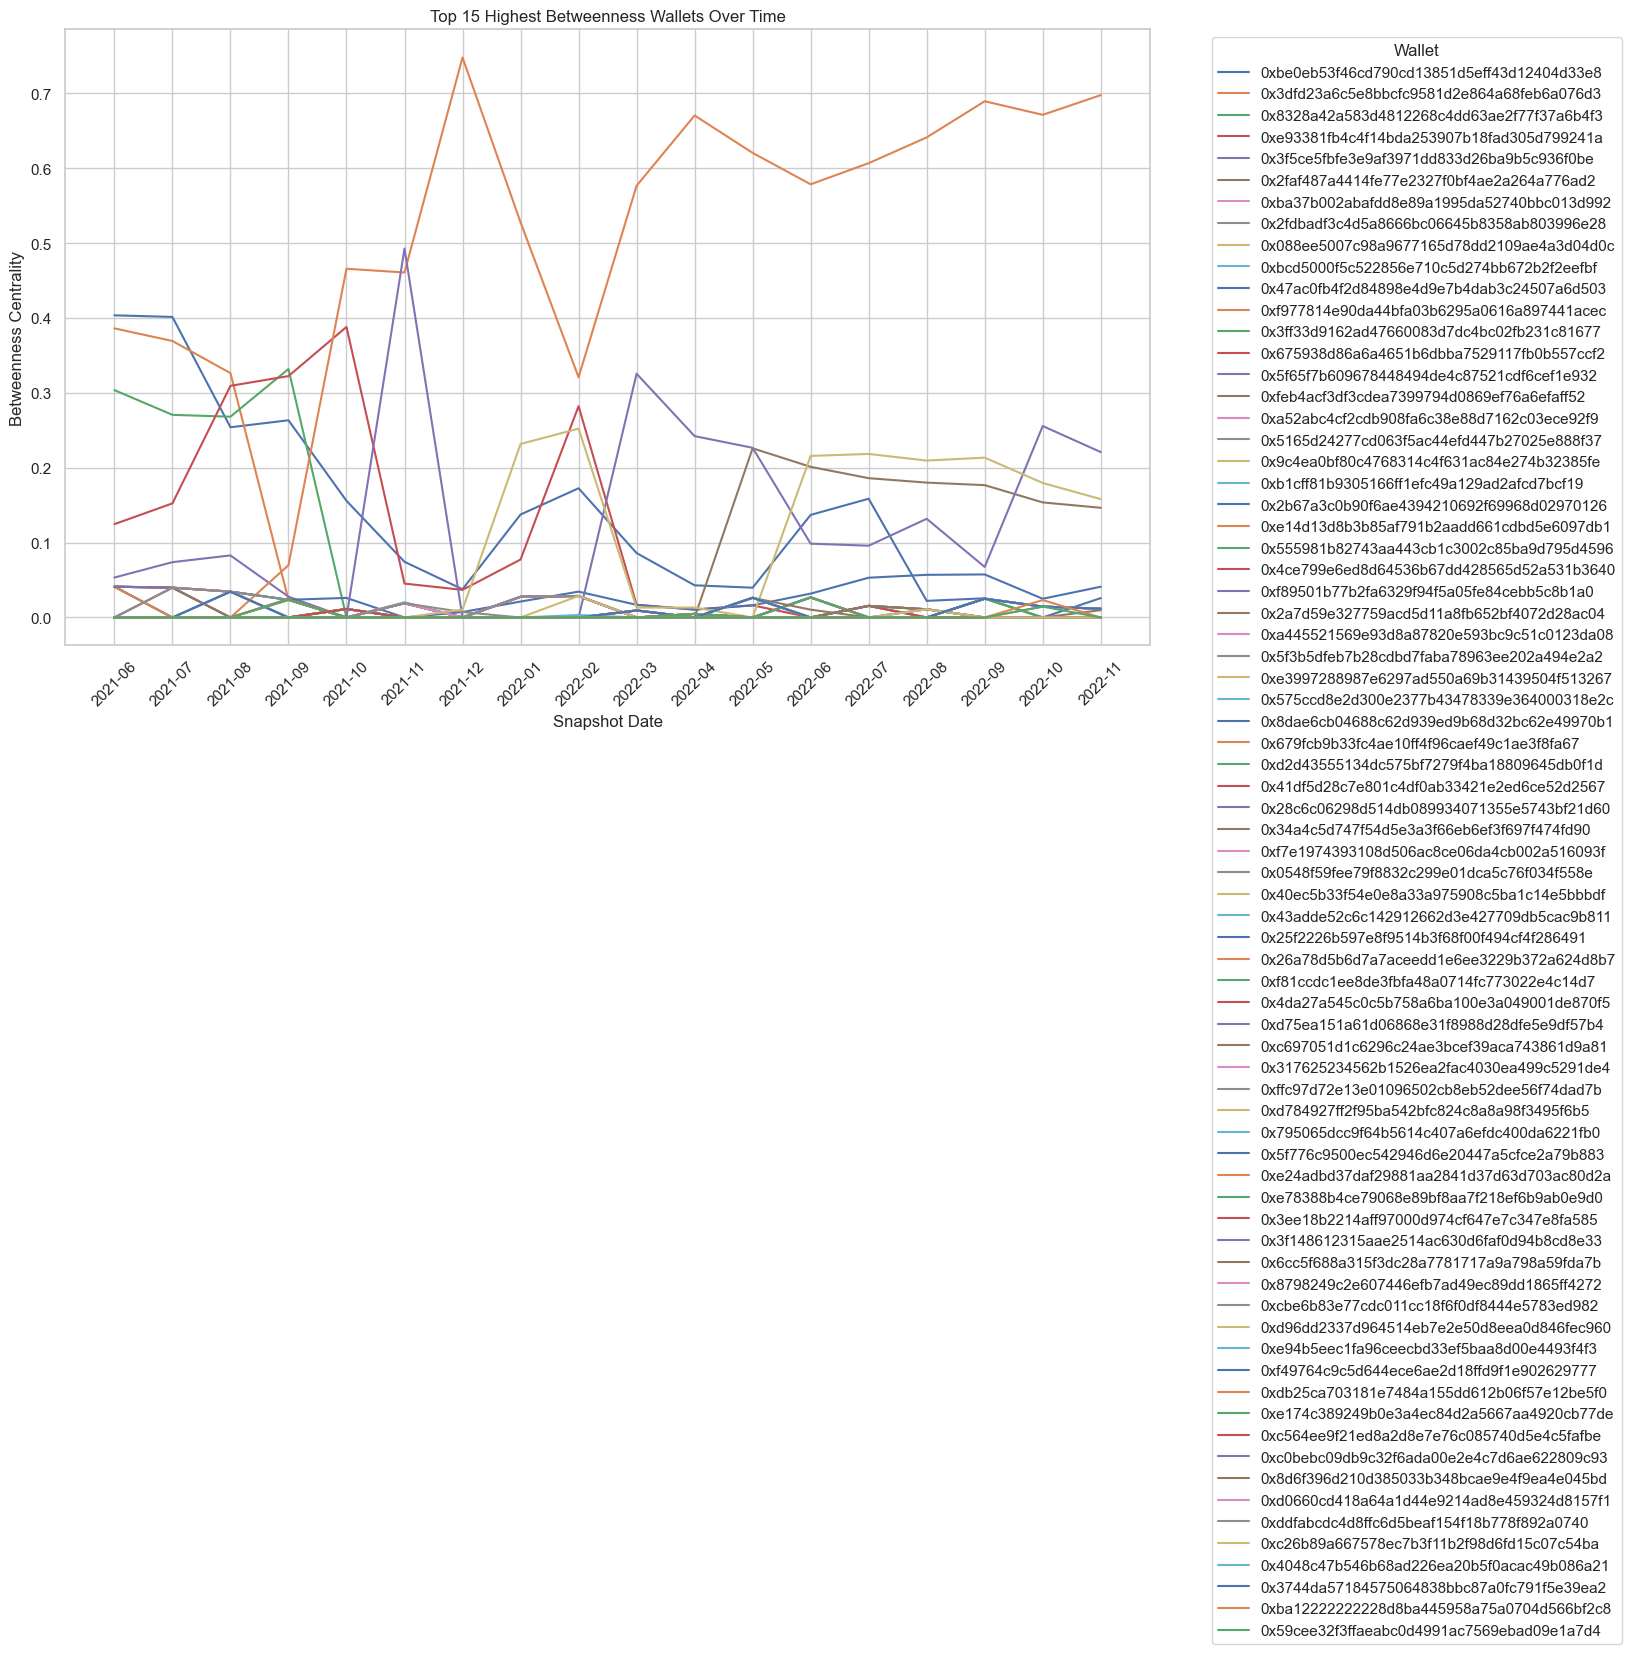

In [74]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates):
    # Dictionary to store betweenness centrality over time for top wallets
    betweenness_over_time = {}

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Load the normal graph
            G = nx.read_graphml(normal_graph_file)

            # Extract the largest connected component
            if not nx.is_connected(G):
                largest_cc = max(nx.connected_components(G), key=len)
                G = G.subgraph(largest_cc).copy()

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 15 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:15]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store betweenness for top nodes
            for node, centrality in top_nodes:
                if node not in betweenness_over_time:
                    betweenness_over_time[node] = {}
                betweenness_over_time[node][snapshot_date] = centrality

    # Convert the data to a DataFrame for plotting
    betweenness_df = pd.DataFrame(betweenness_over_time).fillna(0).sort_index()

    return betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track betweenness over time for the top 15 wallets
betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates)

# Plot the betweenness centrality over time for the top 15 wallets
plt.figure(figsize=(14, 8))
for wallet in betweenness_df.columns:
    plt.plot(betweenness_df.index, betweenness_df[wallet], label=wallet)

plt.title('Top 15 Highest Betweenness Wallets Over Time')
plt.xlabel('Snapshot Date')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=45)
plt.legend(title='Wallet', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [75]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import community as community_louvain

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_map):
    # List to store results
    results = []

    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Load the normal graph
            G = nx.read_graphml(normal_graph_file)

            # Extract the largest connected component
            if not nx.is_connected(G):
                largest_cc = max(nx.connected_components(G), key=len)
                G = G.subgraph(largest_cc).copy()

            # Perform Louvain community detection
            partition = community_louvain.best_partition(G)

            # Temporal matching of communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Assign community labels to the normal graph
            nx.set_node_attributes(G, partition, 'community')

            # Load the enriched graph
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 15 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:15]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store information for top nodes
            for node, centrality in top_nodes:
                token_address = enriched_G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                results.append({
                    'Date': snapshot_date,
                    'Wallet Address': node,
                    'Betweenness Centrality': centrality,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Paths
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs')
enriched_graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Load token mapping
def load_token_mapping(token_info_path):
    token_info = pd.read_csv(token_info_path)
    token_map = token_info.set_index('address')['name'].to_dict()
    return token_map

token_map = load_token_mapping(token_info_path)

# Track betweenness over time for the top 15 wallets
top_betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_map)

# Display the results
print(top_betweenness_df)

# Optionally, save the results to a CSV file
top_betweenness_df.to_csv('top_betweenness_centrality_wallets_over_time.csv', index=False)


        Date                              Wallet Address  \
0    2021-06  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
1    2021-06  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
2    2021-06  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
3    2021-06  0xe93381fb4c4f14bda253907b18fad305d799241a   
4    2021-06  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be   
..       ...                                         ...   
265  2022-11  0x4da27a545c0c5b758a6ba100e3a049001de870f5   
266  2022-11  0x4048c47b546b68ad226ea20b5f0acac49b086a21   
267  2022-11  0x25f2226b597e8f9514b3f68f00f494cf4f286491   
268  2022-11  0x317625234562b1526ea2fac4030ea499c5291de4   
269  2022-11  0x6cc5f688a315f3dc28a7781717a9a798a59fda7b   

     Betweenness Centrality Token Name  Community  
0                         0      Curve          3  
1                         0      Maker          2  
2                         0   Compound          4  
3                         0      Curve          0  
4                  

In [76]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Associate each node with its token name."""
    node_token_map = {}
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            node_token_map[node] = token_name
    return node_token_map

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """
    Match communities from the previous snapshot to the current snapshot based on node overlap.
    """
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    # List to store the data for each top node
    betweenness_data = []

    prev_partition = None  # To store the previous partition for temporal matching

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 15 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:15]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store data for each of the top nodes
            for node, centrality in top_nodes:
                # Get the token associated with the node
                token_address = enriched_G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                # Get the community associated with the node
                community = partition.get(node, 'Unknown Community')

                betweenness_data.append({
                    'Snapshot Date': snapshot_date,
                    'Address': node,
                    'Betweenness Centrality': centrality,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the collected data to a DataFrame for display
    betweenness_df = pd.DataFrame(betweenness_data)
    
    # Sort the DataFrame by Snapshot Date and Betweenness Centrality
    betweenness_df.sort_values(by=['Snapshot Date', 'Betweenness Centrality'], ascending=[True, False], inplace=True)

    return betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track betweenness, tokens, and communities over time for the top 15 wallets with temporal community detection
betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path)

# Display the DataFrame
print(betweenness_df.head(50))  # Display the first 50 rows as an example

# Optionally, save the DataFrame to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/top_betweenness_wallets_over_time.csv'
betweenness_df.to_csv(output_file, index=False)


   Snapshot Date                                     Address  \
0        2021-06  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
1        2021-06  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
2        2021-06  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
3        2021-06  0xe93381fb4c4f14bda253907b18fad305d799241a   
4        2021-06  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be   
5        2021-06  0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2   
6        2021-06  0xba37b002abafdd8e89a1995da52740bbc013d992   
7        2021-06  0x2fdbadf3c4d5a8666bc06645b8358ab803996e28   
8        2021-06  0x088ee5007c98a9677165d78dd2109ae4a3d04d0c   
9        2021-06  0xbcd5000f5c522856e710c5d274bb672b2f2eefbf   
10       2021-06  0x47ac0fb4f2d84898e4d9e7b4dab3c24507a6d503   
11       2021-06  0xf977814e90da44bfa03b6295a0616a897441acec   
12       2021-06  0x3ff33d9162ad47660083d7dc4bc02fb231c81677   
13       2021-06  0x675938d86a6a4651b6dbba7529117fb0b557ccf2   
14       2021-06  0x5f65f7b609678448494d

In [77]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Associate each node with its token name."""
    node_token_map = {}
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            node_token_map[node] = token_name
    return node_token_map

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """
    Match communities from the previous snapshot to the current snapshot based on node overlap.
    """
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    # List to store the data for each top node
    betweenness_data = []

    prev_partition = None  # To store the previous partition for temporal matching

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Debugging output: print the filenames being used
            print(f"Loading normal graph: {normal_graph_file}")
            print(f"Loading enriched graph: {enriched_graph_file}")

            # Check if the files exist
            if not os.path.exists(normal_graph_file):
                print(f"File not found: {normal_graph_file}")
                continue

            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 15 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:15]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store data for each of the top nodes
            for node, centrality in top_nodes:
                # Get the token associated with the node
                token_address = enriched_G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                # Get the community associated with the node
                community = partition.get(node, 'Unknown Community')

                betweenness_data.append({
                    'Snapshot Date': snapshot_date,
                    'Address': node,
                    'Betweenness Centrality': centrality,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the collected data to a DataFrame for display
    betweenness_df = pd.DataFrame(betweenness_data)
    
    # Sort the DataFrame by Snapshot Date and Betweenness Centrality
    betweenness_df.sort_values(by=['Snapshot Date', 'Betweenness Centrality'], ascending=[True, False], inplace=True)

    return betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track betweenness, tokens, and communities over time for the top 15 wallets with temporal community detection
betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path)

# Display the DataFrame
print(betweenness_df.head(50))  # Display the first 50 rows as an example

# Optionally, save the DataFrame to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/top_betweenness_wallets_over_time.csv'
betweenness_df.to_csv(output_file, index=False)


Loading normal graph: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml
Loading enriched graph: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_11659570.graphml
Loading normal graph: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11861210.graphml
Loading enriched graph: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_11861210.graphml
Loading normal graph: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_12043054.graphml
Loading enriched graph: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_12043054.graphml
Loading normal graph: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_

In [78]:
# Check if the graph is connected
print(f"Is the graph connected? {nx.is_connected(G)}")


NameError: name 'G' is not defined

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your normal graph
def visualize_graph(G, title="Graph Visualization"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization
    nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray', font_size=8)
    plt.title(title)
    plt.show()

# Visualize the normal graph
visualize_graph(G, title="Normal Graph Visualization")


NameError: name 'G' is not defined

In [80]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your normal graph
def visualize_graph(G, title="Graph Visualization"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization
    nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray', font_size=8)
    plt.title(title)
    plt.show()

# Get the largest connected component
largest_component = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_component)

# Visualize the largest connected component
visualize_graph(subgraph, title="Largest Connected Component")


NameError: name 'G' is not defined

In [81]:
# Calculate betweenness centrality for the largest connected component
betweenness = nx.betweenness_centrality(subgraph)

# Identify the top 15 nodes with the highest betweenness centrality
top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:15]
print("Top 15 nodes by betweenness centrality in the largest connected component:")
for node, centrality in top_nodes:
    print(f"Node: {node}, Betweenness Centrality: {centrality:.4f}")


NameError: name 'subgraph' is not defined

In [82]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Associate each node with its token name."""
    node_token_map = {}
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            node_token_map[node] = token_name
    return node_token_map

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """
    Match communities from the previous snapshot to the current snapshot based on node overlap.
    """
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    # List to store the data for each top node
    betweenness_data = []

    prev_partition = None  # To store the previous partition for temporal matching

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 5 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store data for each of the top nodes
            for node, centrality in top_nodes:
                # Get the token associated with the node
                token_address = enriched_G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                # Get the community associated with the node
                community = partition.get(node, 'Unknown Community')

                betweenness_data.append({
                    'Snapshot Date': snapshot_date,
                    'Address': node,
                    'Betweenness Centrality': centrality,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the collected data to a DataFrame for display
    betweenness_df = pd.DataFrame(betweenness_data)
    
    # Sort the DataFrame by Snapshot Date and Betweenness Centrality
    betweenness_df.sort_values(by=['Snapshot Date', 'Betweenness Centrality'], ascending=[True, False], inplace=True)

    return betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track betweenness, tokens, and communities over time for the top 5 wallets with temporal community detection
betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path)

# Display the DataFrame
print(betweenness_df.head(50))  # Display the first 50 rows as an example

# Optionally, save the DataFrame to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/top_5_betweenness_wallets_per_snapshot.csv'
betweenness_df.to_csv(output_file, index=False)


   Snapshot Date                                     Address  \
0        2021-06  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
1        2021-06  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
2        2021-06  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
3        2021-06  0xe93381fb4c4f14bda253907b18fad305d799241a   
4        2021-06  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be   
5        2021-07  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
6        2021-07  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
7        2021-07  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
8        2021-07  0xe93381fb4c4f14bda253907b18fad305d799241a   
9        2021-07  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be   
10       2021-08  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
11       2021-08  0xe93381fb4c4f14bda253907b18fad305d799241a   
12       2021-08  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
13       2021-08  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
14       2021-08  0x3f5ce5fbfe3e9af3971d

In [83]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def compute_token_distribution(partition, enriched_G, token_map):
    """Associate each node with its token name."""
    node_token_map = {}
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            node_token_map[node] = token_name
    return node_token_map

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    # List to store the data for each top node
    betweenness_data = []

    prev_partition = None  # To store the previous partition for temporal matching

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Debugging output: Print the paths being used
            print(f"Trying to load: {normal_graph_file}")
            print(f"Trying to load: {enriched_graph_file}")

            # Check if the files exist
            if not os.path.exists(normal_graph_file):
                print(f"File not found: {normal_graph_file}")
                continue

            if not os.path.exists(enriched_graph_file):
                print(f"File not found: {enriched_graph_file}")
                continue

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 5 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store data for each of the top nodes
            for node, centrality in top_nodes:
                # Get the token associated with the node
                token_address = enriched_G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                # Get the community associated with the node
                community = partition.get(node, 'Unknown Community')

                betweenness_data.append({
                    'Snapshot Date': snapshot_date,
                    'Address': node,
                    'Betweenness Centrality': centrality,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the collected data to a DataFrame for display
    betweenness_df = pd.DataFrame(betweenness_data)
    
    # Sort the DataFrame by Snapshot Date and Betweenness Centrality
    betweenness_df.sort_values(by=['Snapshot Date', 'Betweenness Centrality'], ascending=[True, False], inplace=True)

    return betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track betweenness, tokens, and communities over time for the top 5 wallets with temporal community detection
betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path)

# Display the DataFrame
print(betweenness_df.head(50))  # Display the first 50 rows as an example

# Optionally, save the DataFrame to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/top_5_betweenness_wallets_per_snapshot.csv'
betweenness_df.to_csv(output_file, index=False)


Trying to load: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml
Trying to load: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_11659570.graphml
Trying to load: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11861210.graphml
Trying to load: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_11861210.graphml
Trying to load: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_12043054.graphml
Trying to load: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_12043054.graphml
Trying to load: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projec

In [87]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import community as community_louvain

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def generate_token_and_community_size_statistics_with_centrality(normal_graph_directory, enriched_graph_directory, token_info_path, output_csv_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    results = []

    prev_partition = None  # To store the previous partition for temporal matching

    # Process each graph file in the directory
    for filename in sorted(os.listdir(normal_graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            normal_graph_path = join(normal_graph_directory, filename)
            enriched_graph_path = join(enriched_graph_directory, filename)

            # Load the normal graph for community detection and analysis
            G = nx.read_graphml(normal_graph_path)

            # Load the enriched graph for token labeling
            enriched_G = nx.read_graphml(enriched_graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Temporal matching of communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Assign community labels to the normal graph
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality with high precision
            betweenness = nx.betweenness_centrality(G, normalized=True, endpoints=False)

            # Find the top 3 nodes with the highest betweenness centrality
            top_3_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]

            # Extract snapshot date
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')

            # Store the top 3 nodes with their tokens and communities
            for node, centrality_value in top_3_nodes:
                token_address = enriched_G.nodes[node].get('token_address', '').lower()  # Use enriched graph for token labeling
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                results.append({
                    'Date': snapshot_time,
                    'Wallet Address': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    # Save the DataFrame to a CSV file
    results_df.to_csv(output_csv_path, index=False)

    print(f"Results saved to {output_csv_path}")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
normal_graph_directory = join(data_directory, 'validated_wallet_projection_graphs')
enriched_graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')
output_csv_path = join(data_directory, 'betweenness_centrality_analysis.csv')

# Generate token name, community size statistics, and top centrality nodes, and save to CSV
generate_token_and_community_size_statistics_with_centrality(
    normal_graph_directory, 
    enriched_graph_directory, 
    token_info_path, 
    output_csv_path
)


Results saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/betweenness_centrality_analysis.csv


In [90]:
# Top 20 betweeness nodes accross all snapshots

In [92]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import community as community_louvain

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def generate_top_20_betweenness_across_snapshots(normal_graph_directory, enriched_graph_directory, token_info_path, output_csv_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    all_betweenness = []

    prev_partition = None  # To store the previous partition for temporal matching

    # Process each graph file in the directory
    for filename in sorted(os.listdir(normal_graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            normal_graph_path = join(normal_graph_directory, filename)
            enriched_graph_path = join(enriched_graph_directory, filename)

            # Load the normal graph for community detection and analysis
            G = nx.read_graphml(normal_graph_path)

            # Check if the graph is connected; focus on the largest component if not
            if not nx.is_connected(G):
                largest_cc = max(nx.connected_components(G), key=len)
                G = G.subgraph(largest_cc).copy()

            # Load the enriched graph for token labeling
            enriched_G = nx.read_graphml(enriched_graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Temporal matching of communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Assign community labels to the normal graph
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality with high precision
            betweenness = nx.betweenness_centrality(G, normalized=True, endpoints=False)

            # Store all betweenness centrality values with associated data
            snapshot_number = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, centrality_value in betweenness.items():
                token_address = enriched_G.nodes[node].get('token_address', '').lower()  # Use enriched graph for token labeling
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                all_betweenness.append({
                    'Snapshot': snapshot_number,
                    'Wallet Address': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the results to a DataFrame
    all_betweenness_df = pd.DataFrame(all_betweenness)

    # Sort by Betweenness Centrality and keep the top 20 nodes
    top_20_betweenness_df = all_betweenness_df.sort_values(by='Betweenness Centrality', ascending=False).head(20)

    # Save the DataFrame to a CSV file
    top_20_betweenness_df.to_csv(output_csv_path, index=False)

    print(f"Top 20 betweenness centrality results saved to {output_csv_path}")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
normal_graph_directory = join(data_directory, 'validated_wallet_projection_graphs')
enriched_graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')
output_csv_path = join(data_directory, 'top_20_betweenness_centrality.csv')

# Generate top 20 betweenness centrality nodes across all snapshots and save to CSV
generate_top_20_betweenness_across_snapshots(
    normal_graph_directory, 
    enriched_graph_directory, 
    token_info_path, 
    output_csv_path
)


Top 20 betweenness centrality results saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/top_20_betweenness_centrality.csv


In [93]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import community as community_louvain

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def generate_top_20_betweenness_across_snapshots(normal_graph_directory, enriched_graph_directory, token_info_path, output_csv_path, snapshot_dates):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    all_betweenness = []

    prev_partition = None  # To store the previous partition for temporal matching

    # Process each graph file in the directory
    for filename in sorted(os.listdir(normal_graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            normal_graph_path = join(normal_graph_directory, filename)
            enriched_graph_path = join(enriched_graph_directory, filename)

            # Load the normal graph for community detection and analysis
            G = nx.read_graphml(normal_graph_path)

            # Check if the graph is connected; focus on the largest component if not
            if not nx.is_connected(G):
                largest_cc = max(nx.connected_components(G), key=len)
                G = G.subgraph(largest_cc).copy()

            # Load the enriched graph for token labeling
            enriched_G = nx.read_graphml(enriched_graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Temporal matching of communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Assign community labels to the normal graph
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality with high precision
            betweenness = nx.betweenness_centrality(G, normalized=True, endpoints=False)

            # Store all betweenness centrality values with associated data
            snapshot_number = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_number, 'Unknown Date')
            for node, centrality_value in betweenness.items():
                token_address = enriched_G.nodes[node].get('token_address', '').lower()  # Use enriched graph for token labeling
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                all_betweenness.append({
                    'Snapshot': snapshot_number,
                    'Date': snapshot_date,
                    'Wallet Address': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the results to a DataFrame
    all_betweenness_df = pd.DataFrame(all_betweenness)

    # Sort by Snapshot number (as integers) and then by Betweenness Centrality
    all_betweenness_df['Snapshot'] = all_betweenness_df['Snapshot'].astype(int)
    all_betweenness_df = all_betweenness_df.sort_values(by=['Snapshot', 'Betweenness Centrality'], ascending=[True, False])

    # Keep only the top 20 nodes
    top_20_betweenness_df = all_betweenness_df.head(20)

    # Save the DataFrame to a CSV file
    top_20_betweenness_df.to_csv(output_csv_path, index=False)

    print(f"Top 20 betweenness centrality results saved to {output_csv_path}")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
normal_graph_directory = join(data_directory, 'validated_wallet_projection_graphs')
enriched_graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')
output_csv_path = join(data_directory, 'top_20_betweenness_centrality.csv')

# Snapshot dates in mm-yyyy format
snapshot_dates = {
    '11659570': '06-2021',
    '11861210': '07-2021',
    '12043054': '08-2021',
    '12244515': '09-2021',
    '12438842': '10-2021',
    '12638919': '11-2021',
    '12831436': '12-2021',
    '13029639': '01-2022',
    '13230157': '02-2022',
    '13422506': '03-2022',
    '13620205': '04-2022',
    '13809597': '05-2022',
    '14009885': '06-2022',
    '14210564': '07-2022',
    '14391029': '08-2022',
    '14589816': '09-2022',
    '14779829': '10-2022',
    '14967365': '11-2022'
}

# Generate top 20 betweenness centrality nodes across all snapshots and save to CSV
generate_top_20_betweenness_across_snapshots(
    normal_graph_directory, 
    enriched_graph_directory, 
    token_info_path, 
    output_csv_path,
    snapshot_dates
)


Top 20 betweenness centrality results saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/top_20_betweenness_centrality.csv


In [95]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import community as community_louvain

def compute_token_distribution(partition, enriched_G, token_map):
    """Associate each node with its token name."""
    node_token_map = {}
    for node, community in partition.items():
        if node in enriched_G:
            token_address = enriched_G.nodes[node].get('token_address', '').lower()
            token_name = token_map.get(token_address, 'Unknown Token')
            node_token_map[node] = token_name
    return node_token_map

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    # List to store the data for each top node
    betweenness_data = []

    prev_partition = None  # To store the previous partition for temporal matching

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            # Load the normal and enriched graphs
            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            partition = community_louvain.best_partition(G)

            # If a previous partition exists, match communities across snapshots
            if prev_partition is not None:
                partition = match_communities_across_snapshots(prev_partition, partition, G)

            # Update the previous partition for the next iteration
            prev_partition = partition

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top 20 nodes with the highest betweenness centrality
            top_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:20]

            # Extract snapshot date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store data for each of the top nodes
            for node, centrality in top_nodes:
                # Get the token associated with the node
                token_address = enriched_G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                # Get the community associated with the node
                community = partition.get(node, 'Unknown Community')

                betweenness_data.append({
                    'Snapshot': snapshot_id,
                    'Date': snapshot_date,
                    'Address': node,
                    'Betweenness Centrality': centrality,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert the collected data to a DataFrame for display
    betweenness_df = pd.DataFrame(betweenness_data)
    
    # Sort the DataFrame by Snapshot and Betweenness Centrality
    betweenness_df.sort_values(by=['Snapshot', 'Betweenness Centrality'], ascending=[True, False], inplace=True)

    return betweenness_df

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track betweenness, tokens, and communities over time for the top 20 wallets with temporal community detection
betweenness_df = track_top_betweenness_over_time(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path)

# Display the DataFrame
print(betweenness_df.head(50))  # Display the first 50 rows as an example

# Optionally, save the DataFrame to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/top_20_betweenness_wallets_per_snapshot.csv'
betweenness_df.to_csv(output_file, index=False)



    Snapshot     Date                                     Address  \
0   11659570  2021-06  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
1   11659570  2021-06  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
2   11659570  2021-06  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
3   11659570  2021-06  0xe93381fb4c4f14bda253907b18fad305d799241a   
4   11659570  2021-06  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be   
5   11659570  2021-06  0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2   
6   11659570  2021-06  0xba37b002abafdd8e89a1995da52740bbc013d992   
7   11659570  2021-06  0x2fdbadf3c4d5a8666bc06645b8358ab803996e28   
8   11659570  2021-06  0x088ee5007c98a9677165d78dd2109ae4a3d04d0c   
9   11659570  2021-06  0xbcd5000f5c522856e710c5d274bb672b2f2eefbf   
10  11659570  2021-06  0x47ac0fb4f2d84898e4d9e7b4dab3c24507a6d503   
11  11659570  2021-06  0xf977814e90da44bfa03b6295a0616a897441acec   
12  11659570  2021-06  0x3ff33d9162ad47660083d7dc4bc02fb231c81677   
13  11659570  2021-06  0x675938d86

In [98]:
import os
import networkx as nx
import pandas as pd
from os.path import join
import community as community_louvain

def calculate_modularity(G, partition):
    """Calculate the modularity of a given graph and its partition."""
    return community_louvain.modularity(partition, G)

def match_communities_across_snapshots(prev_partition, curr_partition, G):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def compare_modularity(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    modularity_temporal = []
    modularity_independent = []

    prev_partition = None  # To store the previous partition for temporal matching

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            G = nx.read_graphml(normal_graph_file)

            # Perform community detection without temporal matching
            partition_independent = community_louvain.best_partition(G)
            modularity_indep = calculate_modularity(G, partition_independent)
            modularity_independent.append((filename, modularity_indep))

            # Perform community detection with temporal matching
            partition_temporal = community_louvain.best_partition(G)
            if prev_partition is not None:
                partition_temporal = match_communities_across_snapshots(prev_partition, partition_temporal, G)

            modularity_temp = calculate_modularity(G, partition_temporal)
            modularity_temporal.append((filename, modularity_temp))

            # Update the previous partition for the next iteration
            prev_partition = partition_temporal

    # Convert results to DataFrame for easier comparison
    df_modularity_comparison = pd.DataFrame({
        'Snapshot': [f[0].replace('validated_wallet_projection_graph_', '').replace('.graphml', '') for f in modularity_temporal],
        'Modularity_Temporal': [f[1] for f in modularity_temporal],
        'Modularity_Independent': [f[1] for f in modularity_independent],
    })

    return df_modularity_comparison

# Paths
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Compare modularity for temporal vs. independent community detection
df_modularity_comparison = compare_modularity(graph_directory, enriched_graph_directory, snapshot_dates, token_info_path)

# Display the modularity comparison
print(df_modularity_comparison)

# Optionally, save the comparison to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/modularity_comparison.csv'
df_modularity_comparison.to_csv(output_file, index=False)


    Snapshot  Modularity_Temporal  Modularity_Independent
0   11659570                    1                       1
1   11861210                    1                       1
2   12043054                    1                       1
3   12244515                    1                       1
4   12438842                    1                       1
5   12638919                    1                       1
6   12831436                    1                       1
7   13029639                    1                       1
8   13230157                    1                       1
9   13422506                    1                       1
10  13620205                    1                       1
11  13809597                    1                       1
12  14009885                    1                       1
13  14210564                    1                       1
14  14391029                    1                       1
15  14589816                    1                       1
16  14779829  